# CS4850 Data Mining

In [589]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

np.random.seed(seed=42)
rng = np.random

## EDA

In [393]:
df = pd.read_csv('data/df.csv', sep=';')
#df = pd.read_csv("data/df_reduced.csv", sep=';')

In [394]:
df

Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0      XP_809948.1:15              5693     XP_809948.1       218       E   
1      XP_809948.1:15              5693     XP_809948.1       219       E   
2      XP_809948.1:15              5693     XP_809948.1       220       D   
3      XP_809948.1:15              5693     XP_809948.1       221       N   
4      XP_809948.1:15              5693     XP_809948.1       222       E   
...               ...               ...             ...       ...     ...   
49601   XP_812261.1:6              5693     XP_812261.1        94       I   
49602  XP_804477.1:18              5693     XP_804477.1       370       D   
49603   XP_813734.1:4              5693     XP_813734.1       112       G   
49604   XP_812183.1:6              5693     XP_812183.1       144       G   
49605  XP_814147.1:10              5693     XP_814147.1       190       E   

                   Info_epitope_id Info_nPos Info_nNeg  Info_cluster  Class  \
0                           276453         1         0            18      1   
1                           276453         1         0            18      1   
2                           276453         1         0            18      1   
3                           276453         1         0            18      1   
4                           276453         1         0            18      1   
...                            ...       ...       ...           ...    ...   
49601                       300245         0         1           157     -1   
49602  373881,390461,251259,388295   0,0,0,0   1,1,1,1            35     -1   
49603                356379,323345       0,0       1,1            24     -1   
49604                301626,297474       0,0       1,1            18     -1   
49605                       309252         0         1            70     -1   

       ...  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
0      ...        -0.177248        -0.275432         0.175780   
1      ...        -0.089673        -0.258615         0.063662   
2      ...        -0.037816        -0.205189         0.220458   
3      ...        -0.249216        -0.211748        -0.130716   
4      ...        -0.039318        -0.250912        -0.093870   
...    ...              ...              ...              ...   
49601  ...         0.472350        -0.247337        -0.309765   
49602  ...         0.001537        -0.036722         0.038110   
49603  ...        -0.208069        -0.180131        -0.014111   
49604  ...        -0.275757        -0.179628         0.013488   
49605  ...        -0.109526        -0.199076         0.050413   

       feat_esm1b_1274  feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  \
0            -2.618115        -0.306478         0.248409        -0.144645   
1            -2.660741        -0.227916         0.233011        -0.143840   
2            -2.610207        -0.156326         0.231606         0.251916   
3            -2.598186        -0.130838        -0.026848         0.167203   
4            -2.414023        -0.253500         0.118345        -0.160718   
...                ...              ...              ...              ...   
49601         0.190045        -0.181312        -0.058894         0.025527   
49602        -2.018414        -0.437113        -0.024533         0.138691   
49603        -1.502984        -0.317111         0.012365         0.132795   
49604        -1.108764        -0.278636         0.388318        -0.034176   
49605        -1.877750        -0.419302        -0.021825        -0.138143   

       feat_esm1b_1278  feat_esm1b_1279  feat_esm1b_1280  
0            -0.163276         0.101016         0.571763  
1            -0.119282         0.146848         0.507656  
2             0.077030         0.326192         0.071661  
3            -0.394126         0.222274         0.376358  
4            -0.076750         0.448067         0.326883  
...                ...              ...              ...  
49601        -0.08

### Datatypes and data dimensions

In [395]:
pd.set_option('display.max_rows', 1500)
print(df.dtypes)
pd.reset_option('display.max_rows')

Info_PepID           object
Info_organism_id      int64
Info_protein_id      object
Info_pos              int64
Info_AA              object
Info_epitope_id      object
Info_nPos            object
Info_nNeg            object
Info_cluster          int64
Class                 int64
feat_esm1b_0        float64
feat_esm1b_1        float64
feat_esm1b_2        float64
feat_esm1b_3        float64
feat_esm1b_4        float64
feat_esm1b_5        float64
feat_esm1b_6        float64
feat_esm1b_7        float64
feat_esm1b_8        float64
feat_esm1b_9        float64
feat_esm1b_10       float64
feat_esm1b_11       float64
feat_esm1b_12       float64
feat_esm1b_13       float64
feat_esm1b_14       float64
feat_esm1b_15       float64
feat_esm1b_16       float64
feat_esm1b_17       float64
feat_esm1b_18       float64
feat_esm1b_19       float64
feat_esm1b_20       float64
feat_esm1b_21       float64
feat_esm1b_22       float64
feat_esm1b_23       float64
feat_esm1b_24       float64
feat_esm1b_25       

In [396]:
df.shape

(49606, 1291)

### Class distribution

In [397]:
df['Class']

0        1
1        1
2        1
3        1
4        1
        ..
49601   -1
49602   -1
49603   -1
49604   -1
49605   -1
Name: Class, Length: 49606, dtype: int64

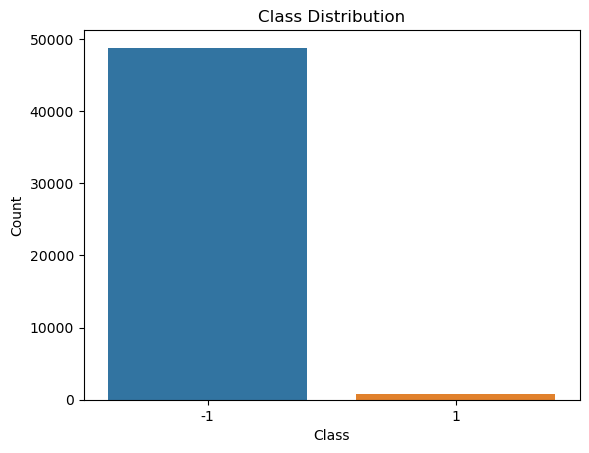

Total class 1: 809
Total class -1: 48797


In [398]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print('Total class 1:', df.Class.value_counts()[1])
print('Total class -1:', df.Class.value_counts()[-1])

### Metadata removal

In [399]:
feat_col = [col for col in df.columns if col.startswith('feat_') or col.startswith('Class') or col.startswith('Info_cluster')]
df_feat = df[feat_col].copy()
df_feat

Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
0                18      1      0.294185     -0.010953      0.043579   
1                18      1      0.260795      0.016828     -0.012012   
2                18      1      0.184051      0.305131      0.108189   
3                18      1      0.314233      0.128062      0.083666   
4                18      1      0.096633      0.163431     -0.031337   
...             ...    ...           ...           ...           ...   
49601           157     -1      0.082752      0.635681      0.112193   
49602            35     -1      0.128636      0.167452      0.192233   
49603            24     -1     -0.027985      0.225489      0.016680   
49604            18     -1      0.015671      0.241121      0.184883   
49605            70     -1      0.097966     -0.143125      0.328647   

       feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
0         -0.072766      0.235567     -0.055041     -0.495426     -0.154259   
1         -0.066855      0.325146     -0.255945     -0.597614     -0.055613   
2          0.129977      0.452808     -0.308754     -0.500337     -0.115194   
3          0.216604      0.312914     -0.370623     -0.347873      0.172393   
4          0.308982      0.290276     -0.513453     -0.365755     -0.188772   
...             ...           ...           ...           ...           ...   
49601      0.324989     -0.390585     -0.129480     -0.009006      0.164687   
49602      0.078877      0.219696     -0.217529      0.067166     -0.275366   
49603      0.113738      0.111349     -0.114311      0.000076     -0.226096   
49604      0.187323     -0.227781      0.062341     -0.080786     -0.388686   
49605      0.238676      0.054550     -0.268793     -0.065459     -0.234035   

       ...  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
0      ...        -0.177248        -0.275432         0.175780   
1      ...        -0.089673        -0.258615         0.063662   
2      ...        -0.037816        -0.205189         0.220458   
3      ...        -0.249216        -0.211748        -0.130716   
4      ...        -0.039318        -0.250912        -0.093870   
...    ...              ...              ...              ...   
49601  ...         0.472350        -0.247337        -0.309765   
49602  ...         0.001537        -0.036722         0.038110   
49603  ...        -0.208069        -0.180131        -0.014111   
49604  ...        -0.275757        -0.179628         0.013488   
49605  ...        -0.109526        -0.199076         0.050413   

       feat_esm1b_1274  feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  \
0            -2.618115        -0.306478         0.248409        -0.144645   
1            -2.660741        -0.227916         0.233011        -0.143840   
2            -2.610207        -0.156326         0.231606         0.251916   
3            -2.598186        -0.130838        -0.026848         0.167203   
4            -2.414023        -0.253500         0.118345        -0.160718   
...                ...              ...              ...              ...   
49601         0.190045        -0.181312        -0.058894         0.025527   
49602        -2.018414        -0.437113        -0.024533         0.138691   
49603        -1.502984        -0.317111         0.012365         0.132795   
49604        -1.108764        -0.278636         0.388318        -0.034176   
49605        -1.877750        -0.419302        -0.021825        -0.138143   

       feat_esm1b_1278  feat_esm1b_1279  feat_esm1b_1280  
0            -0.163276         0.101016         0.571763  
1            -0.119282         0.146848         0.507656  
2             0.077030         0.326192         0.071661  
3            -0.394126         0.222274         0.376358  
4            -0.076750         0.448067         0.326883  
...                ...              ...              ...  
49601        -0.083306        -0.002887         0.077993  
49602        -0

In [400]:
df_feat.shape

(49606, 1283)

### Train test split

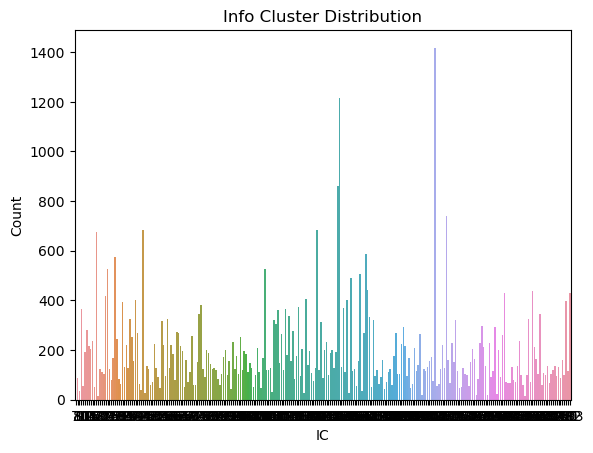

In [401]:
sns.countplot(data=df, x='Info_cluster')
plt.title('Info Cluster Distribution')
plt.xlabel('IC')
plt.ylabel('Count')
plt.show()

In [402]:
df_feat = df_feat.sort_values(by=['Info_cluster'])
df_feat

Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
19049             7     -1      0.124341      0.030097     -0.003886   
40892             7     -1      0.252310      0.211690     -0.233397   
40920             7     -1     -0.112094      0.310462     -0.078300   
44764             7     -1     -0.136951      0.052613      0.272420   
25441             7     -1      0.097138      0.297866     -0.219078   
...             ...    ...           ...           ...           ...   
13672           283     -1      0.075509      0.005520     -0.147095   
17879           283     -1     -0.174225      0.342734      0.060249   
34322           283     -1     -0.189546      0.171959      0.338831   
43935           283     -1      0.162296      0.184346      0.230811   
34931           283     -1     -0.099750      0.223680      0.474886   

       feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
19049      0.001983      0.017083      0.280275     -0.226495      0.202141   
40892      0.288752      0.221837     -0.166169      0.070165      0.100629   
40920      0.365989      0.326119     -0.394658     -0.067358      0.293471   
44764      0.181942      0.023447      0.013890      0.248004     -0.097098   
25441      0.334267      0.347838     -0.228299     -0.145358      0.372524   
...             ...           ...           ...           ...           ...   
13672      0.031042      0.018851     -0.186867     -0.130400      0.064896   
17879      0.154722      0.110840     -0.062990     -0.035319      0.288002   
34322     -0.007867      0.163180     -0.158226     -0.036586      0.061878   
43935     -0.046393      0.161604      0.023452     -0.044850      0.209789   
34931      0.012677     -0.029987     -0.191742      0.137840     -0.339906   

       ...  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
19049  ...         0.068688        -0.104651        -0.091112   
40892  ...        -0.198123        -0.255451        -0.085184   
40920  ...         0.120344        -0.209900         0.246690   
44764  ...        -0.148067        -0.123162         0.300128   
25441  ...        -0.121364        -0.271142        -0.114422   
...    ...              ...              ...              ...   
13672  ...        -0.103428        -0.192262         0.025856   
17879  ...         0.068412        -0.029705         0.232365   
34322  ...        -0.164702        -0.331441         0.163587   
43935  ...        -0.128821        -0.104323         0.146877   
34931  ...        -0.177209        -0.098736         0.444917   

       feat_esm1b_1274  feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  \
19049        -1.848425        -0.323456         0.109089        -0.250160   
40892        -1.120704        -0.062561         0.567100         0.370274   
40920        -2.044946        -0.533895         0.035079         0.224281   
44764        -1.650122        -0.330832         0.210379         0.028841   
25441        -1.374326        -0.236675         0.220882        -0.068179   
...                ...              ...              ...              ...   
13672        -1.333679        -0.078719         0.048094         0.130107   
17879        -1.269399        -0.177703         0.028826         0.042173   
34322        -1.195203        -0.242363         0.121204         0.119232   
43935        -1.492354        -0.196170         0.074084         0.182739   
34931        -1.450031        -0.110457         0.216258         0.008912   

       feat_esm1b_1278  feat_esm1b_1279  feat_esm1b_1280  
19049        -0.117751         0.301878         0.303361  
40892        -0.367297         0.075795         0.267463  
40920        -0.340793         0.506453         0.119322  
44764        -0.270265         0.281425         0.098701  
25441         0.130698         0.067724         0.217104  
...                ...              ...              ...  
13672        -0.160255         0.410342        -0.021574  
17879        -0

In [403]:
def split_per_info_cluster(data):
    df_train = data.copy(deep=True)
    clusters = data['Info_cluster'].unique()
    clusters_1 = [c for c in clusters if df_feat[df_feat['Info_cluster'] == c].Class.value_counts().get(1, 0) > 0]
    clusters_n1 = [c for c in clusters if df_feat[df_feat['Info_cluster'] == c].Class.value_counts().get(1, 0) == 0]
    test_size = data.shape[0] * 0.25
    df_test = pd.DataFrame()
    
    while df_test.shape[0] < test_size:
        
        if not df_test.empty:
            if df_test.Class.value_counts().get(1, 0) < df_feat.Class.value_counts()[1] * (0.25*0.9):
                #  if class 1 is too few in the testing set
                x = rng.choice(clusters_1)
                if df_feat[df_feat['Info_cluster'] == x].Class.value_counts().get(1, 0) > 0:
                    clusters = np.delete(clusters, np.argwhere(clusters == x))
                    df_test = pd.concat([df_train[df_train['Info_cluster'] == x].copy(), df_test])
                    df_train = df_train[df_train['Info_cluster'] != x].copy()
            else:
                x = rng.choice(clusters_n1)
                clusters = np.delete(clusters, np.argwhere(clusters == x))
                df_test = pd.concat([df_train[df_train['Info_cluster'] == x].copy(), df_test])
                df_train = df_train[df_train['Info_cluster'] != x].copy()
        else:
            x = rng.choice(clusters_n1)
            clusters = np.delete(clusters, np.argwhere(clusters == x))
            df_test = pd.concat([df_train[df_train['Info_cluster'] == x].copy(), df_test])
            df_train = df_train[df_train['Info_cluster'] != x].copy()
    return df_train, df_test

### Missing values

In [404]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49606 entries, 19049 to 34931
Columns: 1283 entries, Info_cluster to feat_esm1b_1280
dtypes: float64(1281), int64(2)
memory usage: 485.9 MB


In [405]:
missing_values = df_feat.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values.sort_values(ascending=False))

feat_esm1b_148     44655
feat_esm1b_56         88
feat_esm1b_1121       88
feat_esm1b_469        88
feat_esm1b_646        88
feat_esm1b_537        88
feat_esm1b_645        88
feat_esm1b_634        88
feat_esm1b_728        88
feat_esm1b_332        88
feat_esm1b_1045       87
feat_esm1b_379        87
feat_esm1b_1039       87
feat_esm1b_879        87
feat_esm1b_691        87
feat_esm1b_353        87
feat_esm1b_363        87
feat_esm1b_86         87
feat_esm1b_392        87
feat_esm1b_667        87
feat_esm1b_386        87
feat_esm1b_1032       87
feat_esm1b_399        87
feat_esm1b_1157       87
feat_esm1b_422        87
feat_esm1b_1065       87
feat_esm1b_438        87
feat_esm1b_442        87
feat_esm1b_966        87
feat_esm1b_712        87
feat_esm1b_639        87
feat_esm1b_113        87
feat_esm1b_902        87
feat_esm1b_174        87
feat_esm1b_177        87
feat_esm1b_812        87
feat_esm1b_196        87
feat_esm1b_804        87
feat_esm1b_799        87
feat_esm1b_1000       87


In [406]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_feat[['feat_esm1b_148', 'Class']])

       feat_esm1b_148  Class
19049        0.303361     -1
40892             NaN     -1
40920             NaN     -1
44764             NaN     -1
25441             NaN     -1
2112              NaN     -1
3654              NaN     -1
25505             NaN     -1
16618             NaN     -1
25765             NaN     -1
30849             NaN     -1
3580              NaN     -1
1087              NaN     -1
26110             NaN     -1
16480             NaN     -1
1501              NaN     -1
38222             NaN     -1
41615             NaN     -1
16383        0.247123     -1
14467             NaN     -1
38145             NaN     -1
3711              NaN     -1
16345             NaN     -1
6177              NaN     -1
5957              NaN     -1
16988             NaN     -1
24775             NaN     -1
3501              NaN     -1
23918             NaN     -1
44555             NaN     -1
43618        0.158577     -1
23949             NaN     -1
28876             NaN     -1
41826         

In [407]:
df_feat_148 = pd.DataFrame()
df_feat_148['feat_esm1b_148_nan'] = df_feat['feat_esm1b_148'].isna()
df_feat_148['Class'] = df_feat['Class']

class_distribution = df_feat_148.groupby('feat_esm1b_148_nan')['Class'].value_counts().unstack()
print(class_distribution)

Class                  -1    1
feat_esm1b_148_nan            
False                4875   76
True                43922  733


In [408]:
nan_counts = df_feat.copy().drop(columns=['feat_esm1b_148']).isna().sum(axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_counts.sort_values(ascending=False))

13138    1216
6423     1216
26248    1216
27918    1216
4043     1215
43066    1215
33793    1215
4316     1215
8270     1215
27755    1215
45052    1215
46458    1215
27033    1215
23394    1215
35957    1215
35959    1215
25497    1215
48616    1215
37862    1215
22506    1215
33898    1215
27488    1215
12546    1215
17887    1215
24618    1215
26311    1215
22758    1215
9513     1215
44317    1215
38371    1215
36174    1215
23973    1215
43193    1215
39726    1215
41325    1215
18123    1215
6202     1215
31712    1215
44195    1215
17939    1215
48582    1215
13936    1215
15445    1215
46076    1215
39272    1215
45496    1215
31567    1215
13310    1215
25141    1215
23490    1215
40249    1215
7659     1215
15834    1215
15246    1215
16105    1215
720      1215
26021    1215
15464    1215
21526    1215
36234    1215
27401    1215
14724    1215
24563    1215
1169     1215
27551    1215
38560    1215
36698    1215
24848    1215
48277    1215
24607    1215
39155    1215
17351 

In [409]:
nan_counts_none_0 = nan_counts[nan_counts > 0]
nan_counts_none_0.shape

(88,)

In [410]:
df_feat.loc[[13138]]

Info_cluster  Class  feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  \
13138           110     -1           NaN           NaN           NaN   

       feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  \
13138           NaN      0.041307     -0.203861           NaN           NaN   

       ...  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
13138  ...        -0.014721              NaN              NaN   

       feat_esm1b_1274  feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  \
13138              NaN        -0.559579              NaN              NaN   

       feat_esm1b_1278  feat_esm1b_1279  feat_esm1b_1280  
13138        -0.232025              NaN              NaN  

[1 rows x 1283 columns]

### Data ranges

In [411]:
feats = df_feat.copy().drop(columns=['Info_cluster', 'Class'])
feats

feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
19049      0.124341      0.030097     -0.003886      0.001983      0.017083   
40892      0.252310      0.211690     -0.233397      0.288752      0.221837   
40920     -0.112094      0.310462     -0.078300      0.365989      0.326119   
44764     -0.136951      0.052613      0.272420      0.181942      0.023447   
25441      0.097138      0.297866     -0.219078      0.334267      0.347838   
...             ...           ...           ...           ...           ...   
13672      0.075509      0.005520     -0.147095      0.031042      0.018851   
17879     -0.174225      0.342734      0.060249      0.154722      0.110840   
34322     -0.189546      0.171959      0.338831     -0.007867      0.163180   
43935      0.162296      0.184346      0.230811     -0.046393      0.161604   
34931     -0.099750      0.223680      0.474886      0.012677     -0.029987   

       feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  \
19049      0.280275     -0.226495      0.202141     -0.240191     -0.408409   
40892     -0.166169      0.070165      0.100629     -0.292685     -0.201036   
40920     -0.394658     -0.067358      0.293471     -0.023776     -0.249637   
44764      0.013890      0.248004     -0.097098      0.033911     -0.276959   
25441     -0.228299     -0.145358      0.372524     -0.349940     -0.128921   
...             ...           ...           ...           ...           ...   
13672     -0.186867     -0.130400      0.064896     -0.485986     -0.094633   
17879     -0.062990     -0.035319      0.288002      0.039118      0.046142   
34322     -0.158226     -0.036586      0.061878     -0.026927      0.026327   
43935      0.023452     -0.044850      0.209789     -0.205565     -0.180068   
34931     -0.191742      0.137840     -0.339906     -0.124310     -0.092071   

       ...  feat_esm1b_1271  feat_esm1b_1272  feat_esm1b_1273  \
19049  ...         0.068688        -0.104651        -0.091112   
40892  ...        -0.198123        -0.255451        -0.085184   
40920  ...         0.120344        -0.209900         0.246690   
44764  ...        -0.148067        -0.123162         0.300128   
25441  ...        -0.121364        -0.271142        -0.114422   
...    ...              ...              ...              ...   
13672  ...        -0.103428        -0.192262         0.025856   
17879  ...         0.068412        -0.029705         0.232365   
34322  ...        -0.164702        -0.331441         0.163587   
43935  ...        -0.128821        -0.104323         0.146877   
34931  ...        -0.177209        -0.098736         0.444917   

       feat_esm1b_1274  feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  \
19049        -1.848425        -0.323456         0.109089        -0.250160   
40892        -1.120704        -0.062561         0.567100         0.370274   
40920        -2.044946        -0.533895         0.035079         0.224281   
44764        -1.650122        -0.330832         0.210379         0.028841   
25441        -1.374326        -0.236675         0.220882        -0.068179   
...                ...              ...              ...              ...   
13672        -1.333679        -0.078719         0.048094         0.130107   
17879        -1.269399        -0.177703         0.028826         0.042173   
34322        -1.195203        -0.242363         0.121204         0.119232   
43935        -1.492354        -0.196170         0.074084         0.182739   
34931        -1.450031        -0.110457         0.216258         0.008912   

       feat_esm1b_1278  feat_esm1b_1279  feat_esm1b_1280  
19049        -0.117751         0.301878         0.303361  
40892        -0.367297         0.075795         0.267463  
40920        -0.340793         0.506453         0.119322  
44764        -0.270265         0.281425         0.098701  
25441         0.130698         0.067724         0.217104  
...                ...              ...          

In [412]:
def range2vec(s):
    v = [[0, s.min()], [0, s.max()]]
    return v
    
def plot_range(v, i):
    for vector in v:
        ax.quiver(i, 0, vector[0], vector[1], angles='xy', scale_units='xy', color='blue', scale=1, label=f'Set {i}')
    ax.set_ylim([-20, 7])
    ax.set_xlim([-1, 1281])
    ax.grid(True)

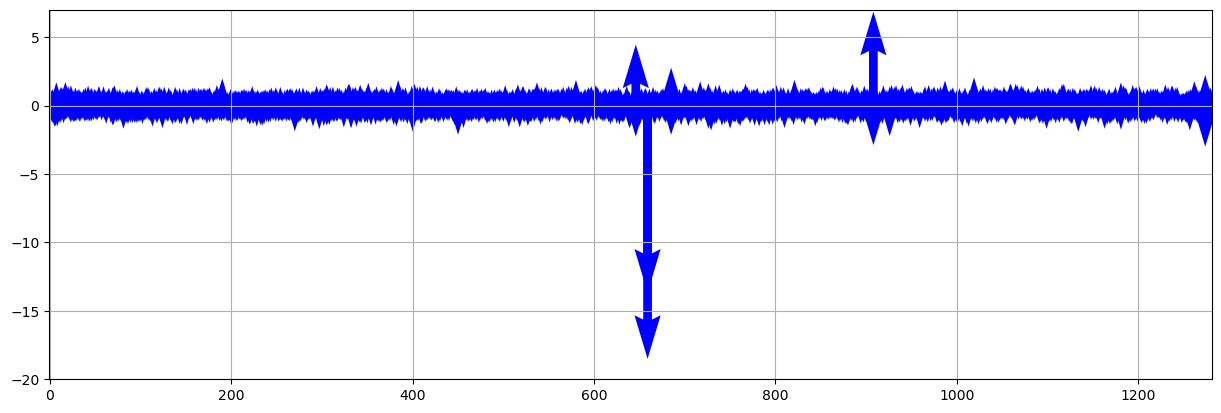

In [413]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
for i, pack in enumerate(feats.items()):
    v = range2vec(pack[1])
    plot_range(v, i)
plt.show()

In [414]:
ranges = []
indexes = []
for i, pack in enumerate(feats.items()):
    ranges.append(abs(pack[1].max() - pack[1].min()))
    indexes.append(pack[0])
data_scale = pd.Series(ranges, index=indexes)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_scale.sort_values(ascending=False))

feat_esm1b_908     9.741454
feat_esm1b_646     6.724577
feat_esm1b_1274    5.239242
feat_esm1b_685     4.908823
feat_esm1b_659     4.837328
feat_esm1b_926     3.625204
feat_esm1b_1181    3.447358
feat_esm1b_726     3.325898
feat_esm1b_450     3.311169
feat_esm1b_305     3.004427
feat_esm1b_1019    3.000282
feat_esm1b_190     2.952180
feat_esm1b_270     2.909042
feat_esm1b_1257    2.896766
feat_esm1b_1262    2.894062
feat_esm1b_750     2.885663
feat_esm1b_384     2.885627
feat_esm1b_382     2.881122
feat_esm1b_821     2.873797
feat_esm1b_1163    2.859586
feat_esm1b_1134    2.855792
feat_esm1b_306     2.807204
feat_esm1b_1118    2.803571
feat_esm1b_17      2.783852
feat_esm1b_1279    2.782561
feat_esm1b_70      2.779475
feat_esm1b_69      2.777415
feat_esm1b_650     2.744639
feat_esm1b_23      2.739368
feat_esm1b_594     2.729326
feat_esm1b_810     2.720693
feat_esm1b_124     2.719784
feat_esm1b_949     2.718871
feat_esm1b_797     2.711584
feat_esm1b_704     2.710301
feat_esm1b_7       2

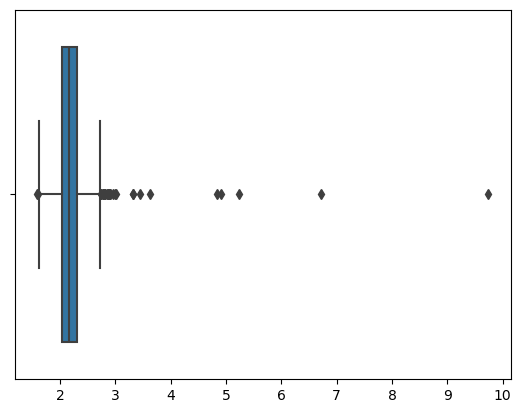

In [415]:
sns.boxplot(x=data_scale)
plt.show()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


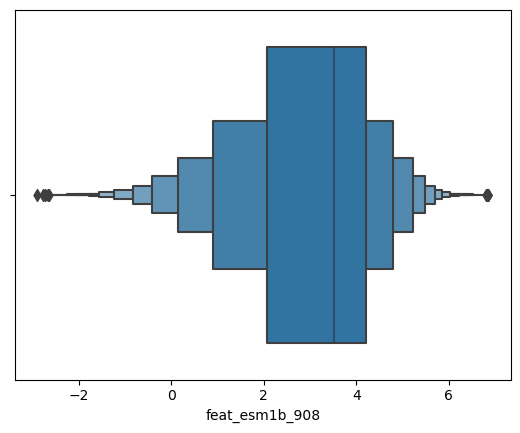

C:\Users\david\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


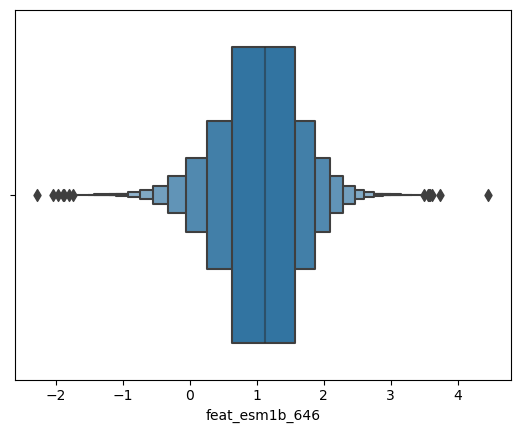

C:\Users\david\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


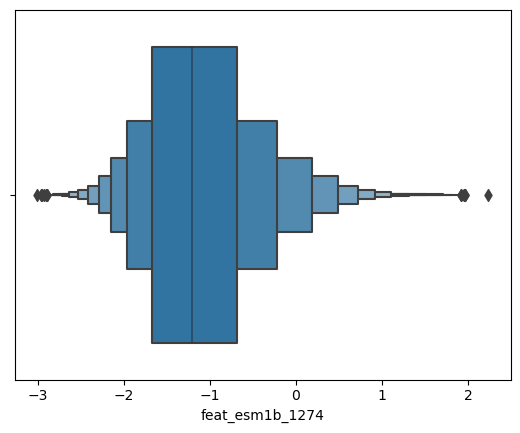

C:\Users\david\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


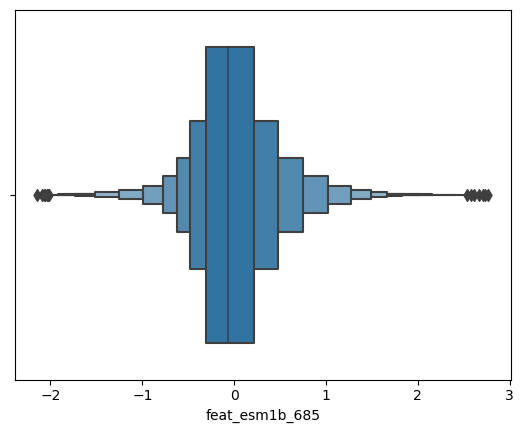

C:\Users\david\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


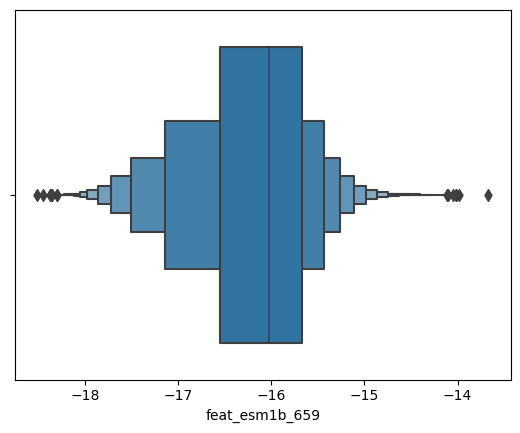

In [416]:
boxes = [908, 646, 1274, 685, 659]
for b in boxes:
    sns.boxenplot(x=df_feat[f'feat_esm1b_{b}'])
    plt.show()

### Duplicated entries

In [417]:
duplicates = feats[feats.duplicated()]
duplicates

Empty DataFrame
Columns: [feat_esm1b_0, feat_esm1b_1, feat_esm1b_2, feat_esm1b_3, feat_esm1b_4, feat_esm1b_5, feat_esm1b_6, feat_esm1b_7, feat_esm1b_8, feat_esm1b_9, feat_esm1b_10, feat_esm1b_11, feat_esm1b_12, feat_esm1b_13, feat_esm1b_14, feat_esm1b_15, feat_esm1b_16, feat_esm1b_17, feat_esm1b_18, feat_esm1b_19, feat_esm1b_20, feat_esm1b_21, feat_esm1b_22, feat_esm1b_23, feat_esm1b_24, feat_esm1b_25, feat_esm1b_26, feat_esm1b_27, feat_esm1b_28, feat_esm1b_29, feat_esm1b_30, feat_esm1b_31, feat_esm1b_32, feat_esm1b_33, feat_esm1b_34, feat_esm1b_35, feat_esm1b_36, feat_esm1b_37, feat_esm1b_38, feat_esm1b_39, feat_esm1b_40, feat_esm1b_41, feat_esm1b_42, feat_esm1b_43, feat_esm1b_44, feat_esm1b_45, feat_esm1b_46, feat_esm1b_47, feat_esm1b_48, feat_esm1b_49, feat_esm1b_50, feat_esm1b_51, feat_esm1b_52, feat_esm1b_53, feat_esm1b_54, feat_esm1b_55, feat_esm1b_56, feat_esm1b_57, feat_esm1b_58, feat_esm1b_59, feat_esm1b_60, feat_esm1b_61, feat_esm1b_62, feat_esm1b_63, feat_esm1b_64, feat_esm1b_65, feat_esm1b_66, feat_esm1b_67, feat_esm1b_68, feat_esm1b_69, feat_esm1b_70, feat_esm1b_71, feat_esm1b_72, feat_esm1b_73, feat_esm1b_74, feat_esm1b_75, feat_esm1b_76, feat_esm1b_77, feat_esm1b_78, feat_esm1b_79, feat_esm1b_80, feat_esm1b_81, feat_esm1b_82, feat_esm1b_83, feat_esm1b_84, feat_esm1b_85, feat_esm1b_86, feat_esm1b_87, feat_esm1b_88, feat_esm1b_89, feat_esm1b_90, feat_esm1b_91, feat_esm1b_92, feat_esm1b_93, feat_esm1b_94, feat_esm1b_95, feat_esm1b_96, feat_esm1b_97, feat_esm1b_98, feat_esm1b_99, ...]
Index: []

[0 rows x 1281 columns]

### Class distribution per 'Info_cluster'

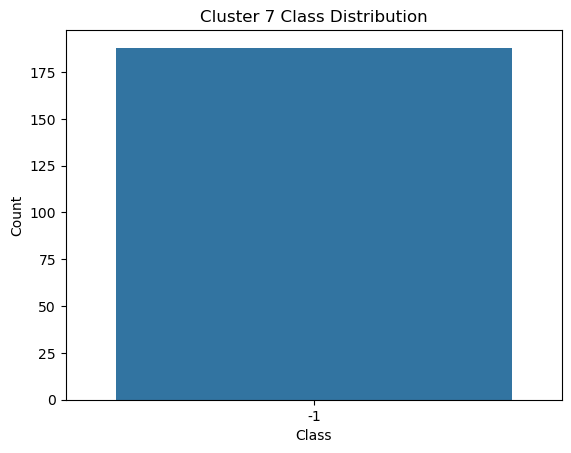

Total class 1: 0
Total class -1: 188


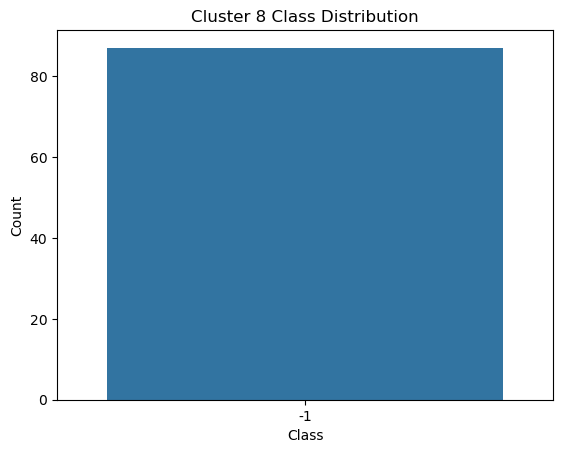

Total class 1: 0
Total class -1: 87


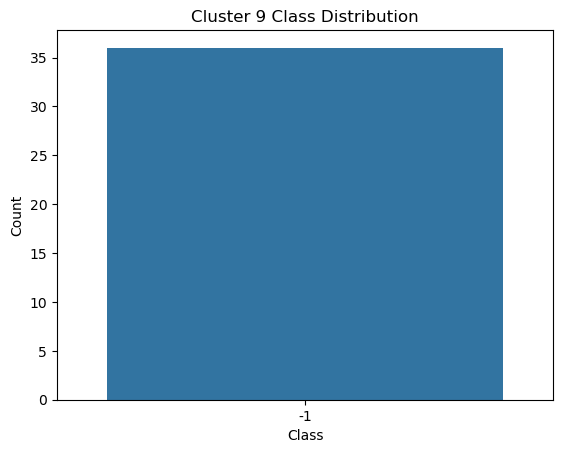

Total class 1: 0
Total class -1: 36


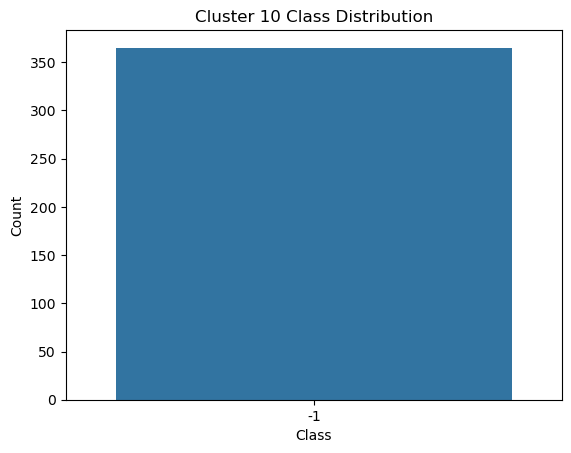

Total class 1: 0
Total class -1: 365


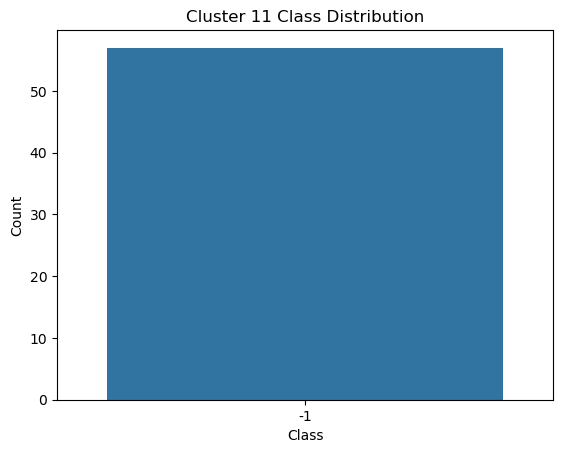

Total class 1: 0
Total class -1: 57


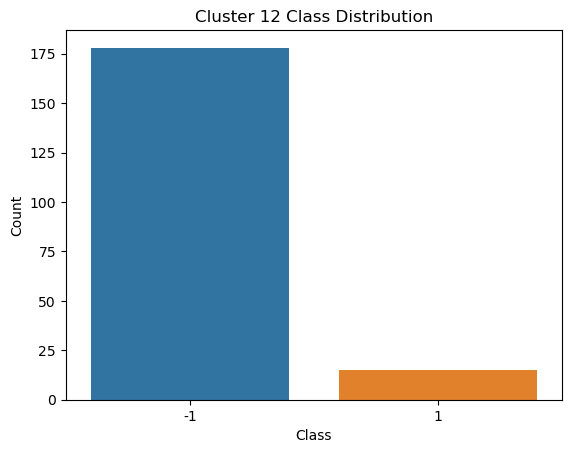

Total class 1: 15
Total class -1: 178


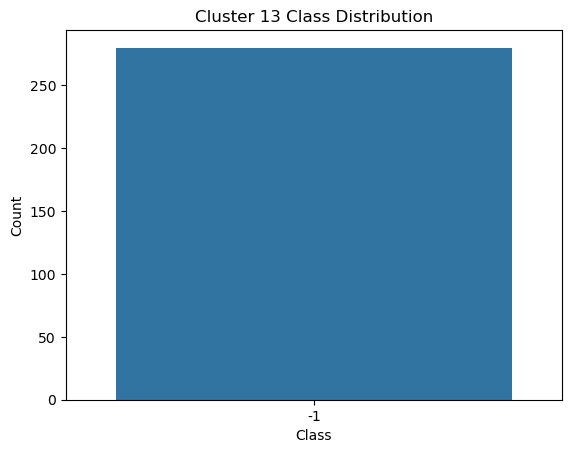

Total class 1: 0
Total class -1: 280


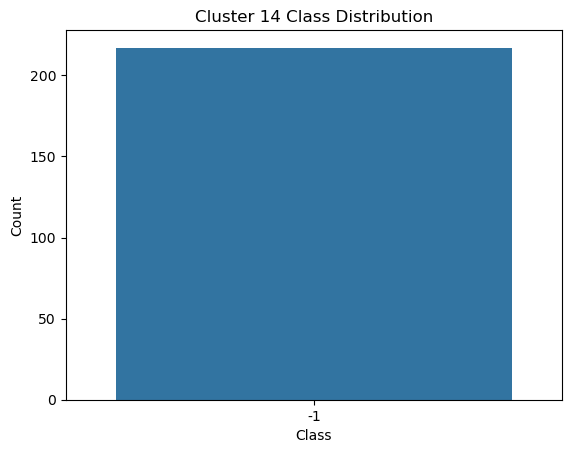

Total class 1: 0
Total class -1: 217


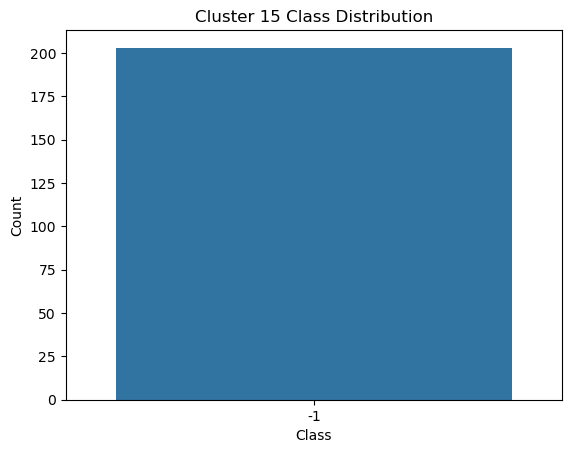

Total class 1: 0
Total class -1: 203


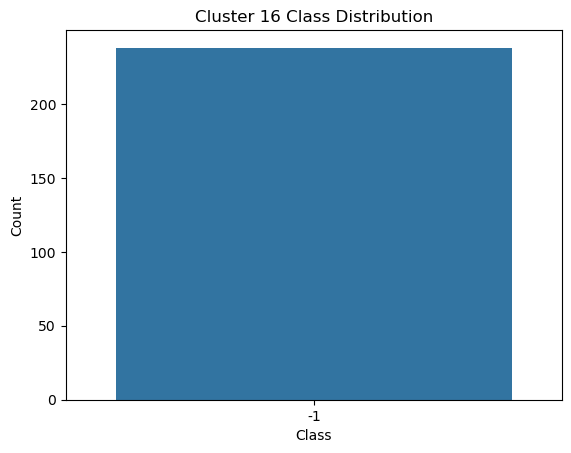

Total class 1: 0
Total class -1: 238


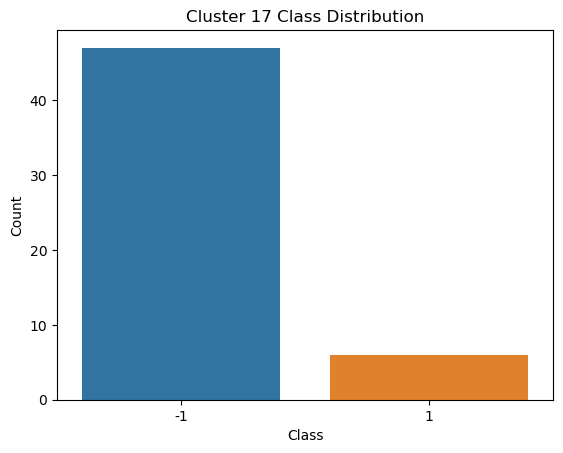

Total class 1: 6
Total class -1: 47


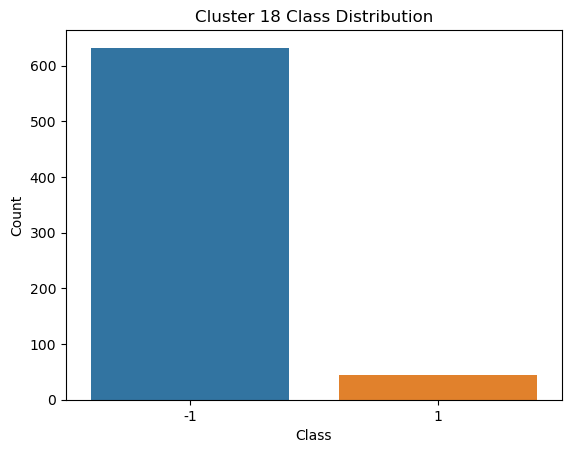

Total class 1: 45
Total class -1: 632


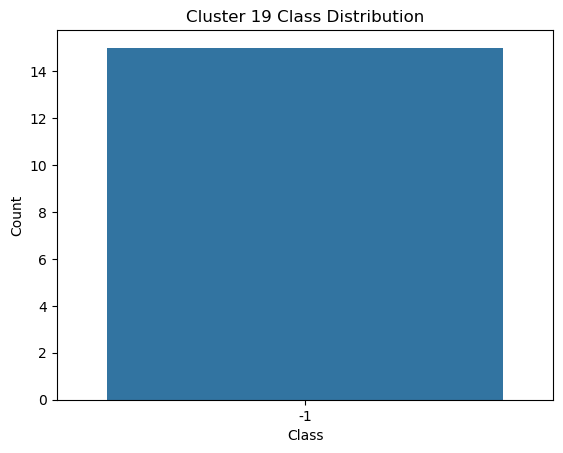

Total class 1: 0
Total class -1: 15


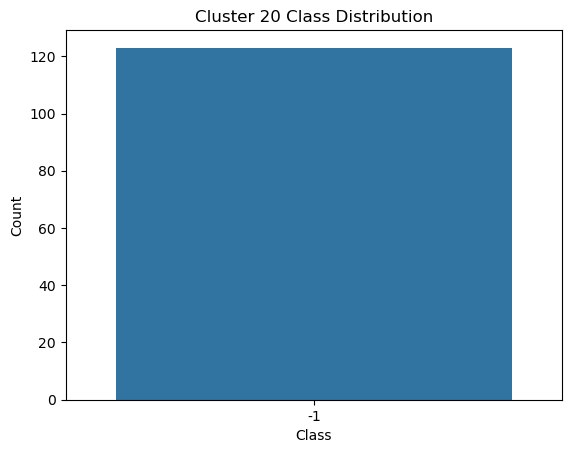

Total class 1: 0
Total class -1: 123


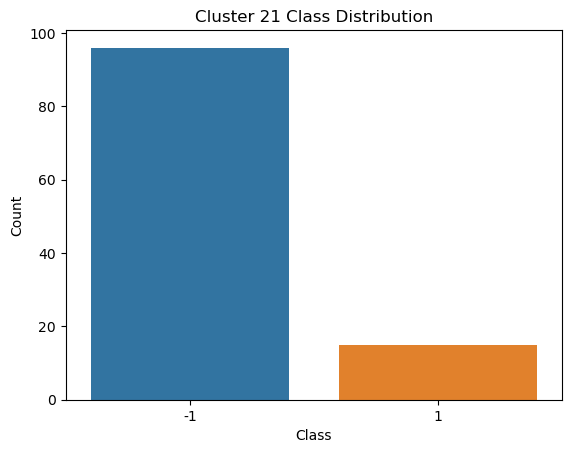

Total class 1: 15
Total class -1: 96


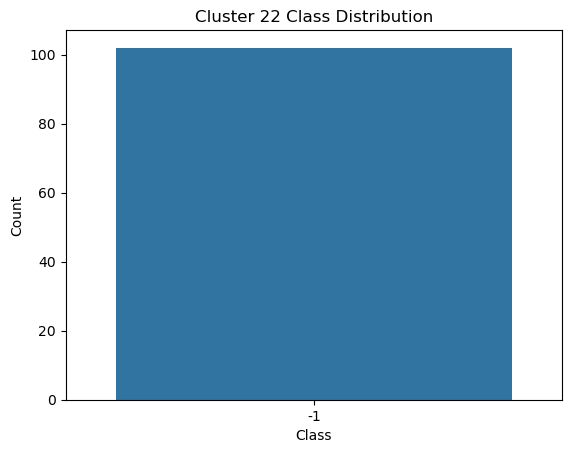

Total class 1: 0
Total class -1: 102


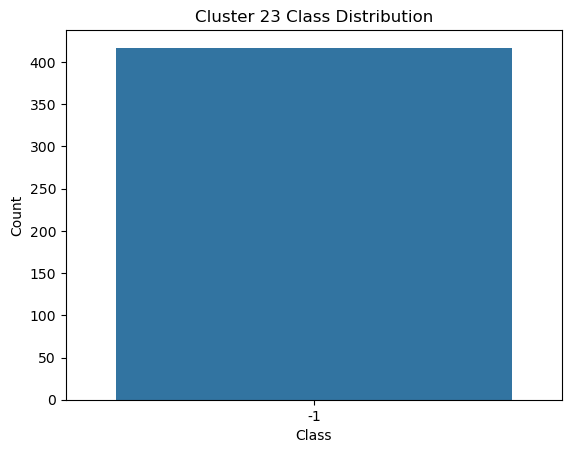

Total class 1: 0
Total class -1: 417


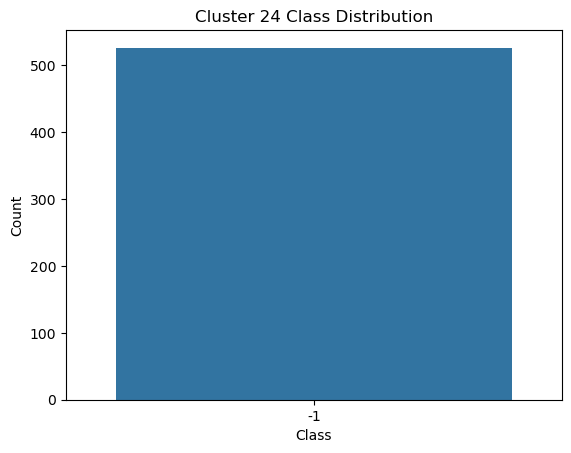

Total class 1: 0
Total class -1: 526


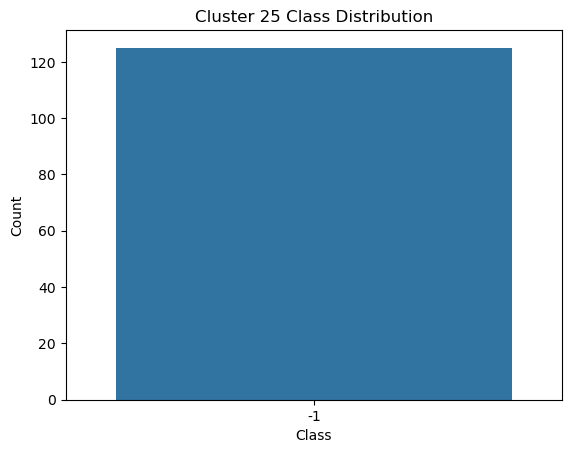

Total class 1: 0
Total class -1: 125


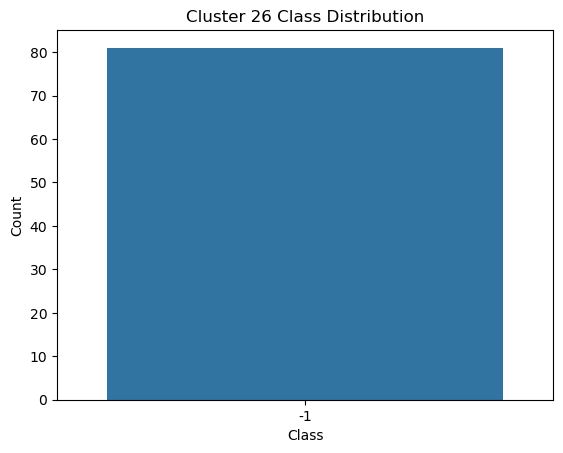

Total class 1: 0
Total class -1: 81


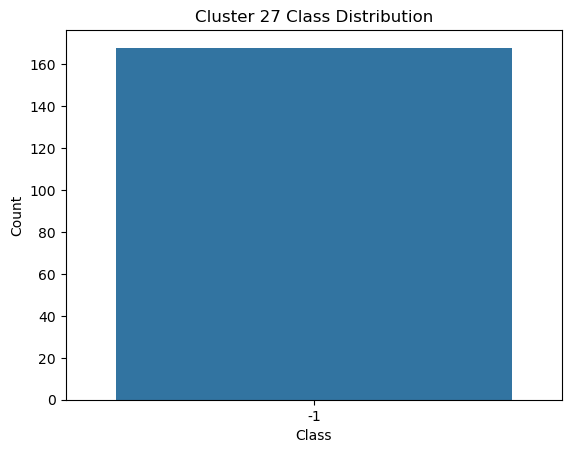

Total class 1: 0
Total class -1: 168


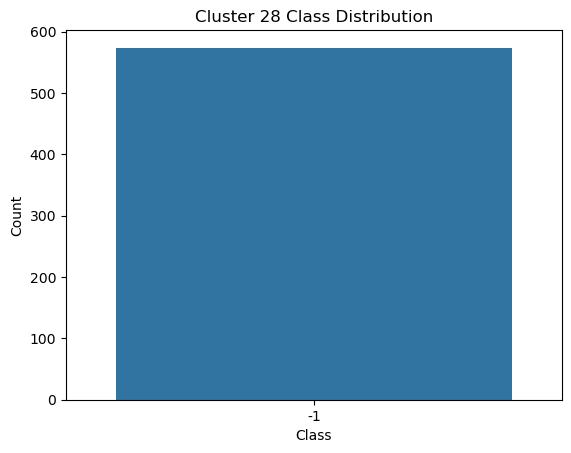

Total class 1: 0
Total class -1: 574


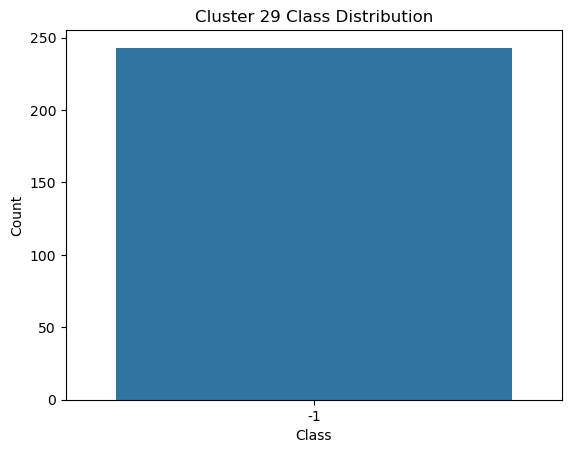

Total class 1: 0
Total class -1: 243


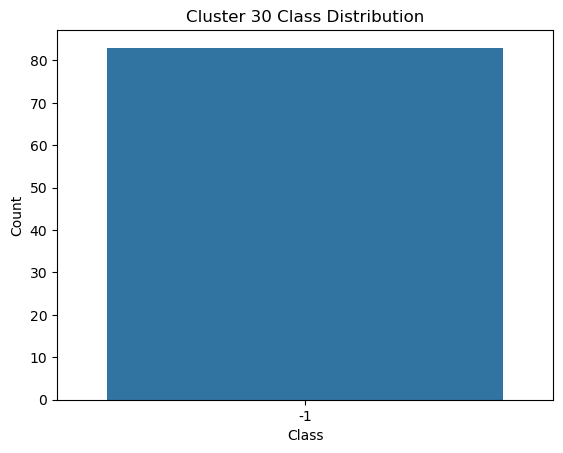

Total class 1: 0
Total class -1: 83


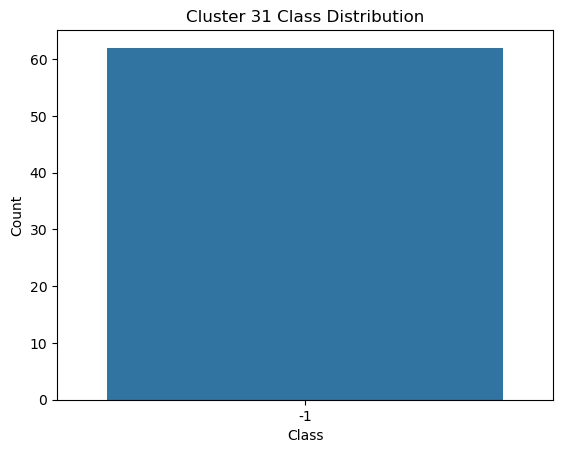

Total class 1: 0
Total class -1: 62


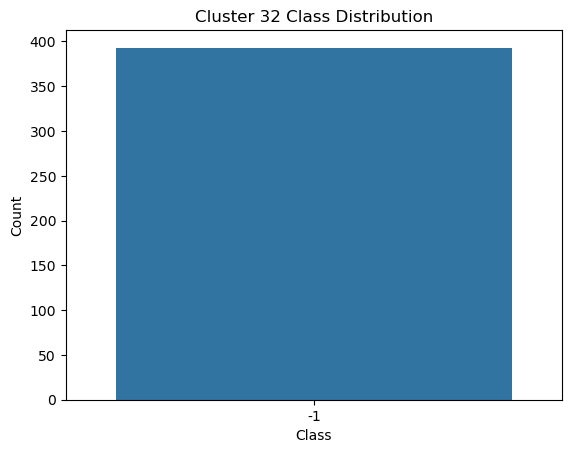

Total class 1: 0
Total class -1: 393


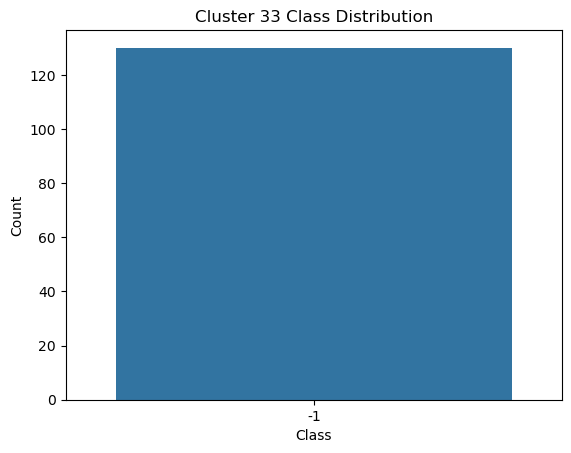

Total class 1: 0
Total class -1: 130


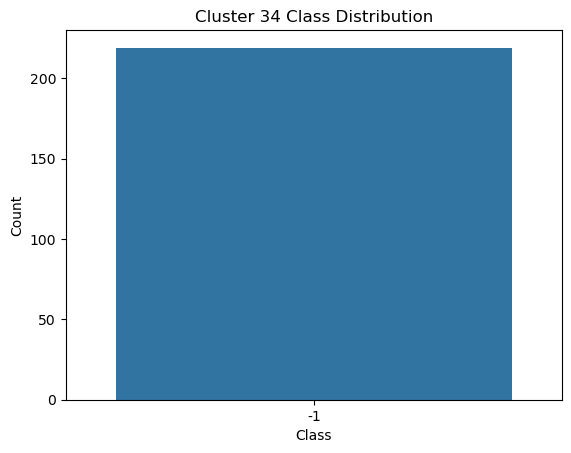

Total class 1: 0
Total class -1: 219


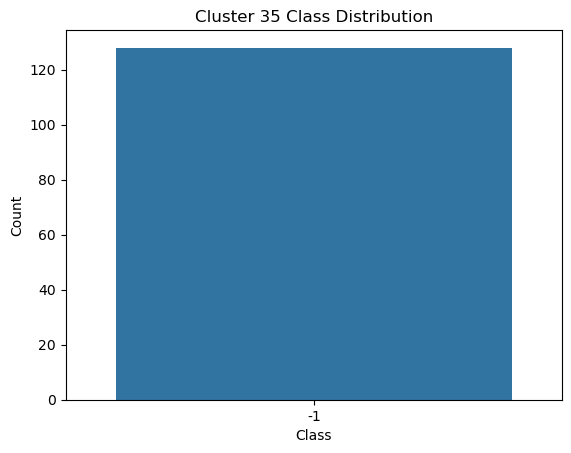

Total class 1: 0
Total class -1: 128


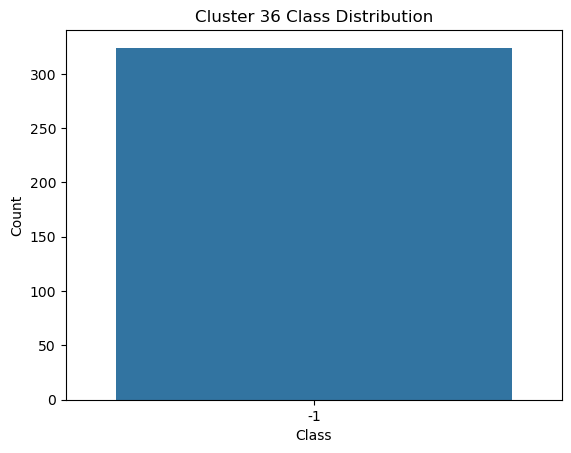

Total class 1: 0
Total class -1: 324


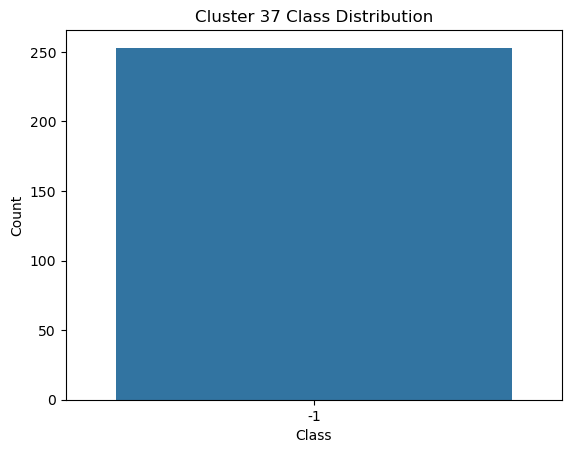

Total class 1: 0
Total class -1: 253


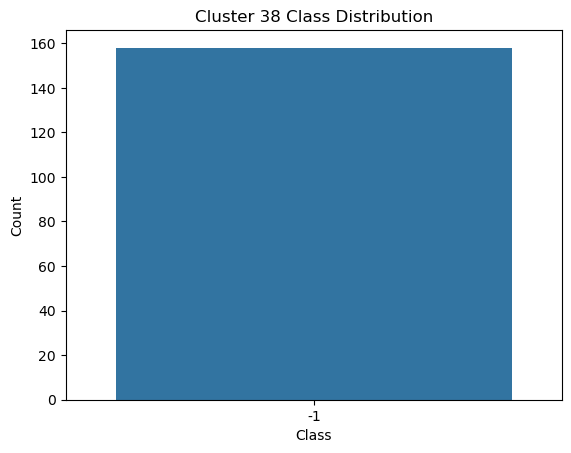

Total class 1: 0
Total class -1: 158


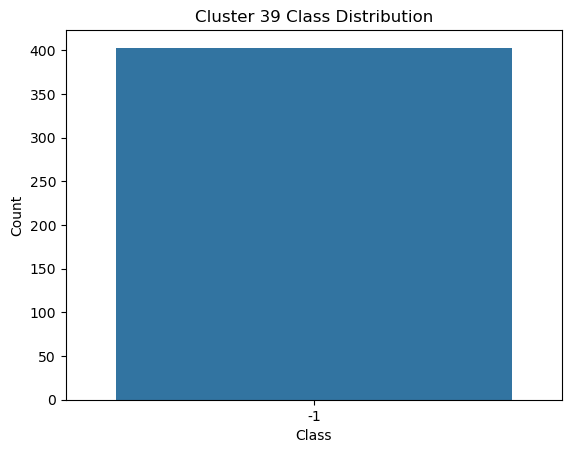

Total class 1: 0
Total class -1: 403


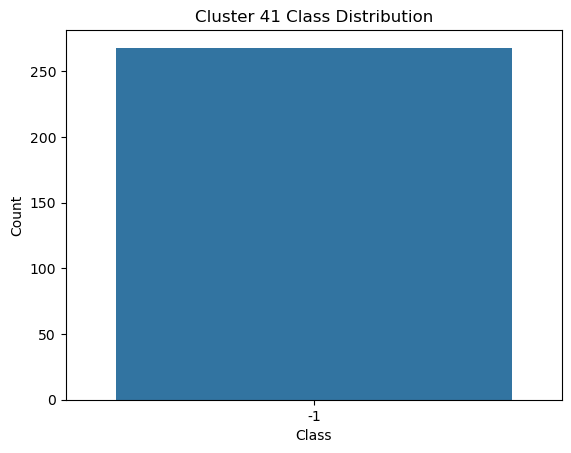

Total class 1: 0
Total class -1: 268


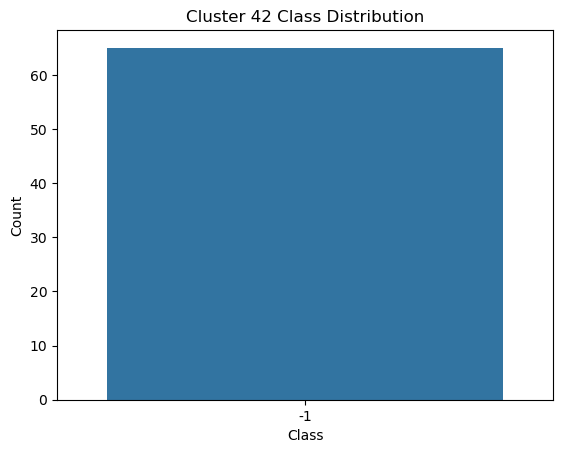

Total class 1: 0
Total class -1: 65


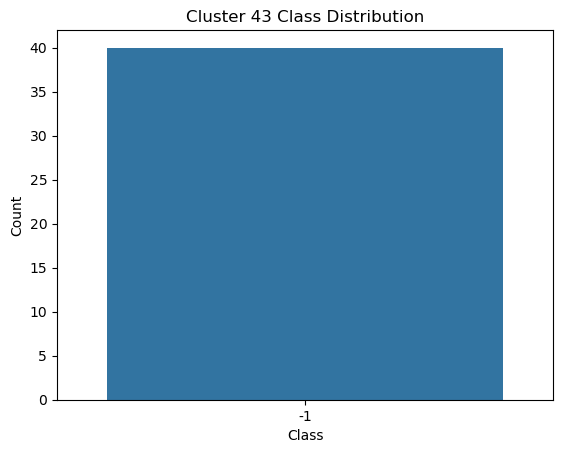

Total class 1: 0
Total class -1: 40


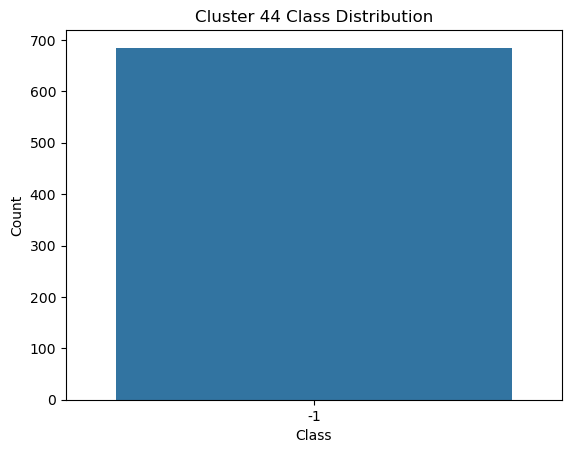

Total class 1: 0
Total class -1: 685


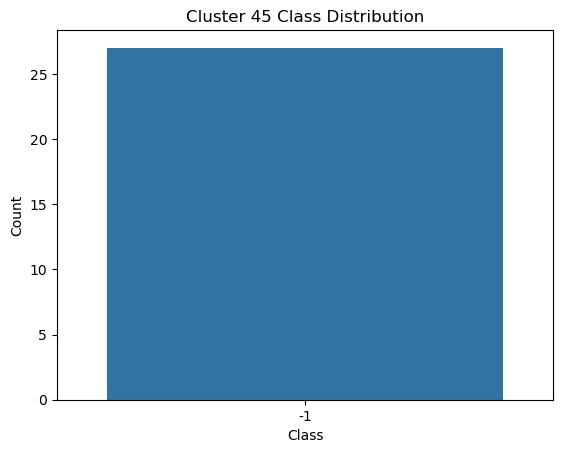

Total class 1: 0
Total class -1: 27


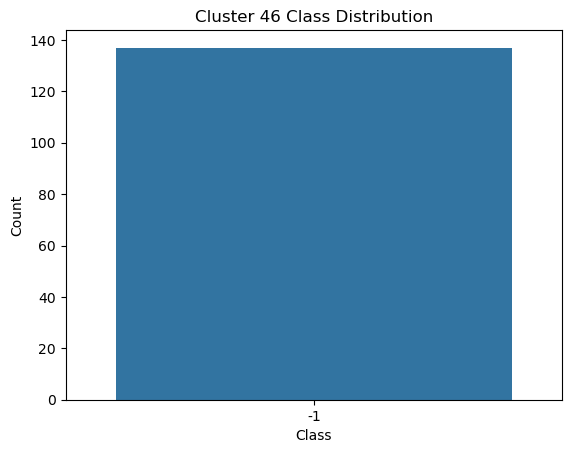

Total class 1: 0
Total class -1: 137


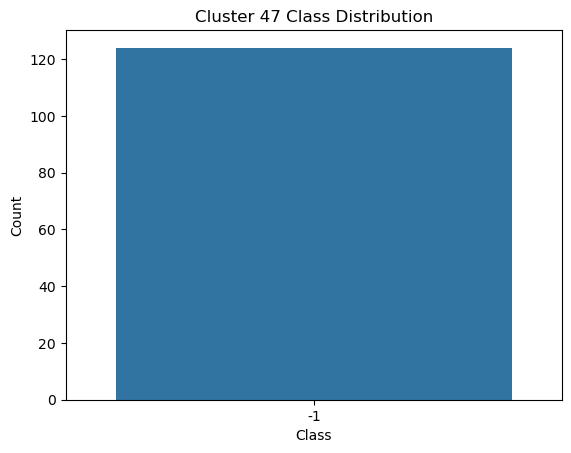

Total class 1: 0
Total class -1: 124


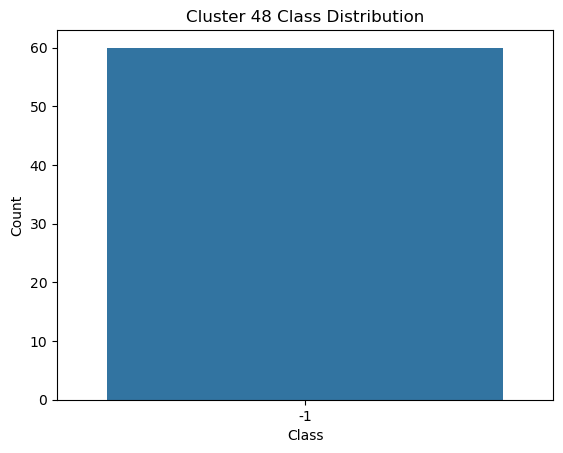

Total class 1: 0
Total class -1: 60


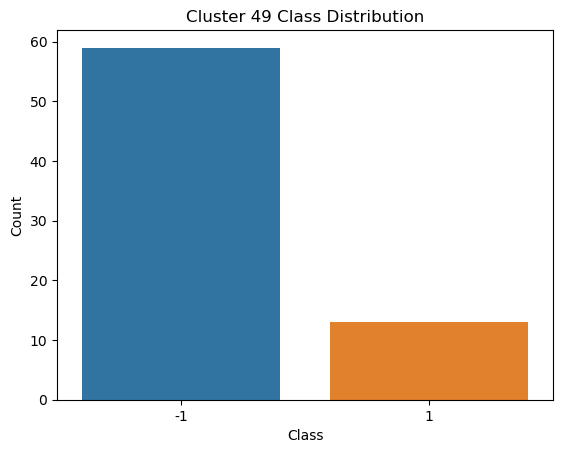

Total class 1: 13
Total class -1: 59


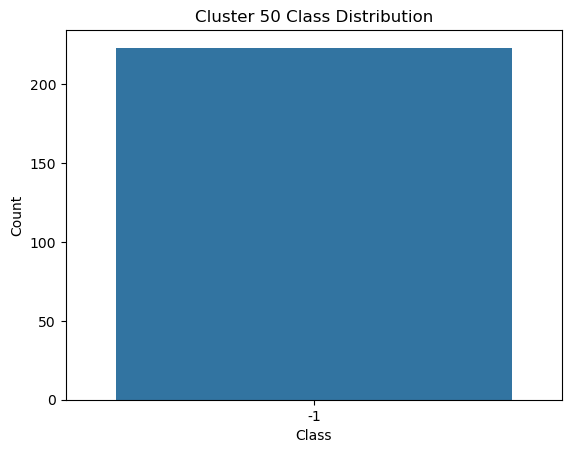

Total class 1: 0
Total class -1: 223


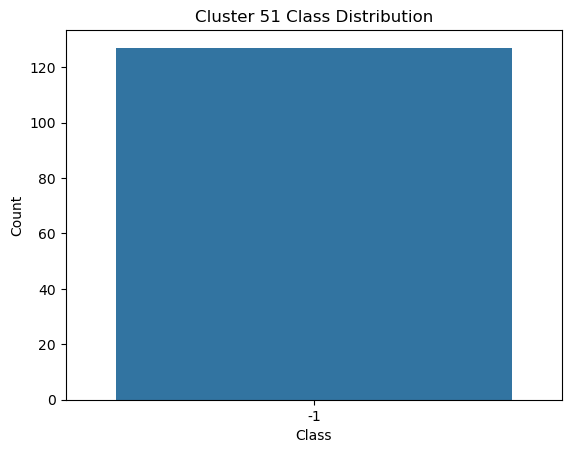

Total class 1: 0
Total class -1: 127


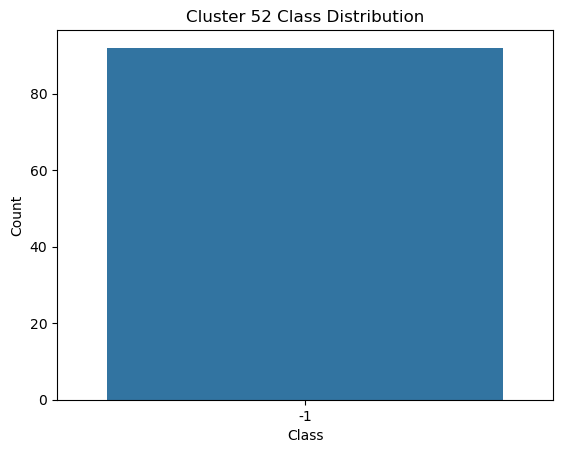

Total class 1: 0
Total class -1: 92


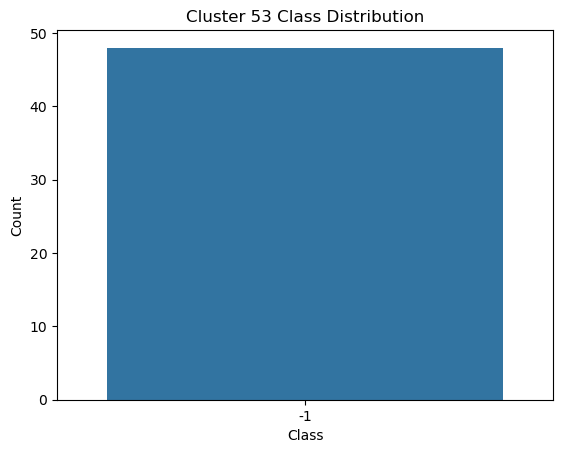

Total class 1: 0
Total class -1: 48


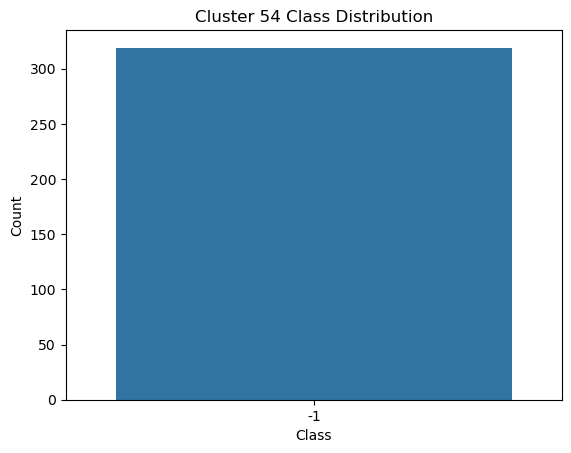

Total class 1: 0
Total class -1: 319


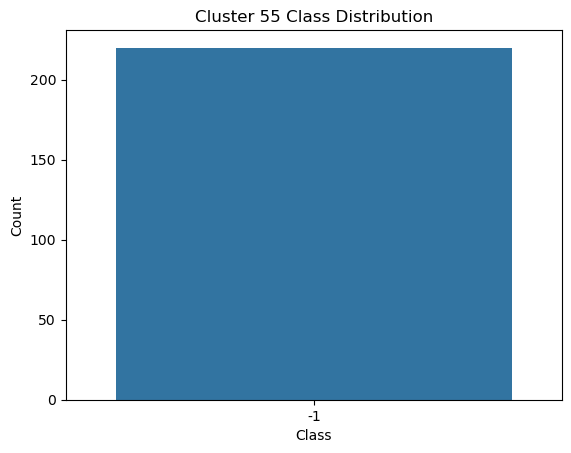

Total class 1: 0
Total class -1: 220


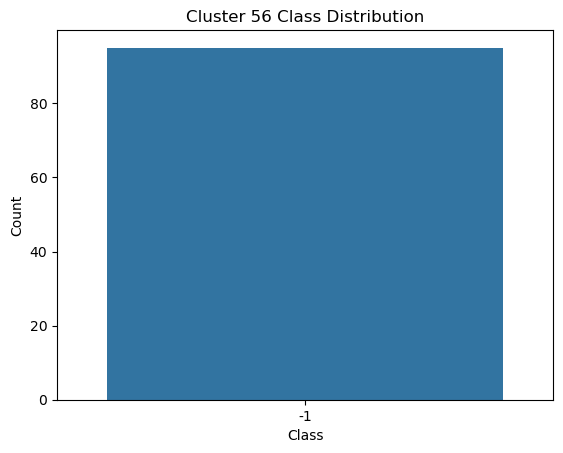

Total class 1: 0
Total class -1: 95


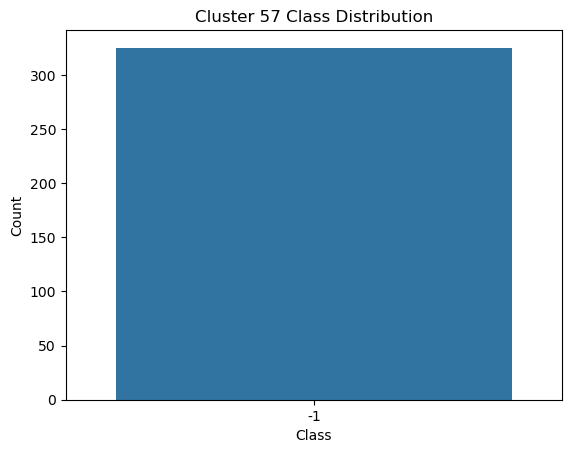

Total class 1: 0
Total class -1: 325


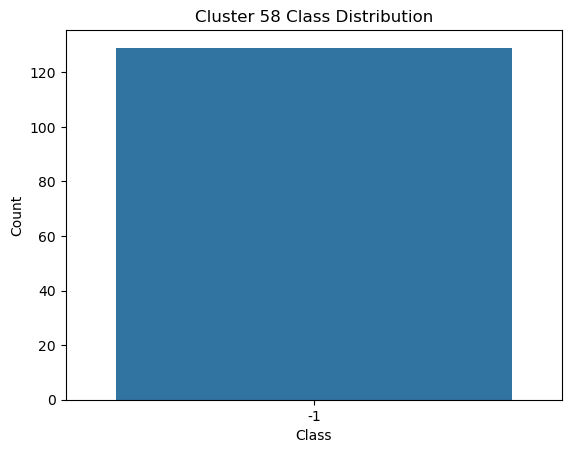

Total class 1: 0
Total class -1: 129


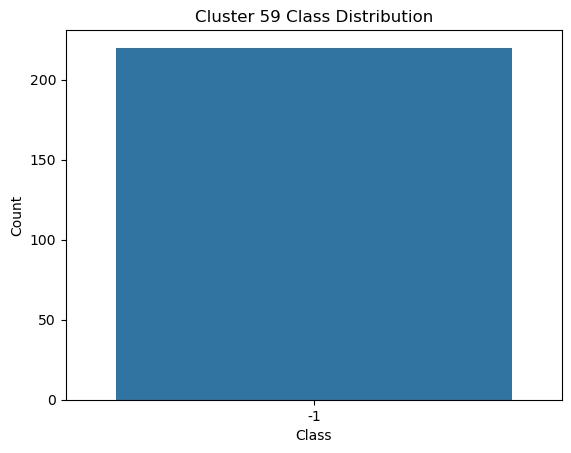

Total class 1: 0
Total class -1: 220


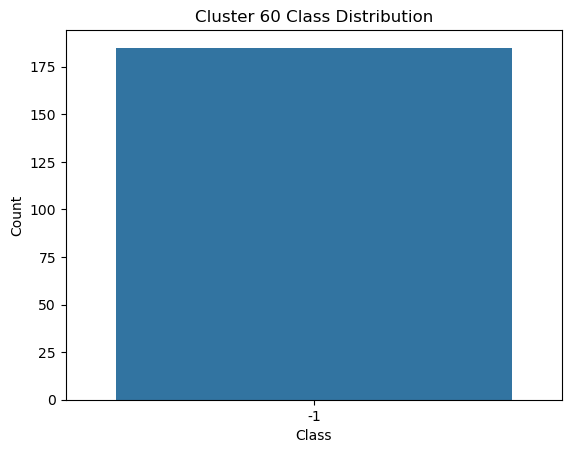

Total class 1: 0
Total class -1: 185


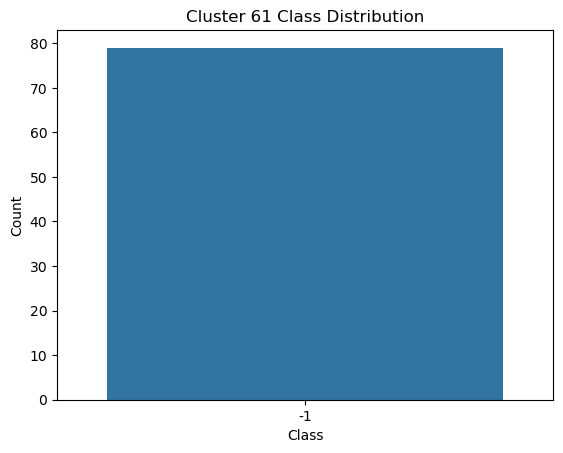

Total class 1: 0
Total class -1: 79


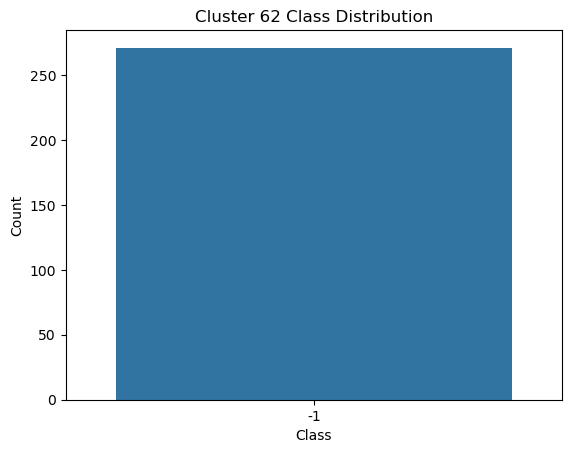

Total class 1: 0
Total class -1: 271


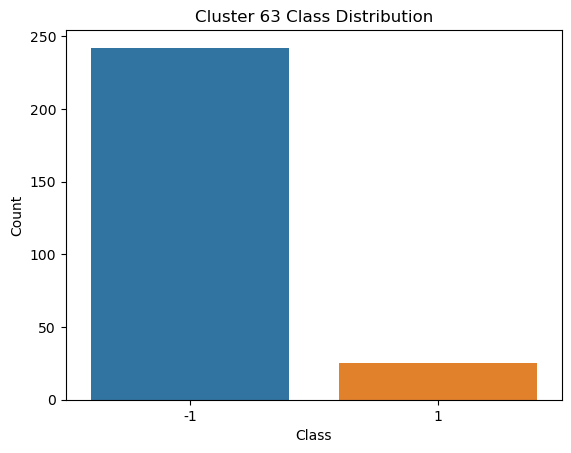

Total class 1: 25
Total class -1: 242


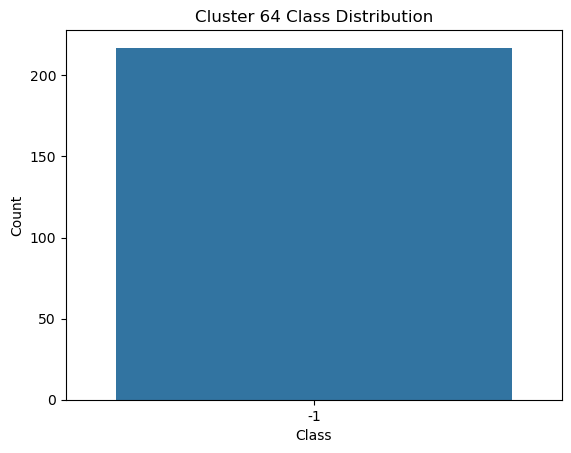

Total class 1: 0
Total class -1: 217


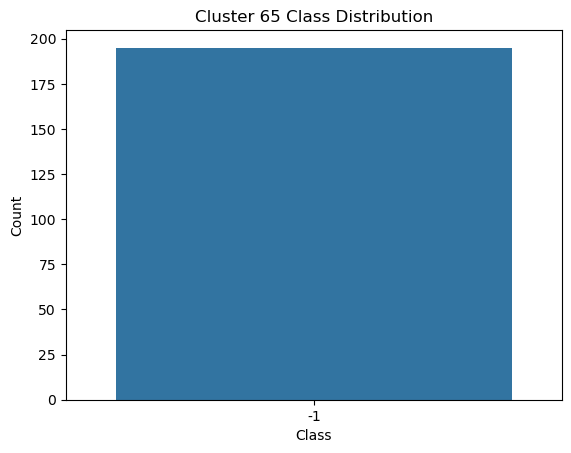

Total class 1: 0
Total class -1: 195


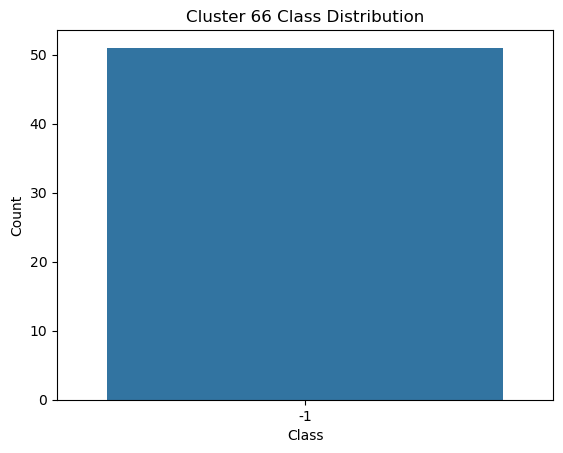

Total class 1: 0
Total class -1: 51


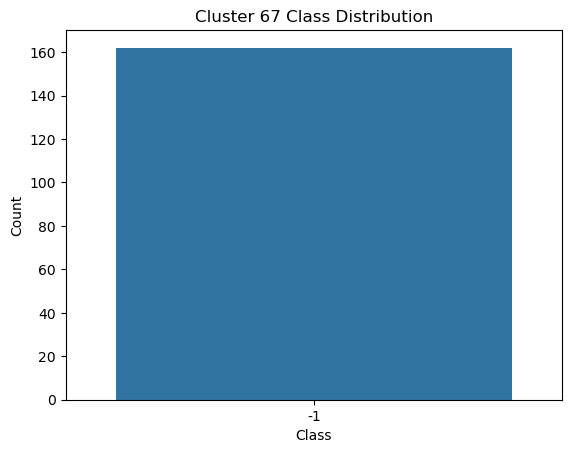

Total class 1: 0
Total class -1: 162


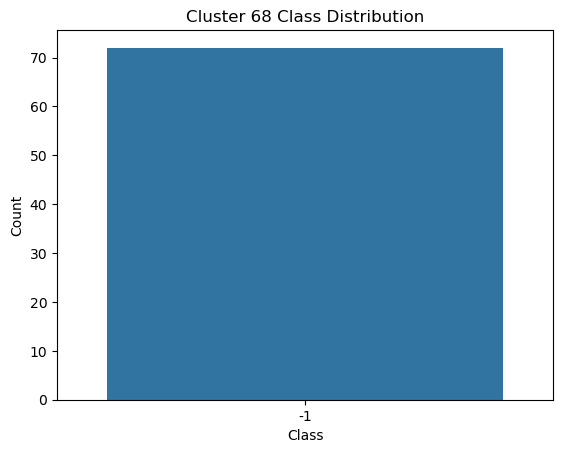

Total class 1: 0
Total class -1: 72


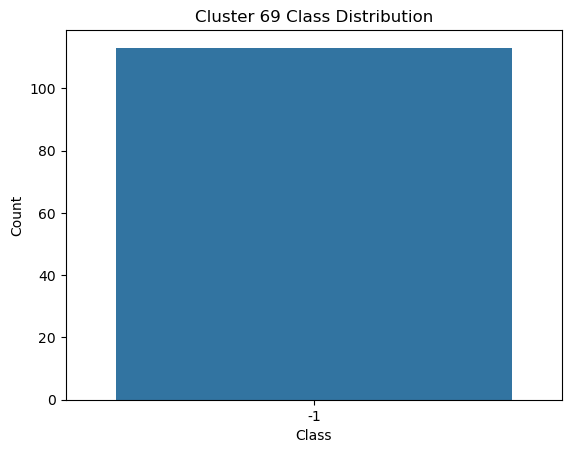

Total class 1: 0
Total class -1: 113


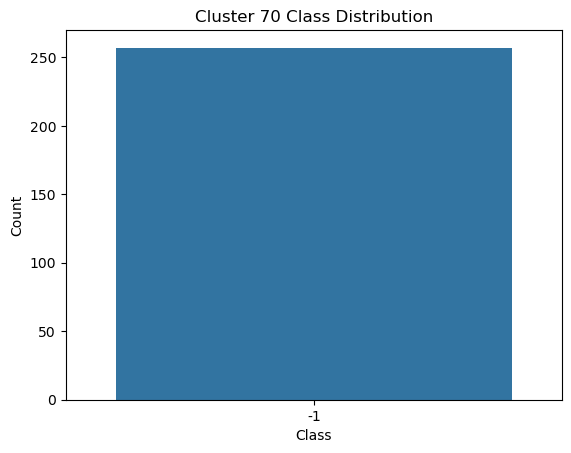

Total class 1: 0
Total class -1: 257


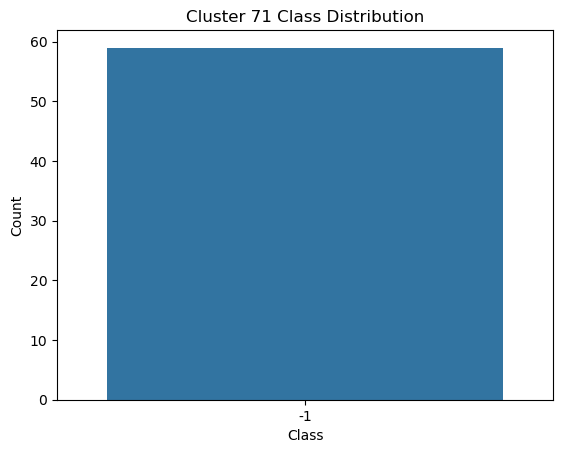

Total class 1: 0
Total class -1: 59


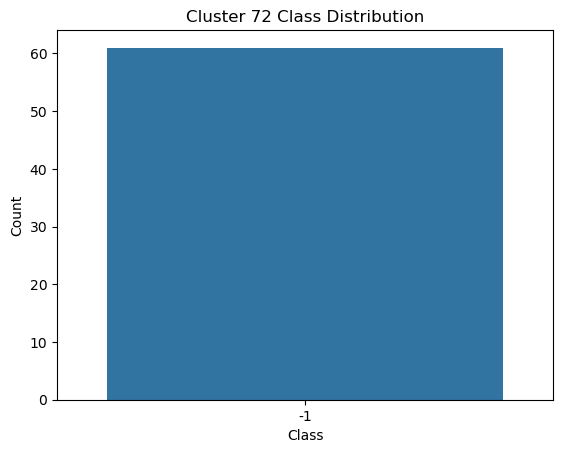

Total class 1: 0
Total class -1: 61


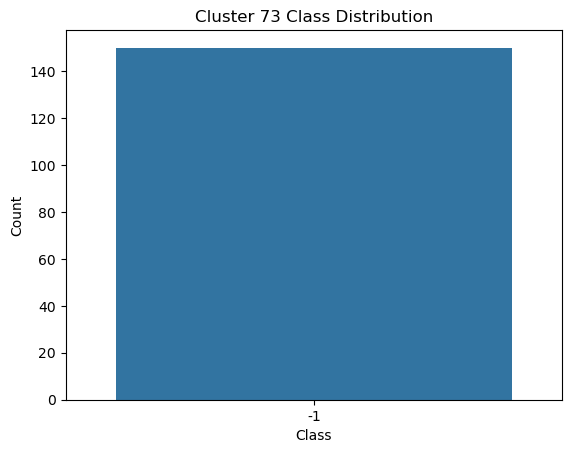

Total class 1: 0
Total class -1: 150


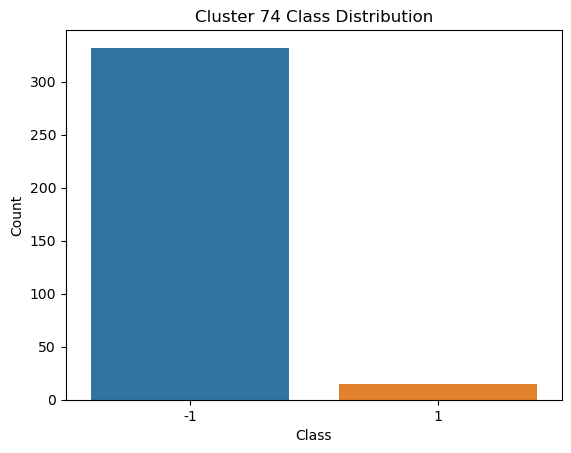

Total class 1: 15
Total class -1: 332


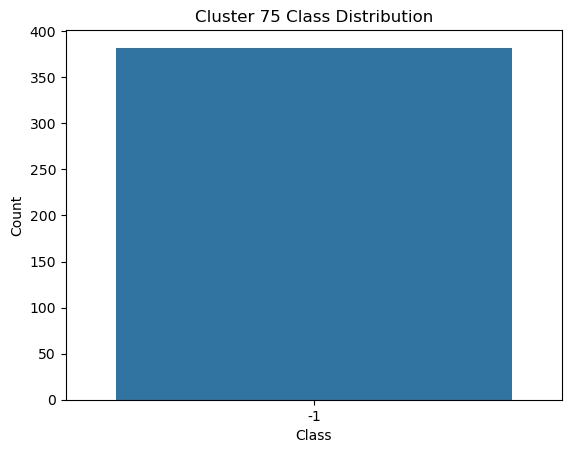

Total class 1: 0
Total class -1: 382


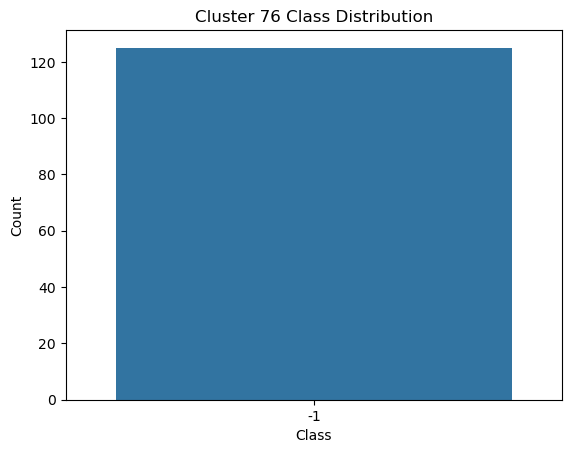

Total class 1: 0
Total class -1: 125


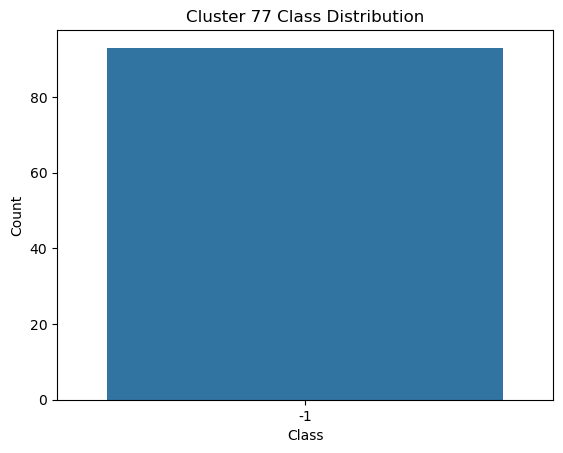

Total class 1: 0
Total class -1: 93


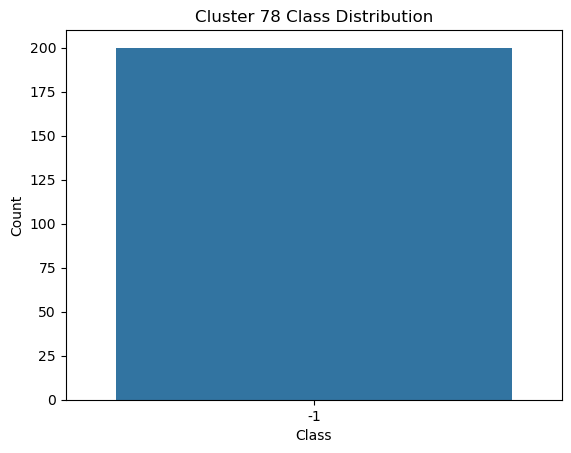

Total class 1: 0
Total class -1: 200


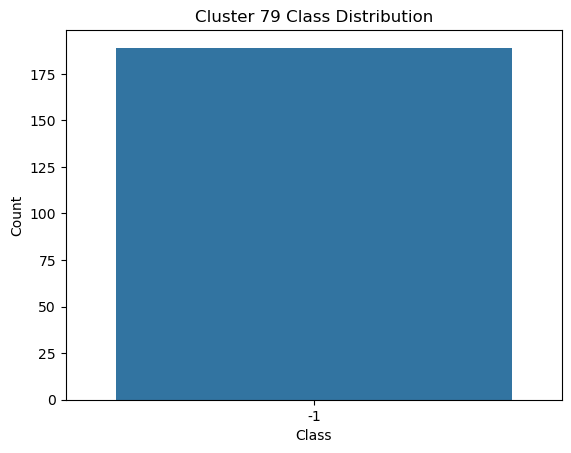

Total class 1: 0
Total class -1: 189


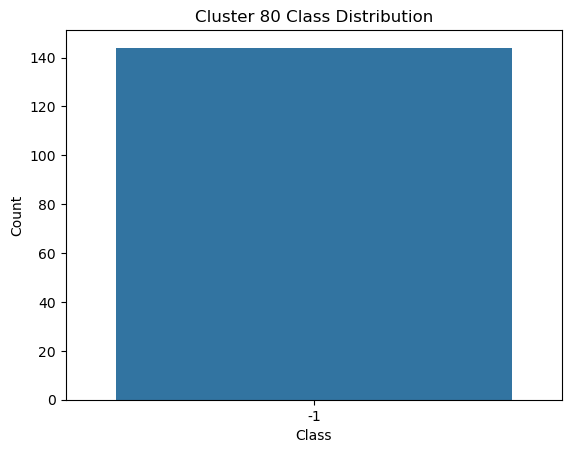

Total class 1: 0
Total class -1: 144


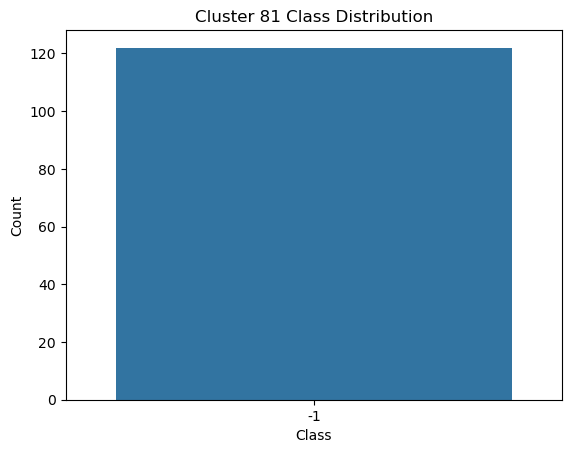

Total class 1: 0
Total class -1: 122


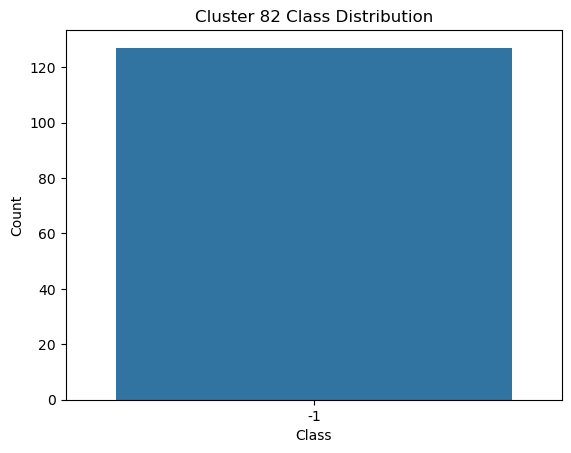

Total class 1: 0
Total class -1: 127


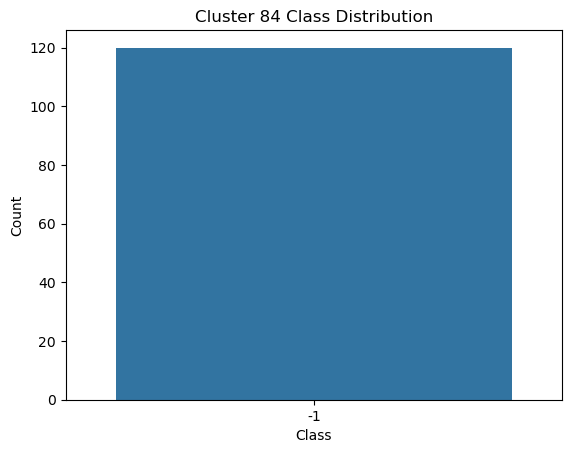

Total class 1: 0
Total class -1: 120


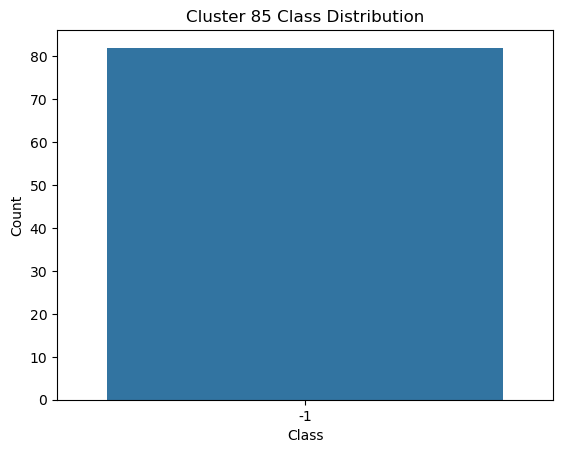

Total class 1: 0
Total class -1: 82


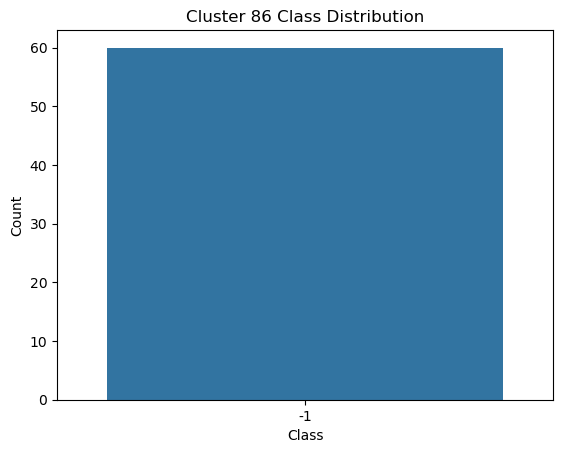

Total class 1: 0
Total class -1: 60


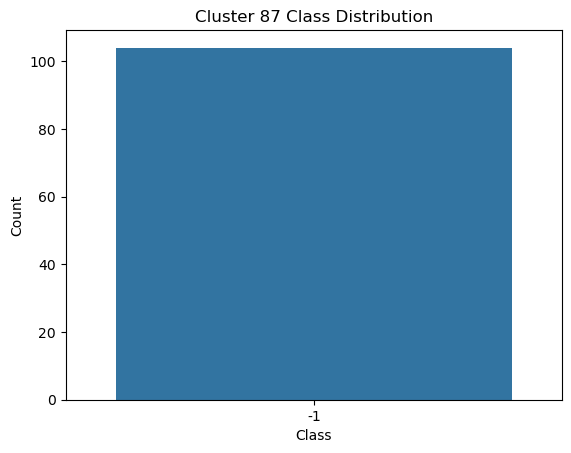

Total class 1: 0
Total class -1: 104


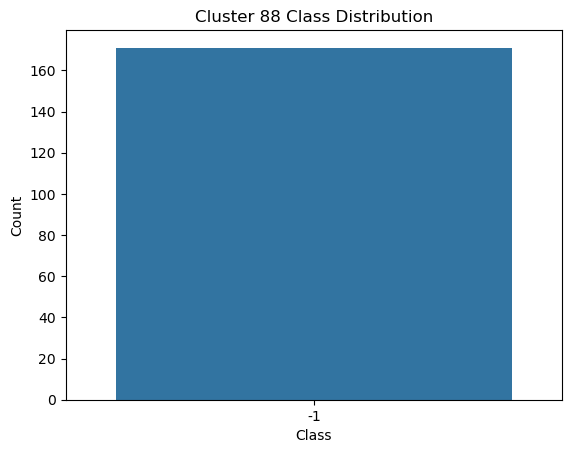

Total class 1: 0
Total class -1: 171


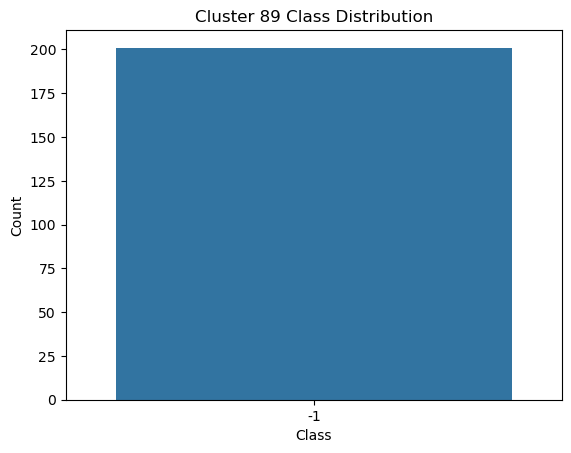

Total class 1: 0
Total class -1: 201


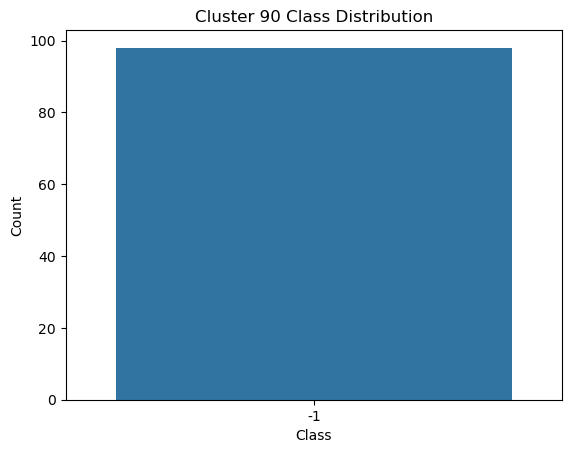

Total class 1: 0
Total class -1: 98


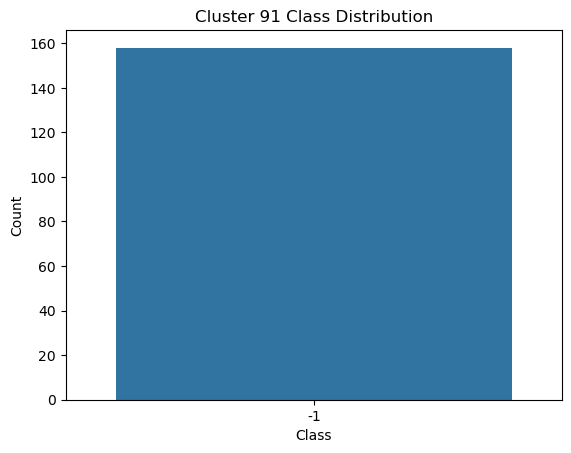

Total class 1: 0
Total class -1: 158


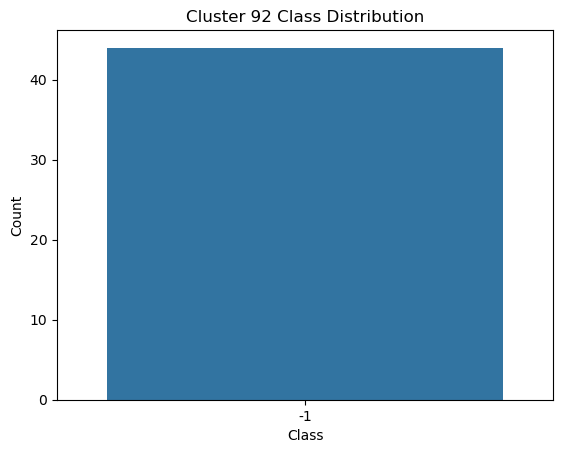

Total class 1: 0
Total class -1: 44


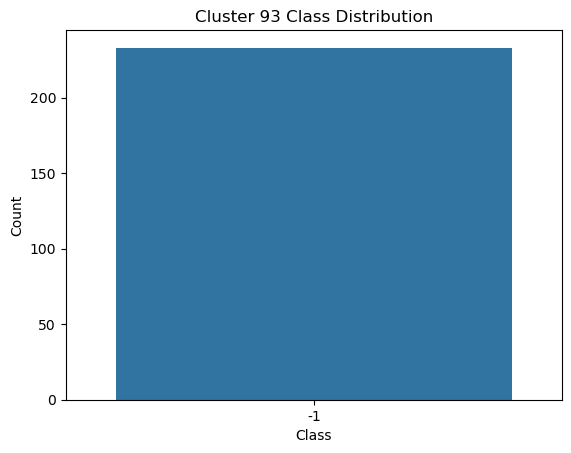

Total class 1: 0
Total class -1: 233


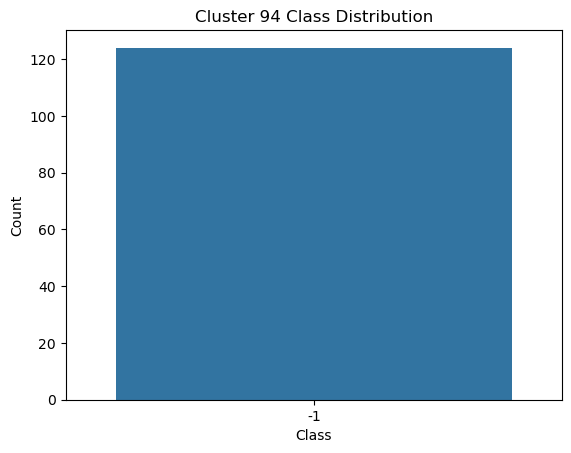

Total class 1: 0
Total class -1: 124


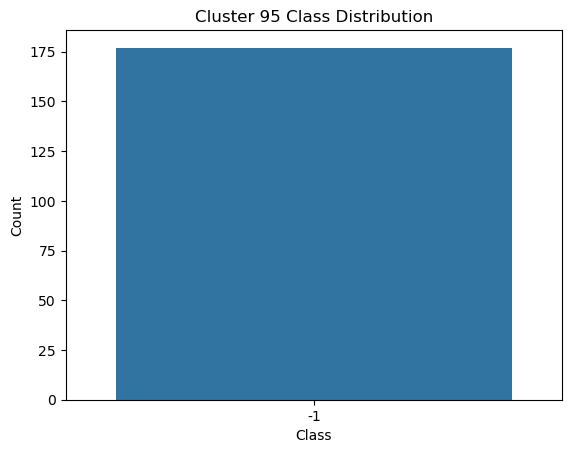

Total class 1: 0
Total class -1: 177


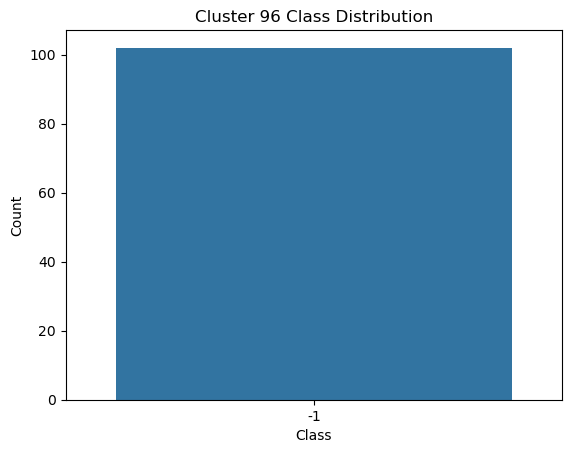

Total class 1: 0
Total class -1: 102


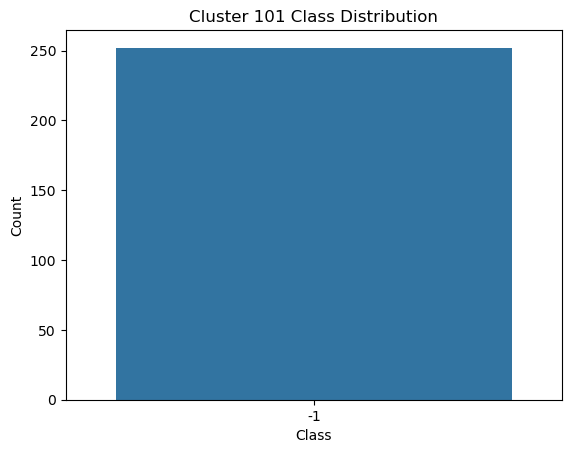

Total class 1: 0
Total class -1: 252


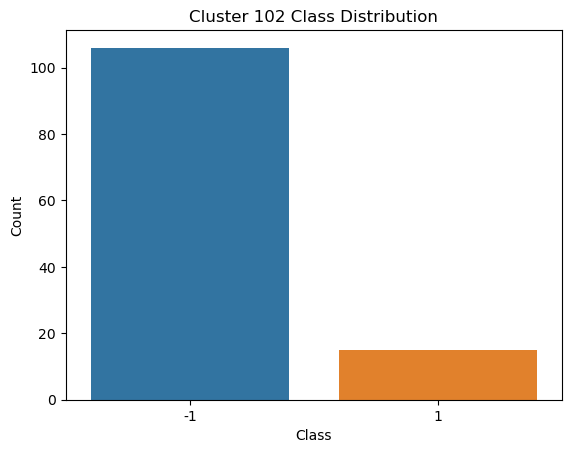

Total class 1: 15
Total class -1: 106


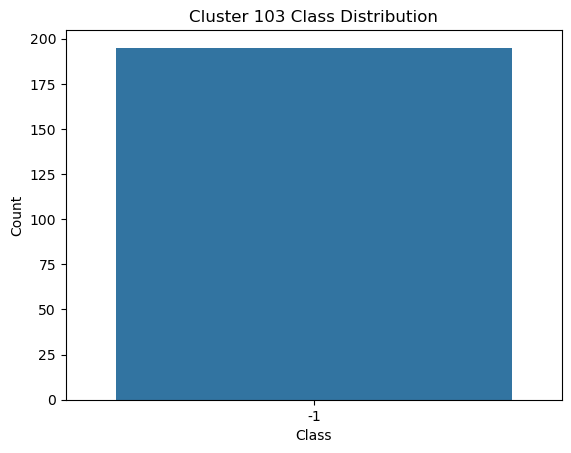

Total class 1: 0
Total class -1: 195


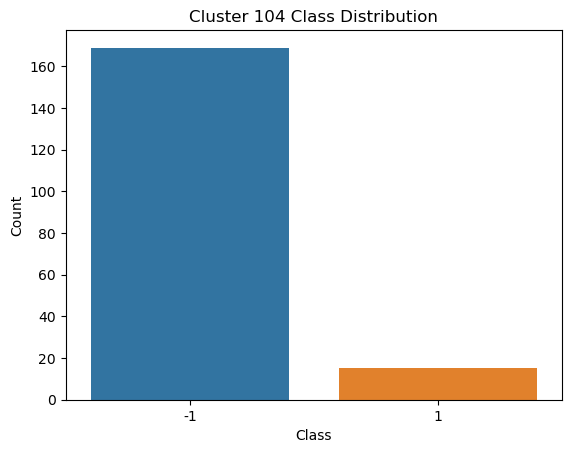

Total class 1: 15
Total class -1: 169


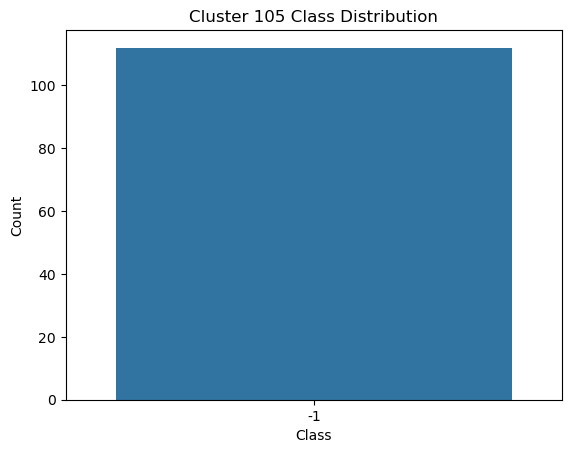

Total class 1: 0
Total class -1: 112


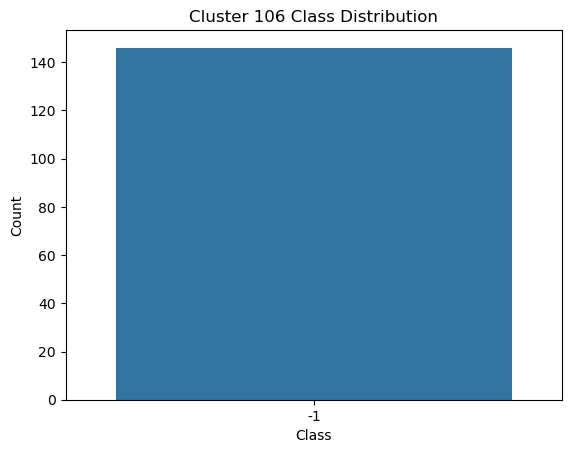

Total class 1: 0
Total class -1: 146


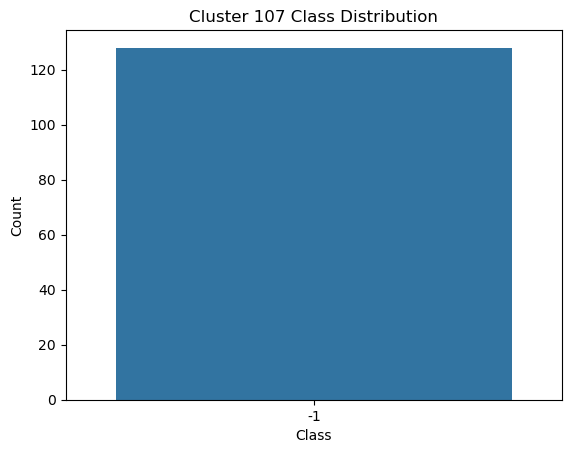

Total class 1: 0
Total class -1: 128


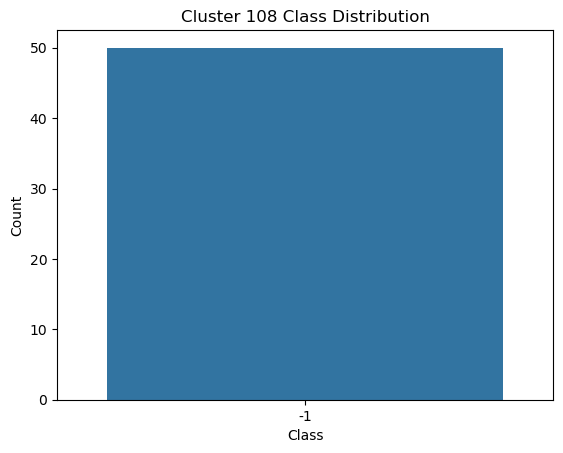

Total class 1: 0
Total class -1: 50


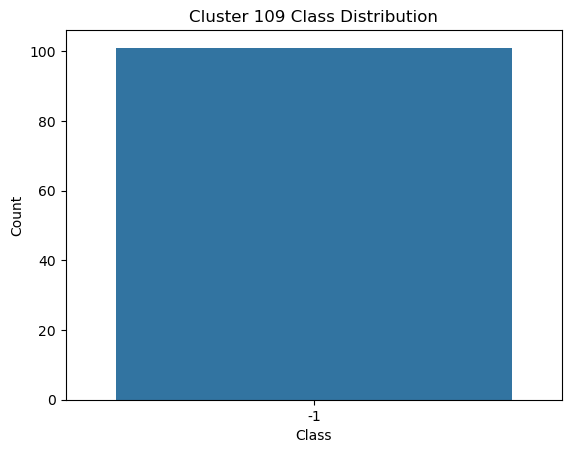

Total class 1: 0
Total class -1: 101


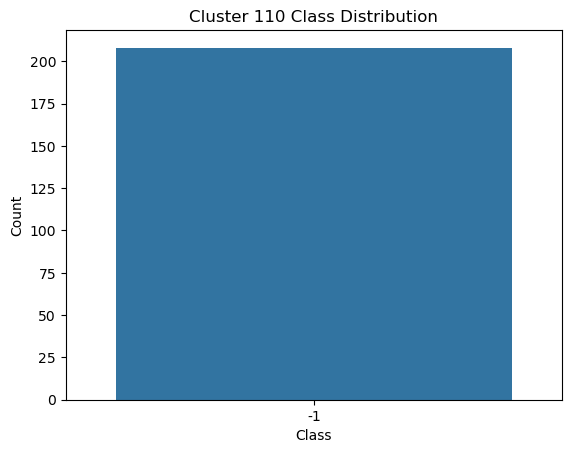

Total class 1: 0
Total class -1: 208


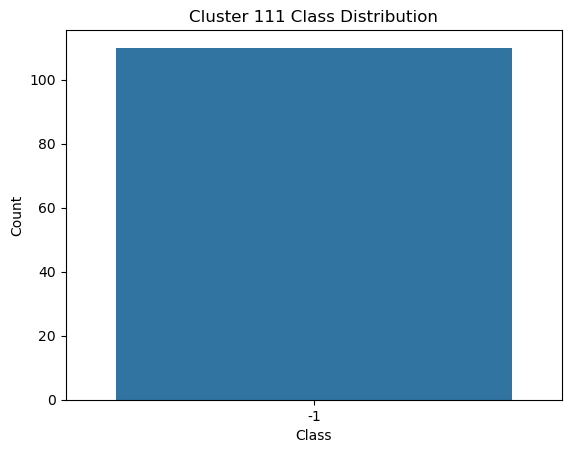

Total class 1: 0
Total class -1: 110


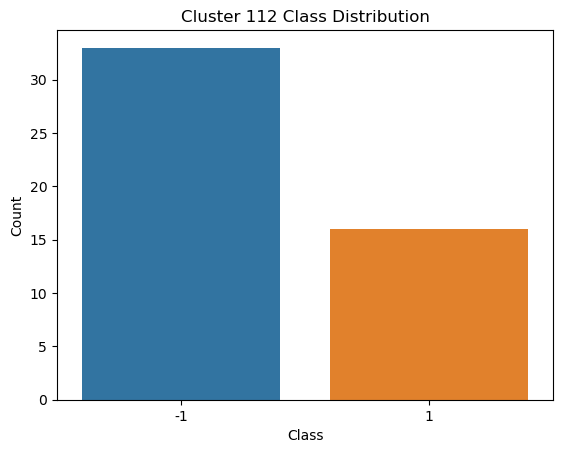

Total class 1: 16
Total class -1: 33


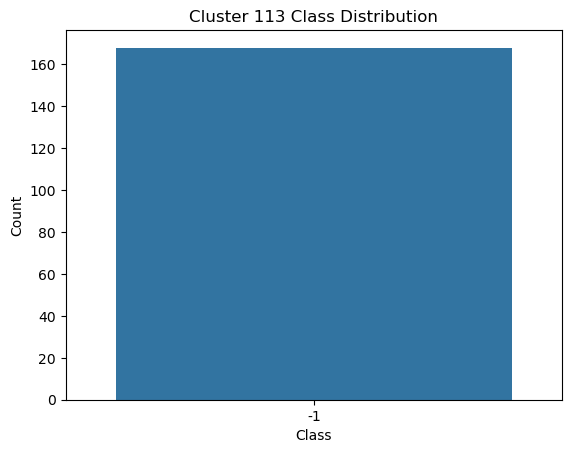

Total class 1: 0
Total class -1: 168


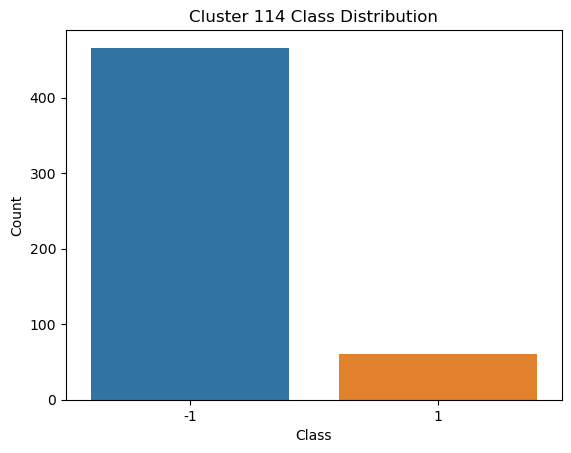

Total class 1: 60
Total class -1: 466


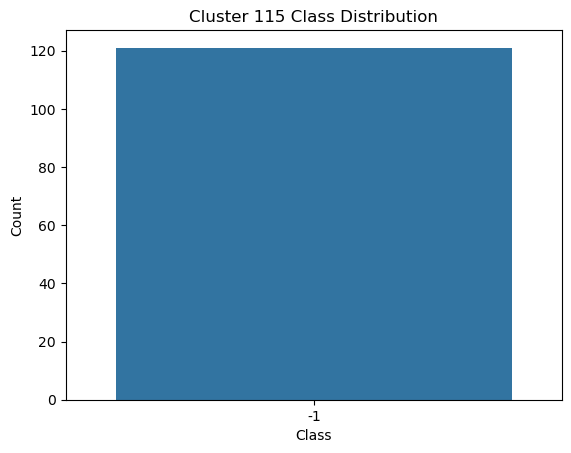

Total class 1: 0
Total class -1: 121


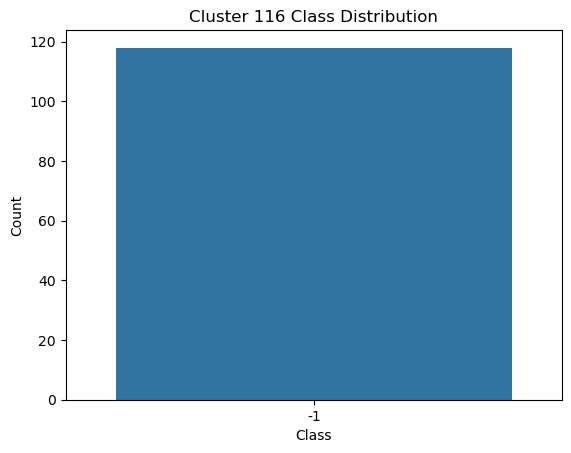

Total class 1: 0
Total class -1: 118


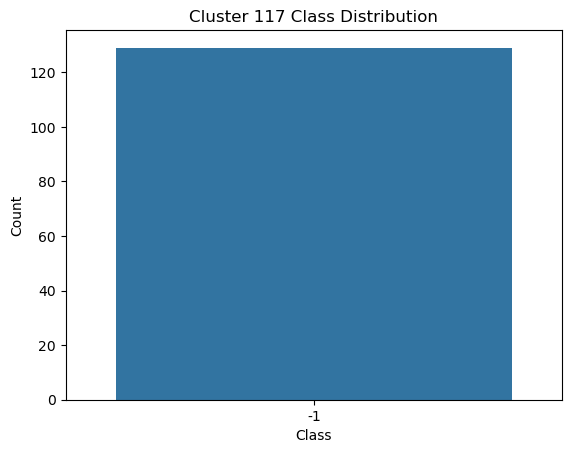

Total class 1: 0
Total class -1: 129


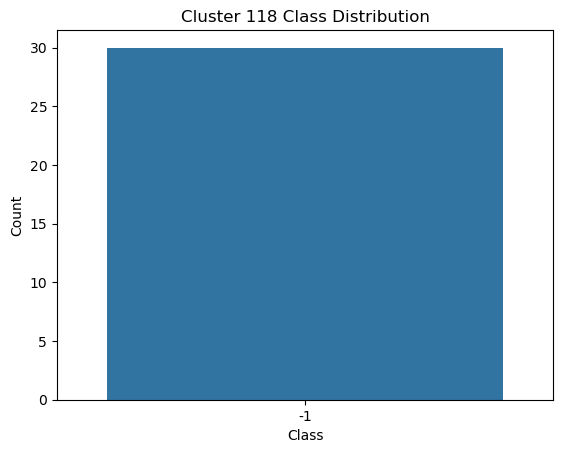

Total class 1: 0
Total class -1: 30


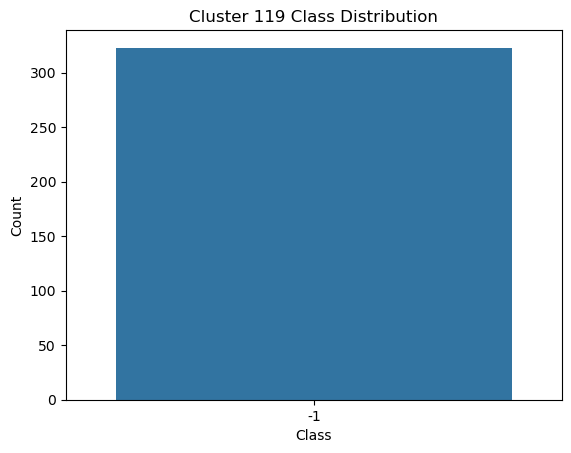

Total class 1: 0
Total class -1: 323


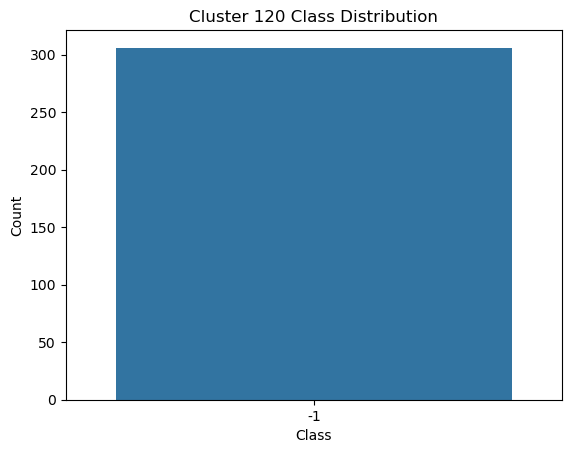

Total class 1: 0
Total class -1: 306


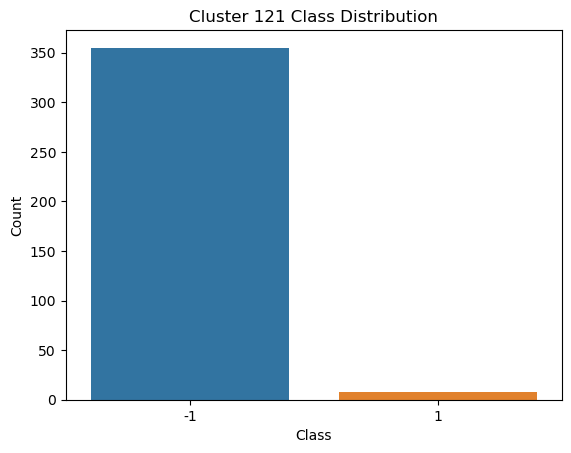

Total class 1: 8
Total class -1: 355


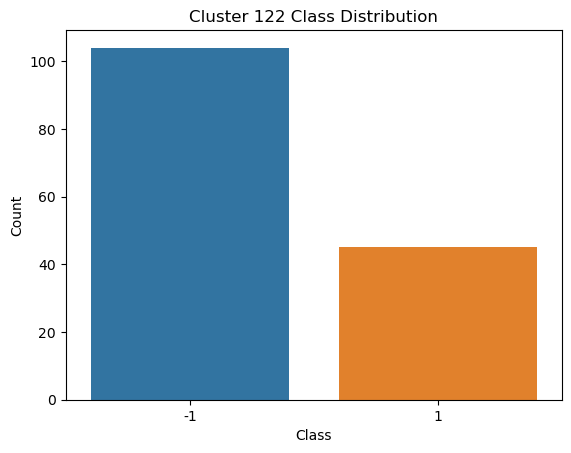

Total class 1: 45
Total class -1: 104


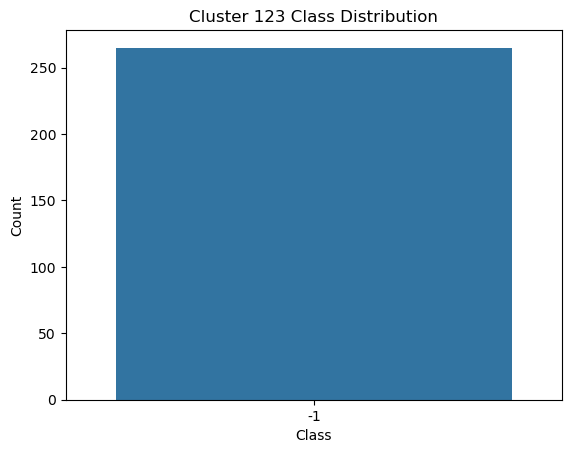

Total class 1: 0
Total class -1: 265


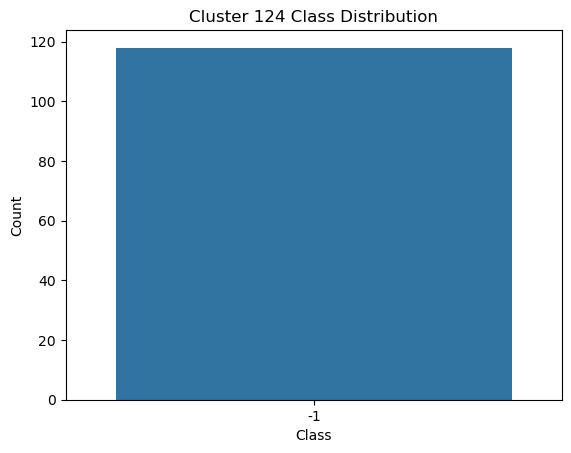

Total class 1: 0
Total class -1: 118


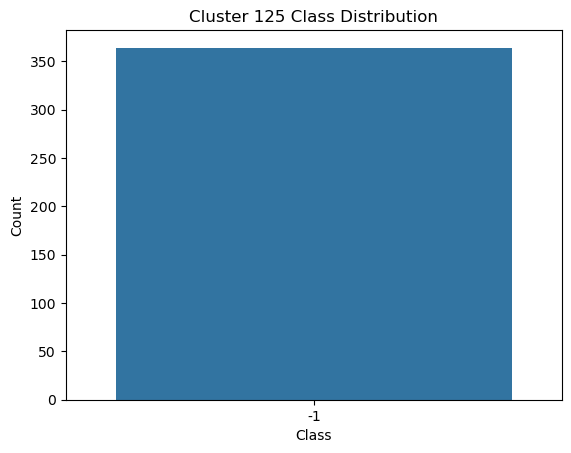

Total class 1: 0
Total class -1: 364


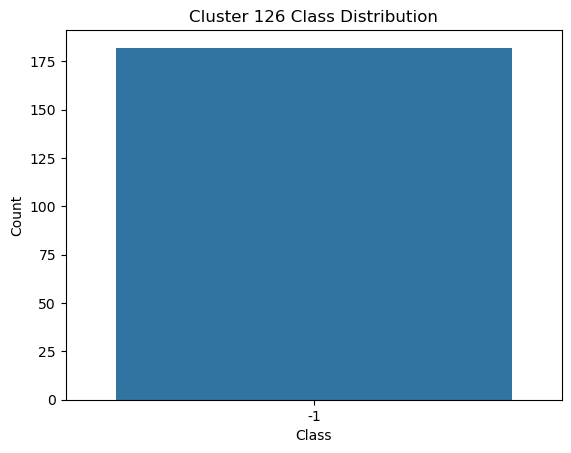

Total class 1: 0
Total class -1: 182


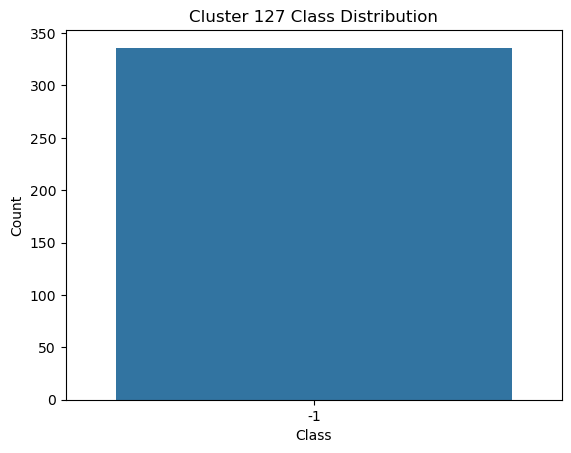

Total class 1: 0
Total class -1: 336


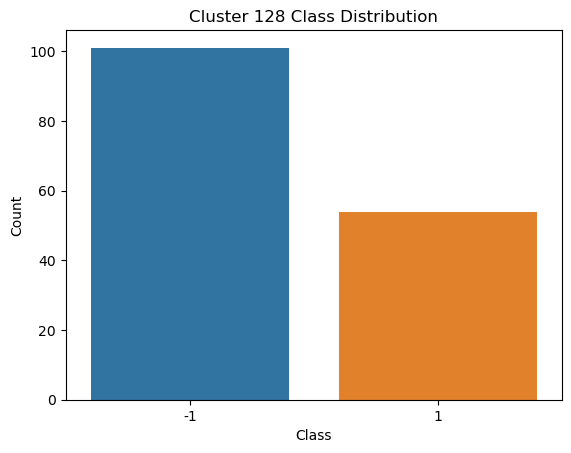

Total class 1: 54
Total class -1: 101


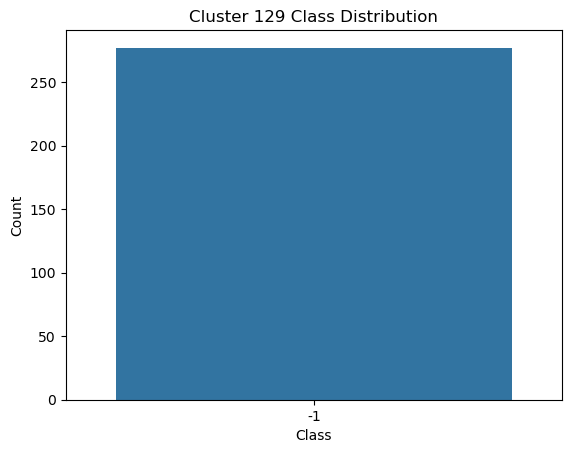

Total class 1: 0
Total class -1: 277


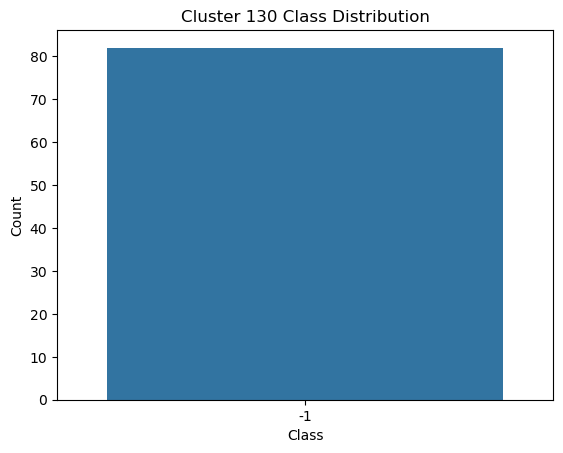

Total class 1: 0
Total class -1: 82


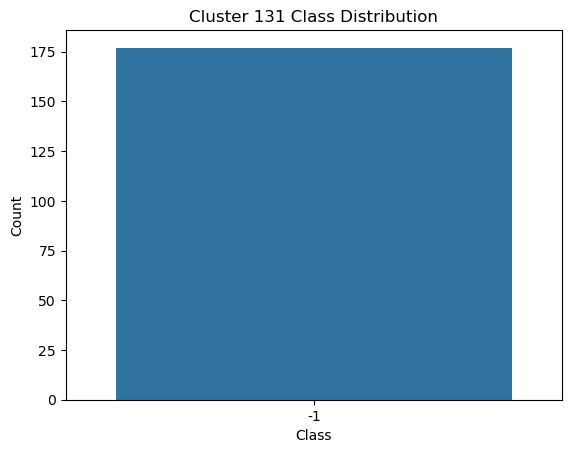

Total class 1: 0
Total class -1: 177


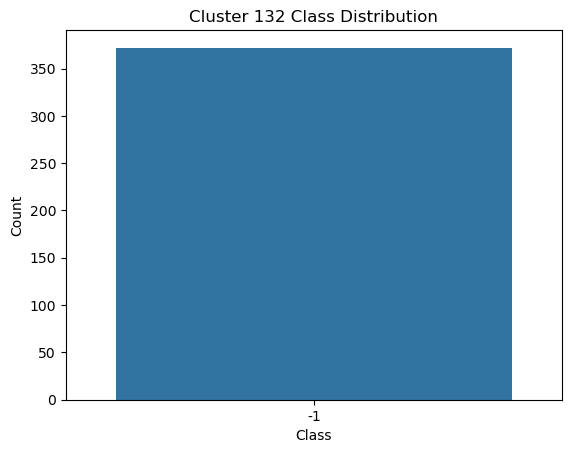

Total class 1: 0
Total class -1: 372


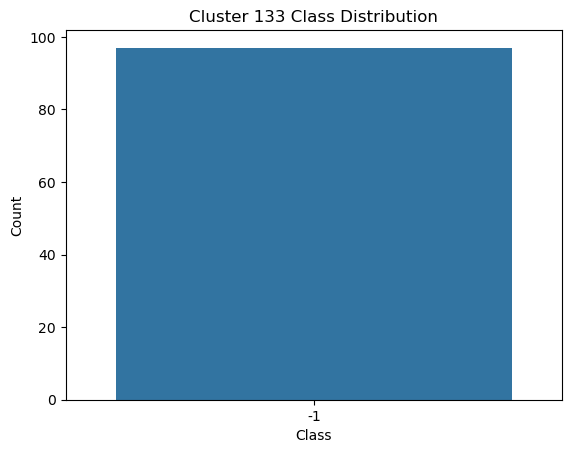

Total class 1: 0
Total class -1: 97


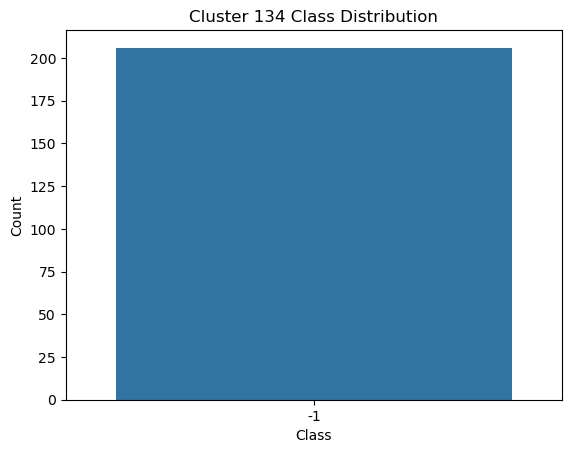

Total class 1: 0
Total class -1: 206


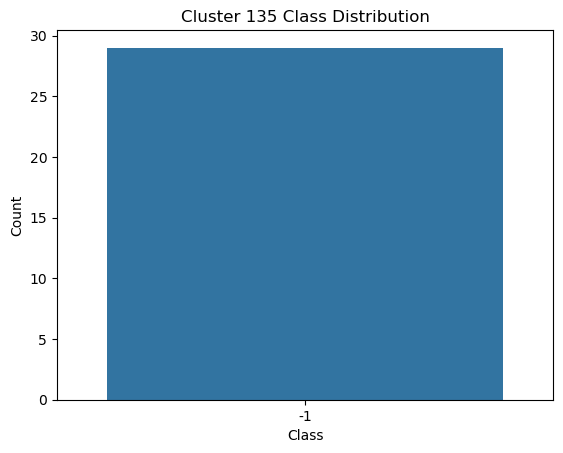

Total class 1: 0
Total class -1: 29


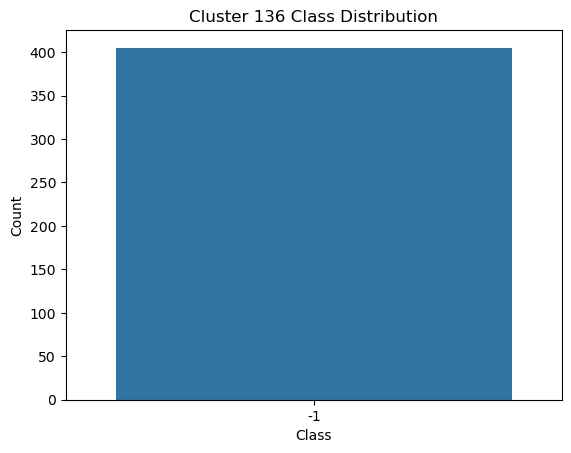

Total class 1: 0
Total class -1: 405


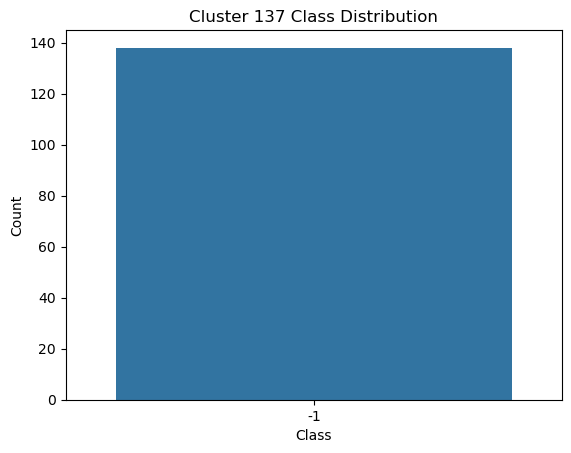

Total class 1: 0
Total class -1: 138


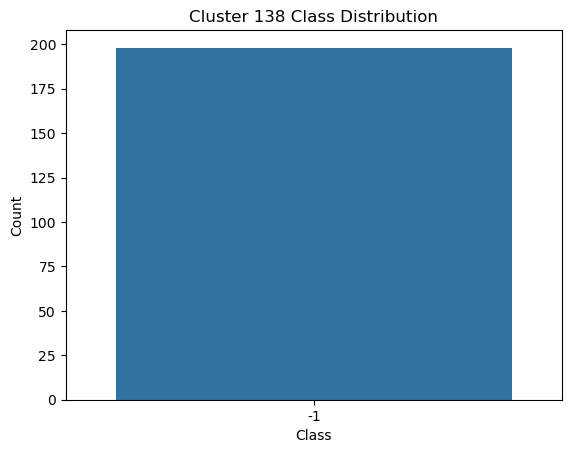

Total class 1: 0
Total class -1: 198


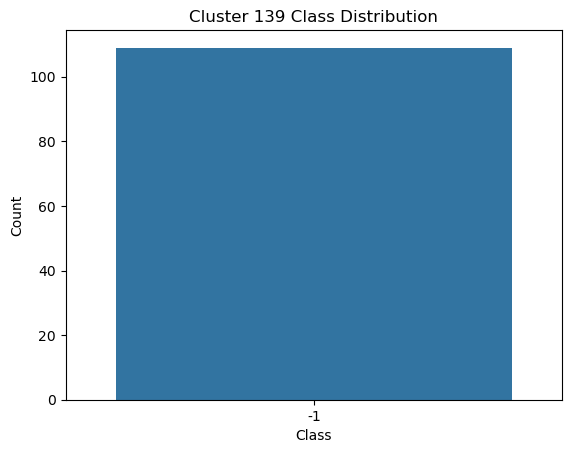

Total class 1: 0
Total class -1: 109


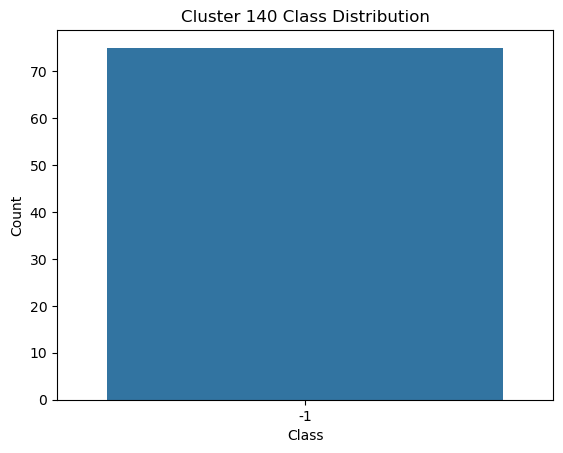

Total class 1: 0
Total class -1: 75


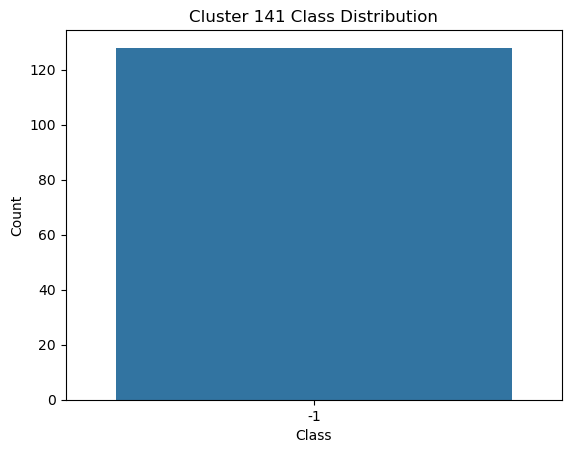

Total class 1: 0
Total class -1: 128


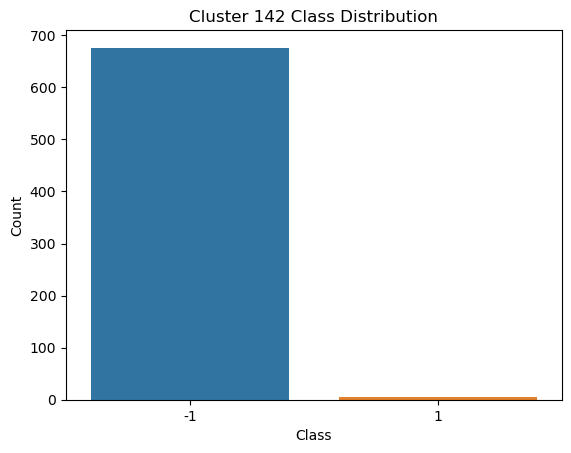

Total class 1: 6
Total class -1: 676


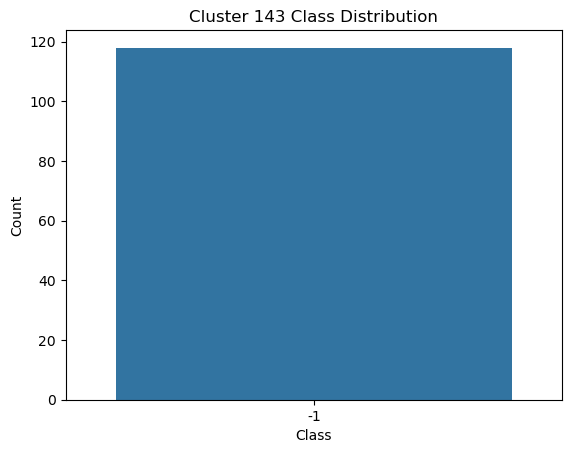

Total class 1: 0
Total class -1: 118


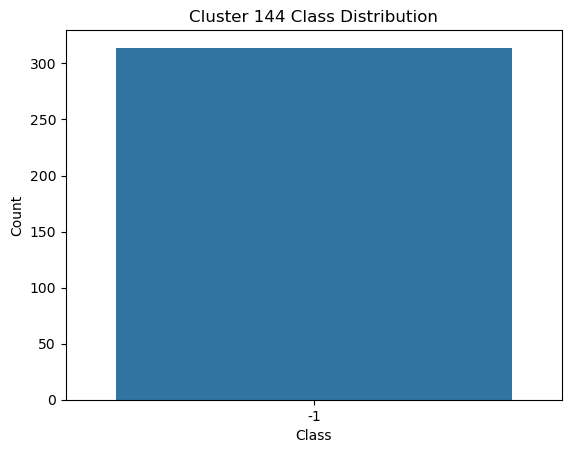

Total class 1: 0
Total class -1: 314


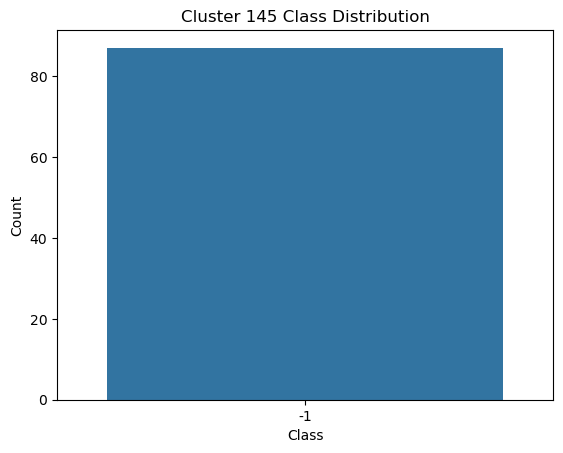

Total class 1: 0
Total class -1: 87


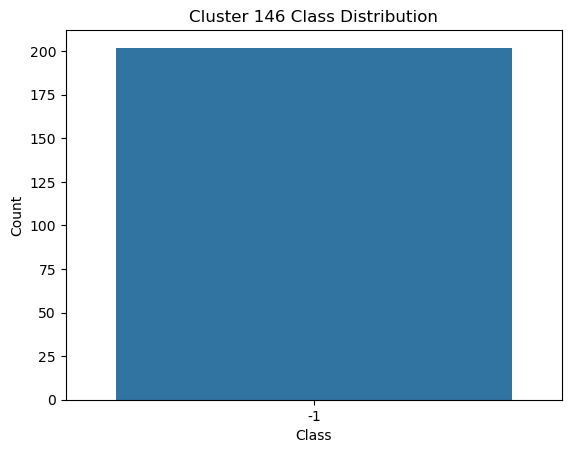

Total class 1: 0
Total class -1: 202


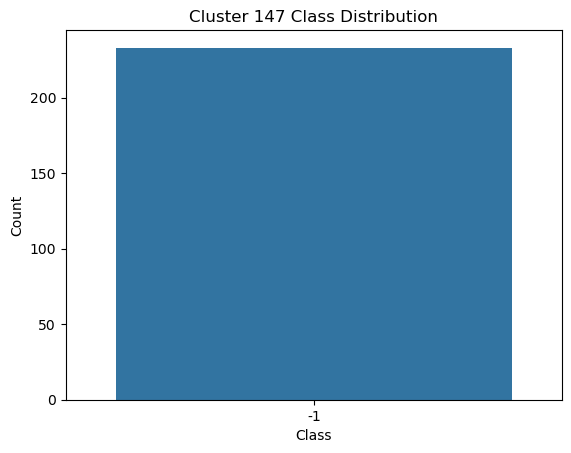

Total class 1: 0
Total class -1: 233


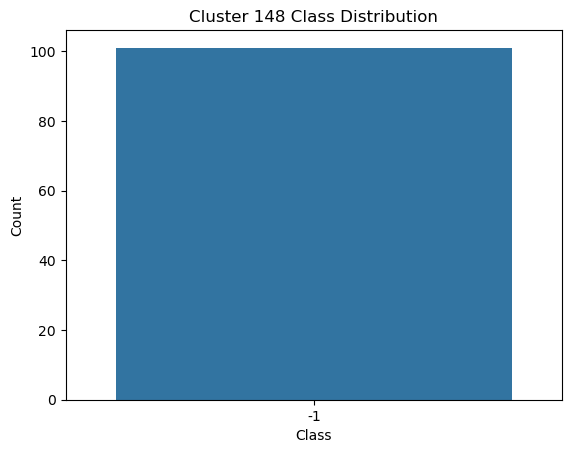

Total class 1: 0
Total class -1: 101


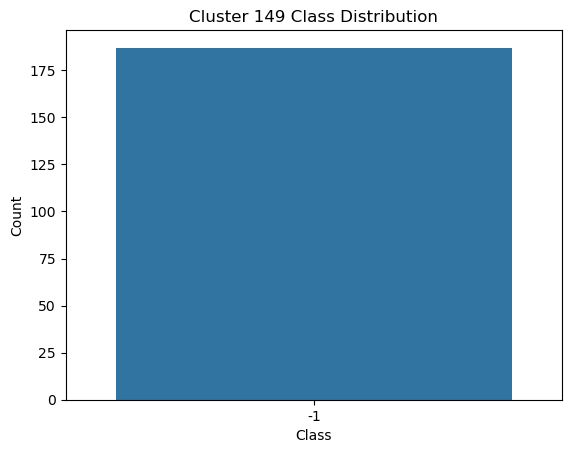

Total class 1: 0
Total class -1: 187


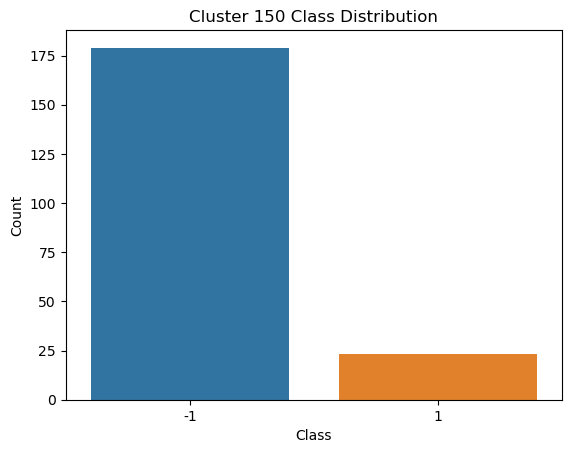

Total class 1: 23
Total class -1: 179


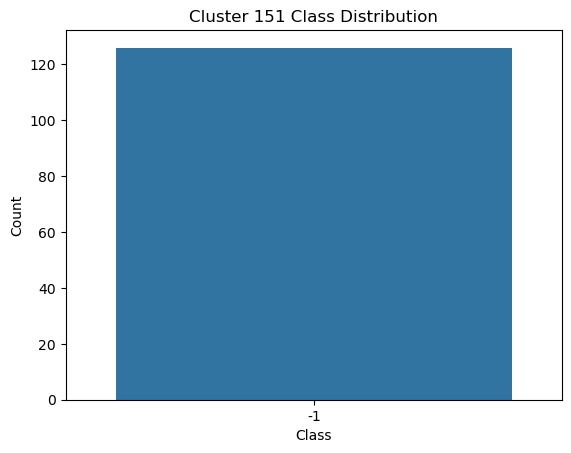

Total class 1: 0
Total class -1: 126


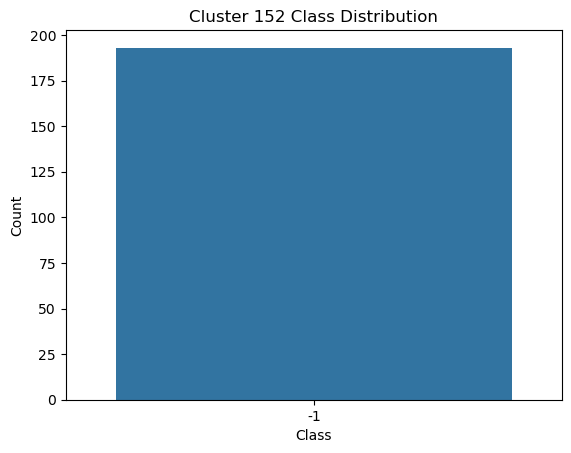

Total class 1: 0
Total class -1: 193


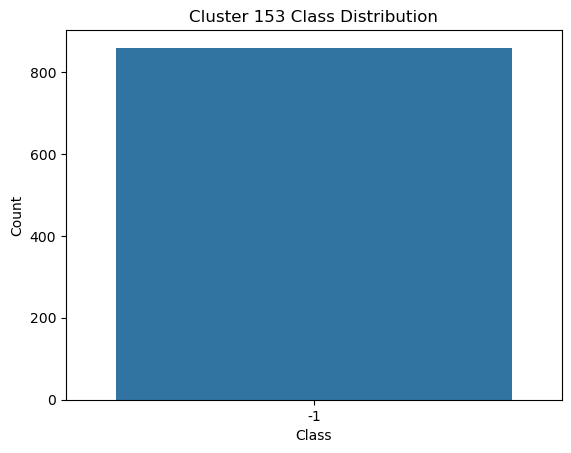

Total class 1: 0
Total class -1: 859


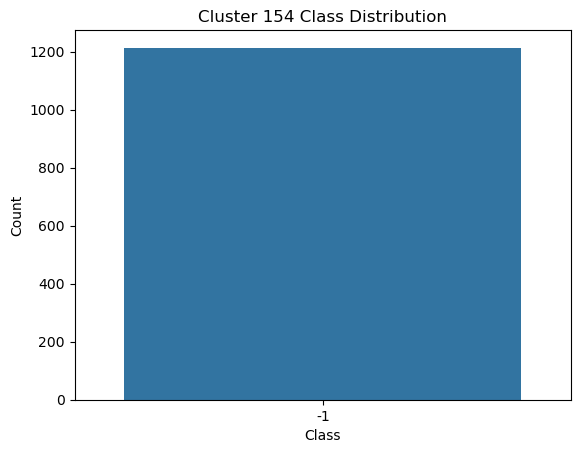

Total class 1: 0
Total class -1: 1214


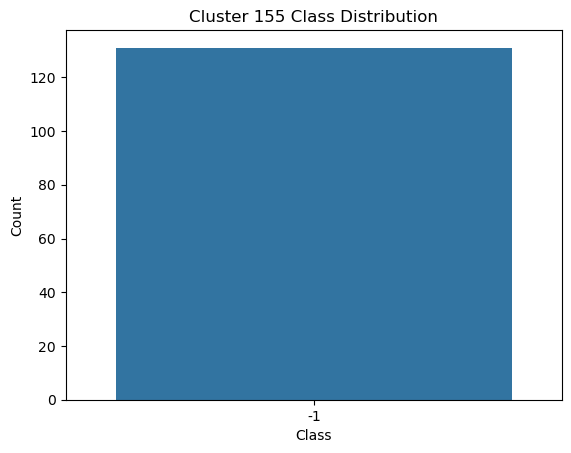

Total class 1: 0
Total class -1: 131


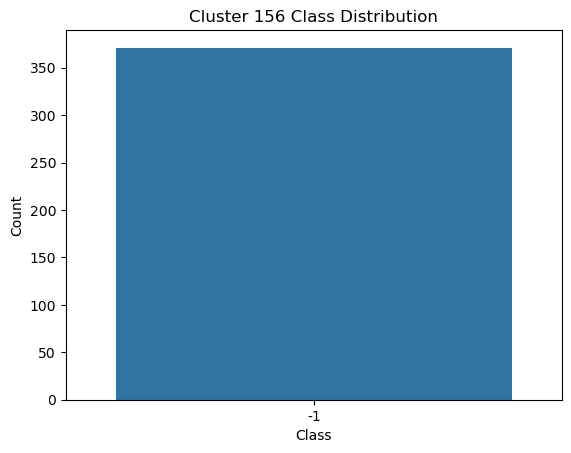

Total class 1: 0
Total class -1: 371


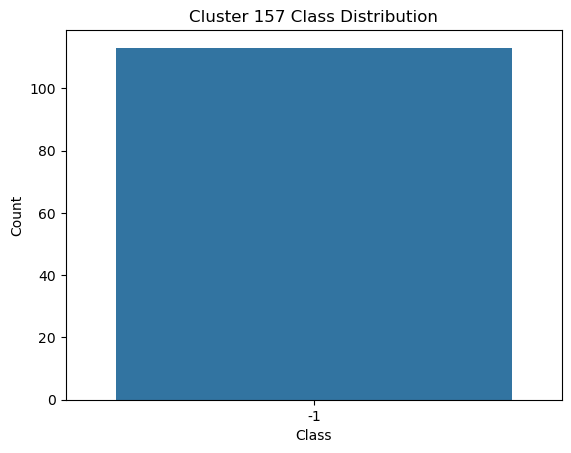

Total class 1: 0
Total class -1: 113


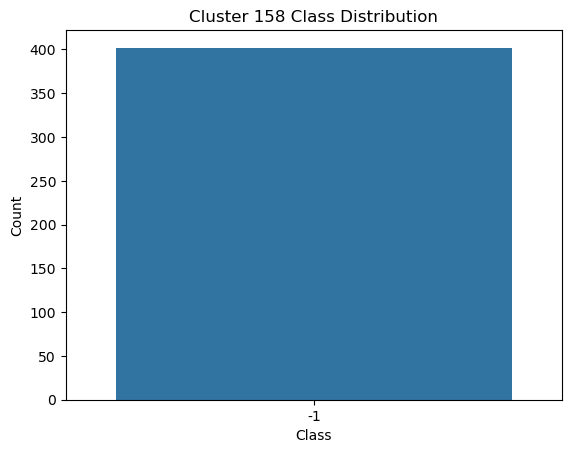

Total class 1: 0
Total class -1: 402


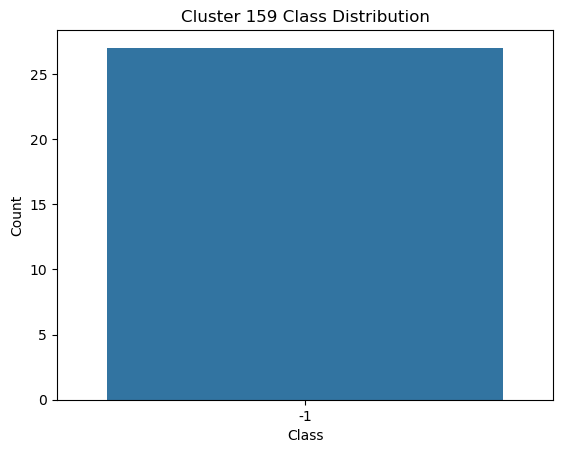

Total class 1: 0
Total class -1: 27


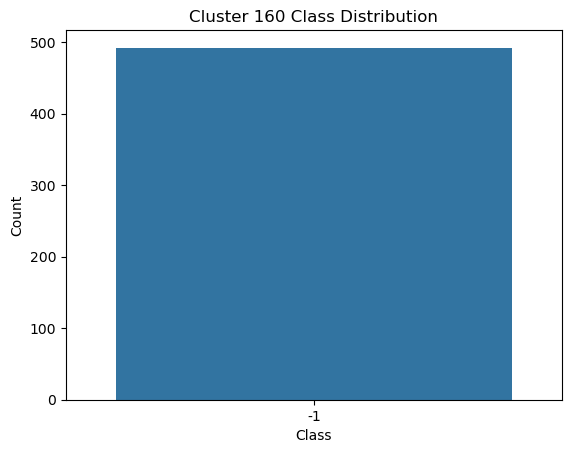

Total class 1: 0
Total class -1: 492


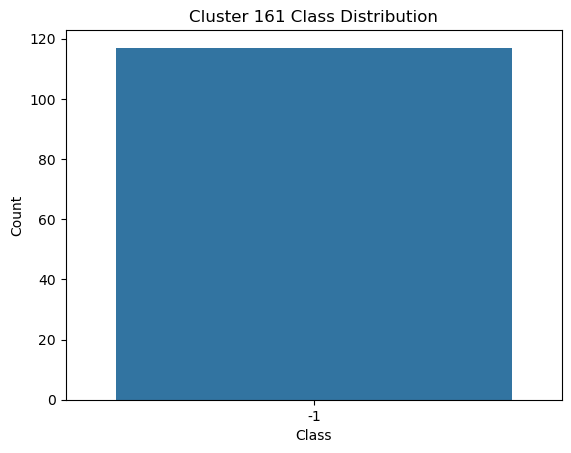

Total class 1: 0
Total class -1: 117


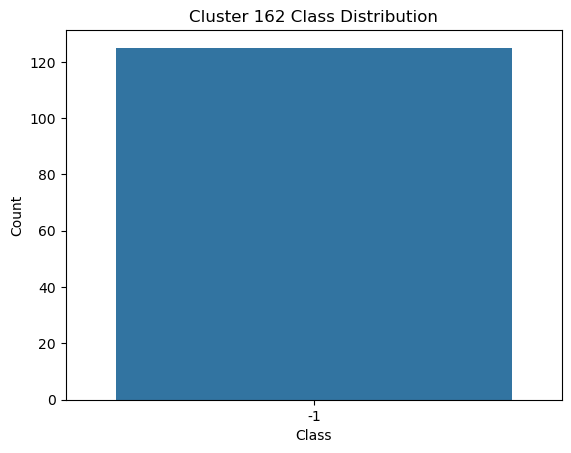

Total class 1: 0
Total class -1: 125


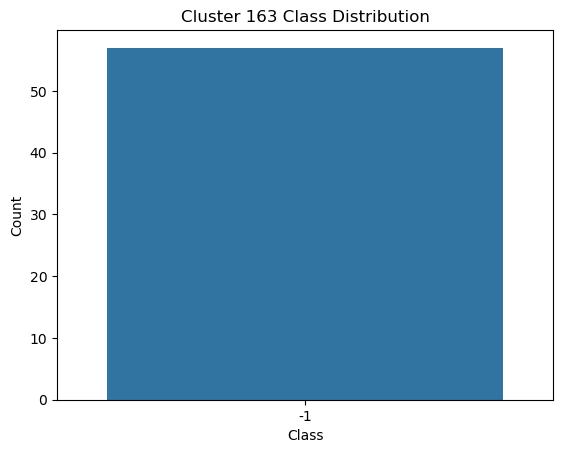

Total class 1: 0
Total class -1: 57


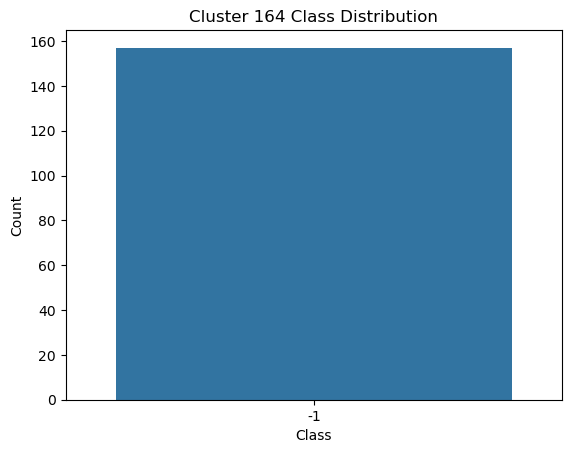

Total class 1: 0
Total class -1: 157


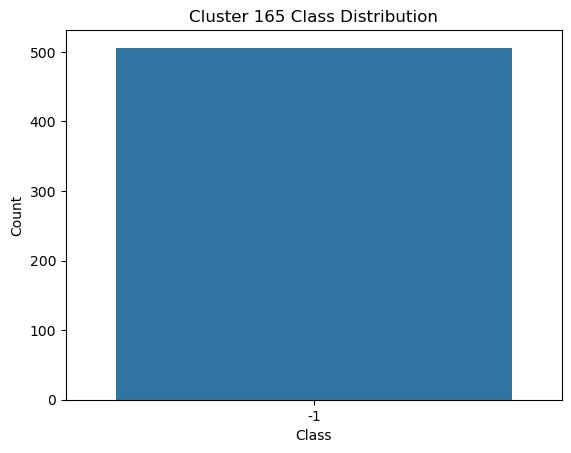

Total class 1: 0
Total class -1: 506


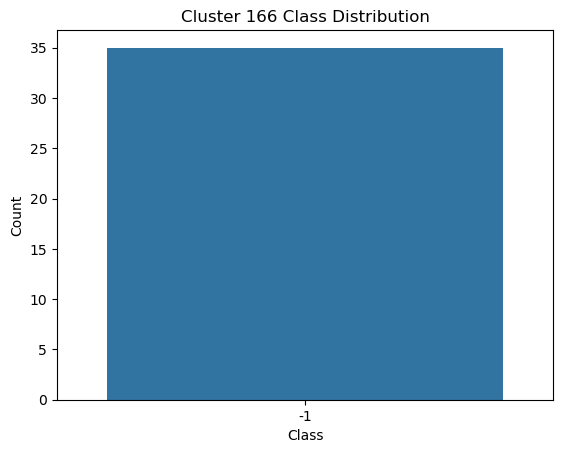

Total class 1: 0
Total class -1: 35


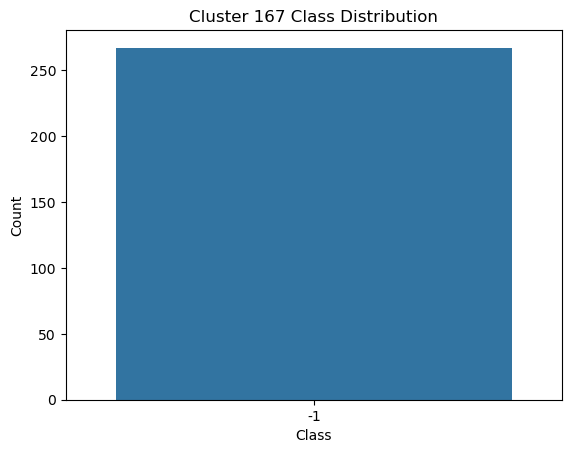

Total class 1: 0
Total class -1: 267


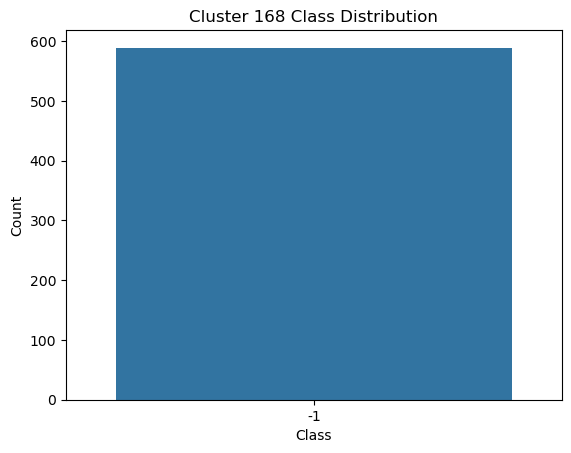

Total class 1: 0
Total class -1: 589


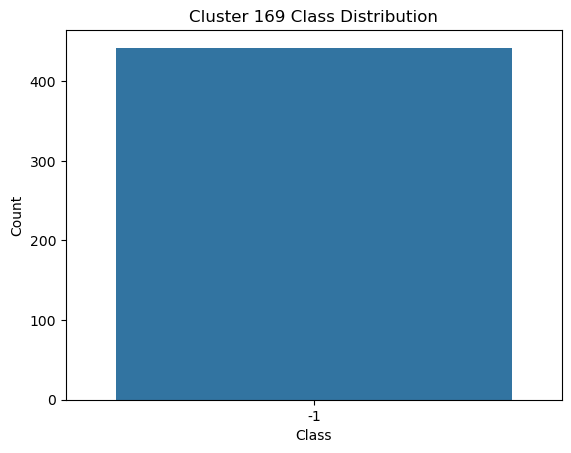

Total class 1: 0
Total class -1: 442


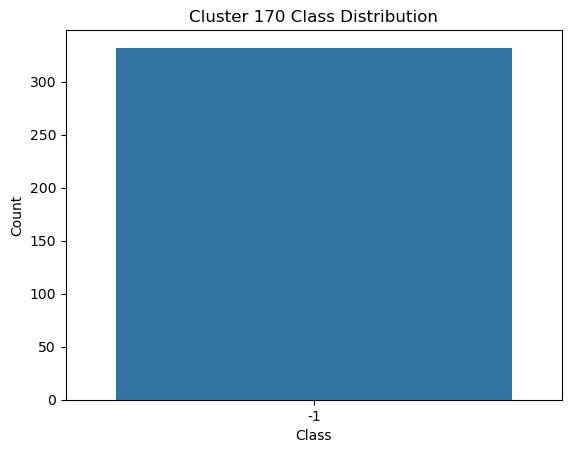

Total class 1: 0
Total class -1: 332


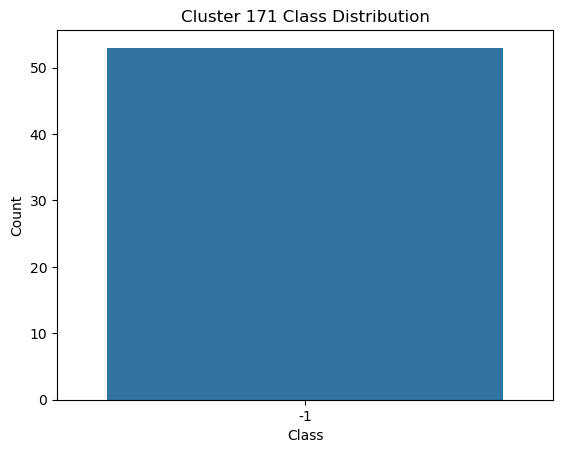

Total class 1: 0
Total class -1: 53


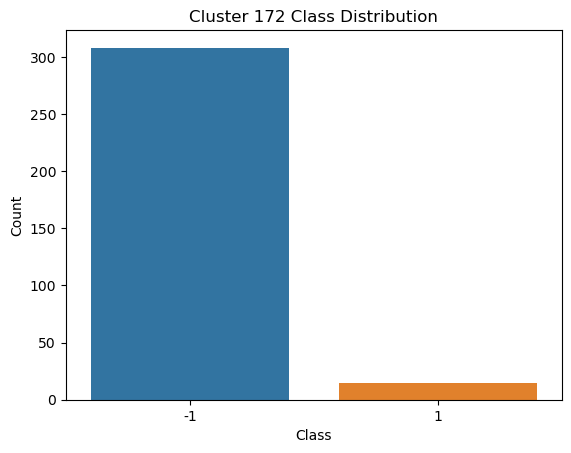

Total class 1: 15
Total class -1: 308


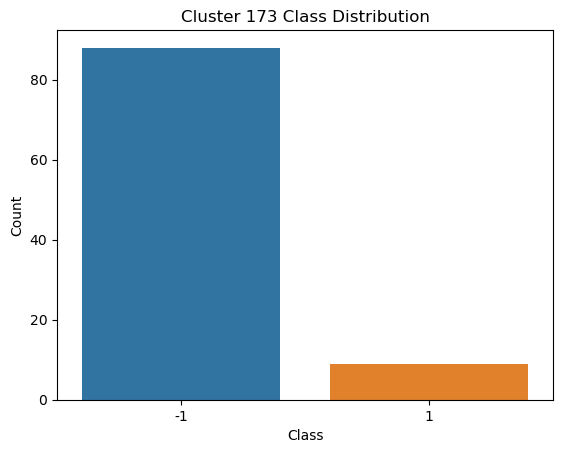

Total class 1: 9
Total class -1: 88


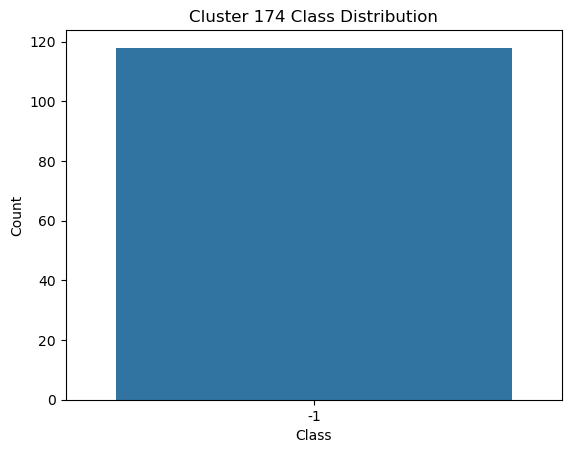

Total class 1: 0
Total class -1: 118


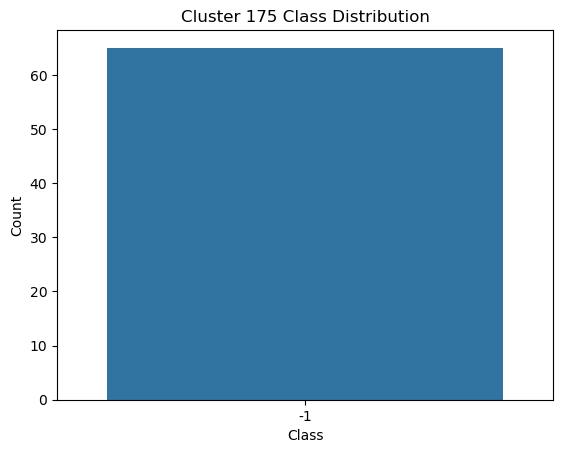

Total class 1: 0
Total class -1: 65


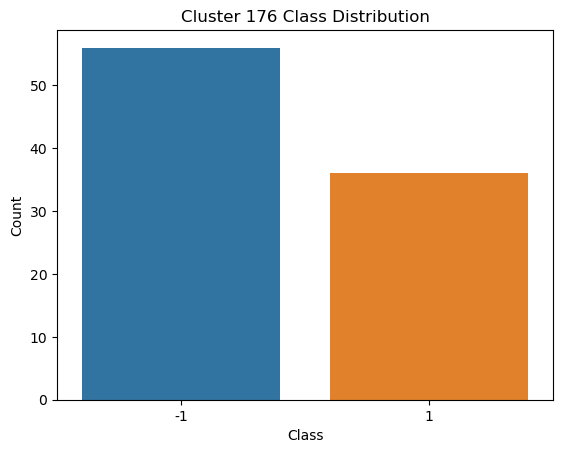

Total class 1: 36
Total class -1: 56


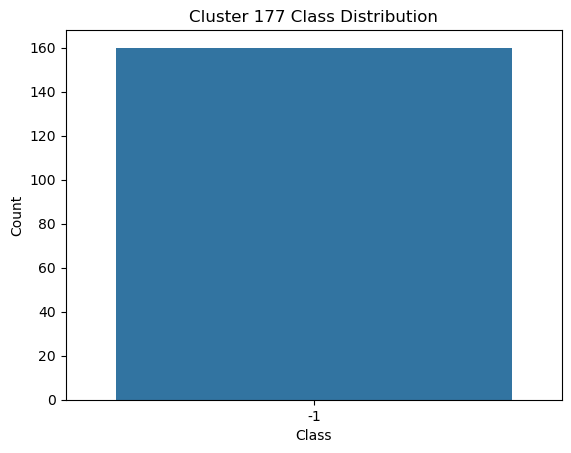

Total class 1: 0
Total class -1: 160


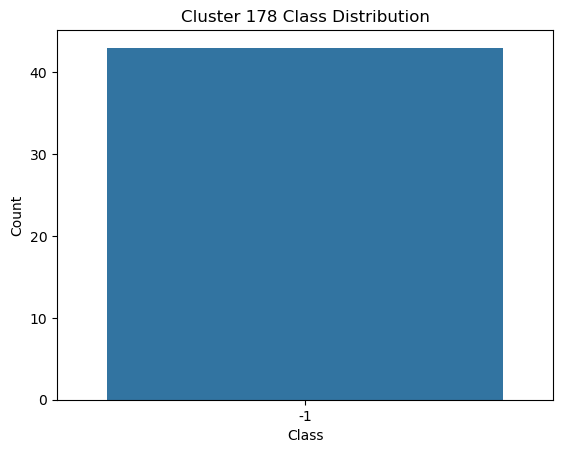

Total class 1: 0
Total class -1: 43


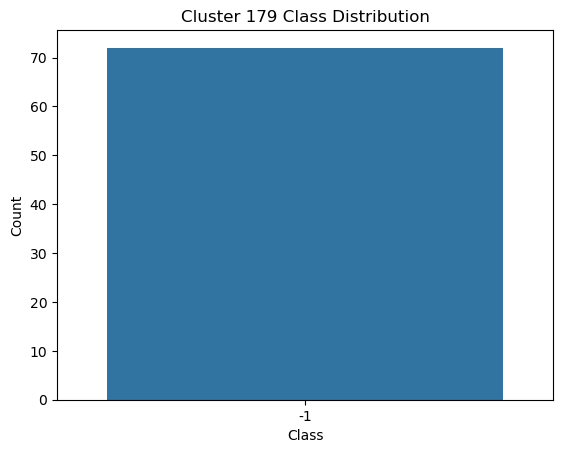

Total class 1: 0
Total class -1: 72


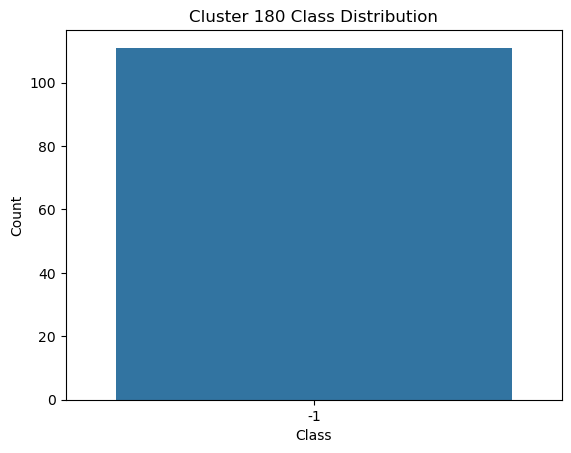

Total class 1: 0
Total class -1: 111


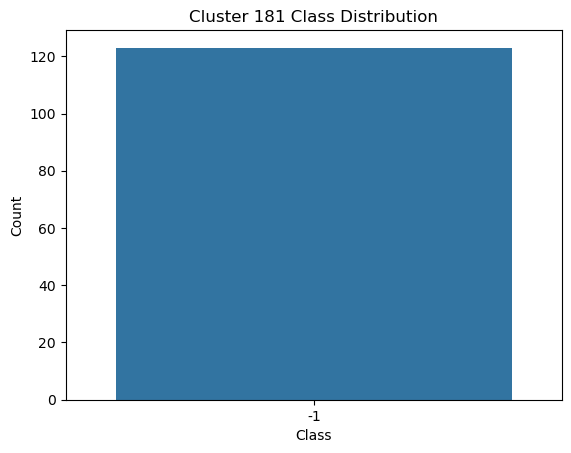

Total class 1: 0
Total class -1: 123


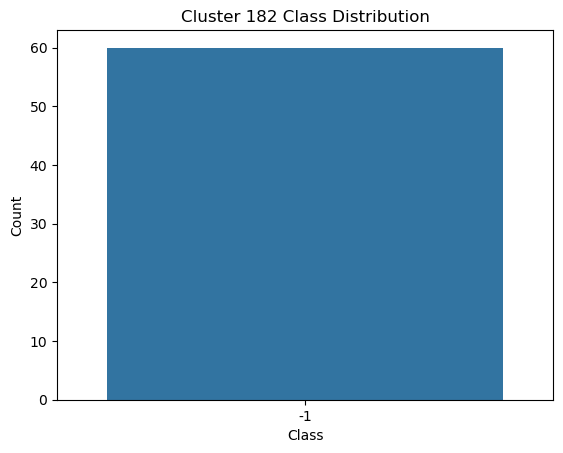

Total class 1: 0
Total class -1: 60


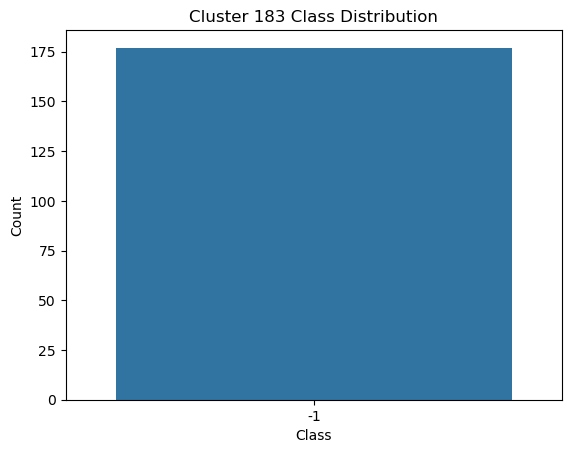

Total class 1: 0
Total class -1: 177


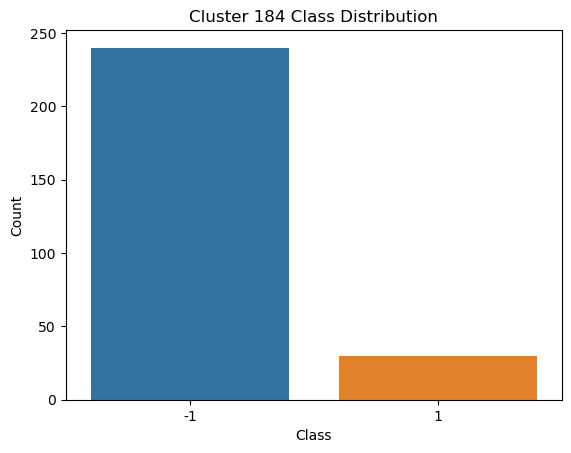

Total class 1: 30
Total class -1: 240


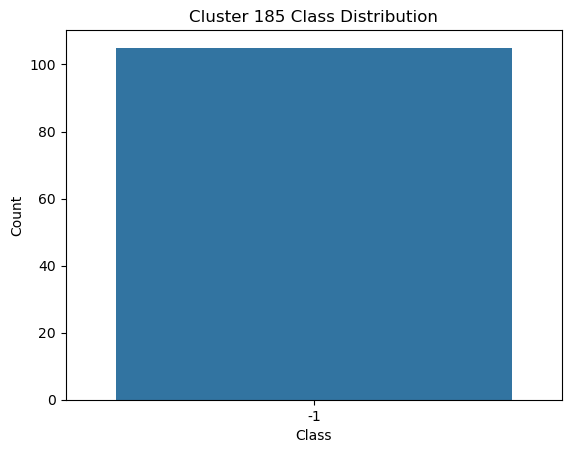

Total class 1: 0
Total class -1: 105


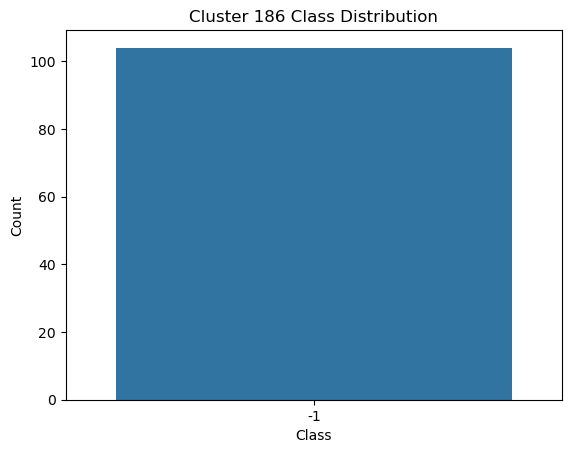

Total class 1: 0
Total class -1: 104


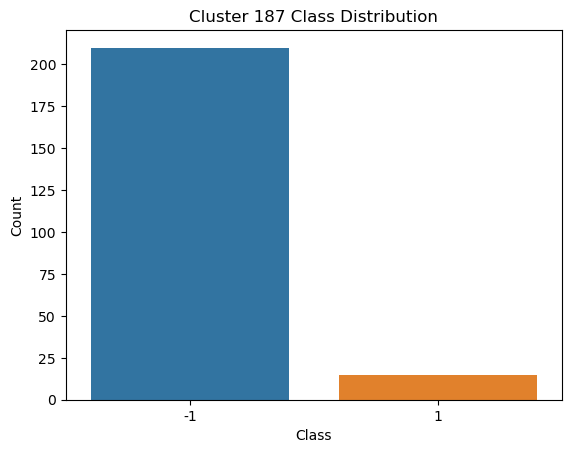

Total class 1: 15
Total class -1: 210


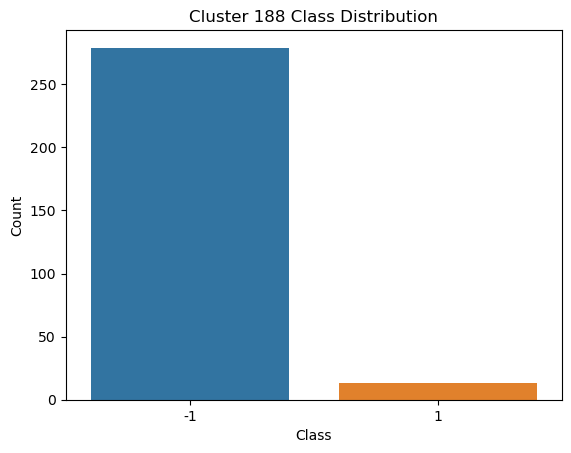

Total class 1: 13
Total class -1: 279


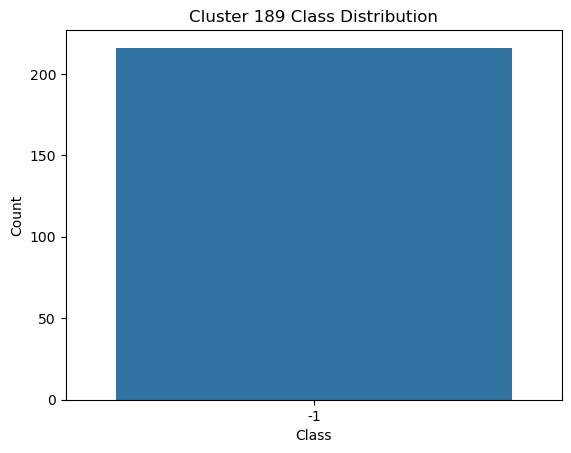

Total class 1: 0
Total class -1: 216


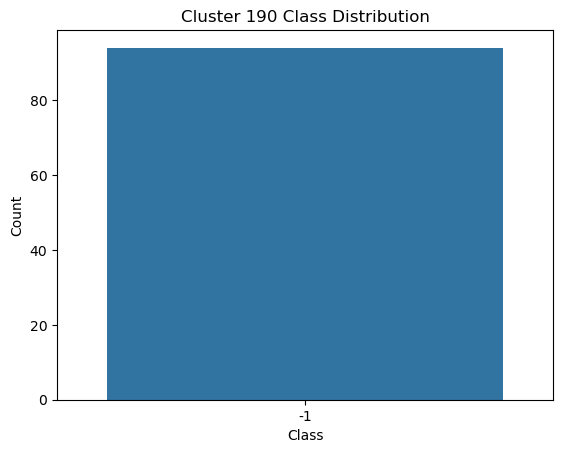

Total class 1: 0
Total class -1: 94


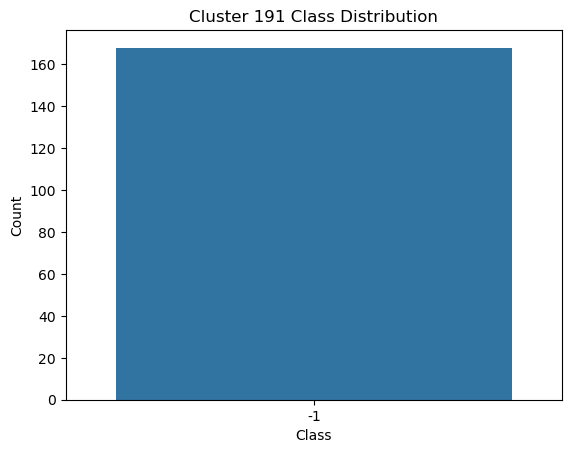

Total class 1: 0
Total class -1: 168


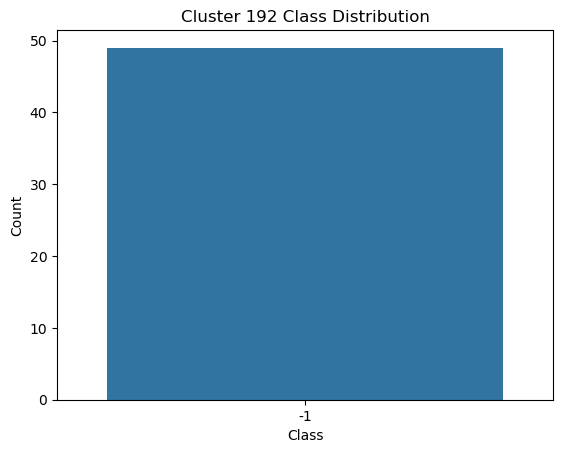

Total class 1: 0
Total class -1: 49


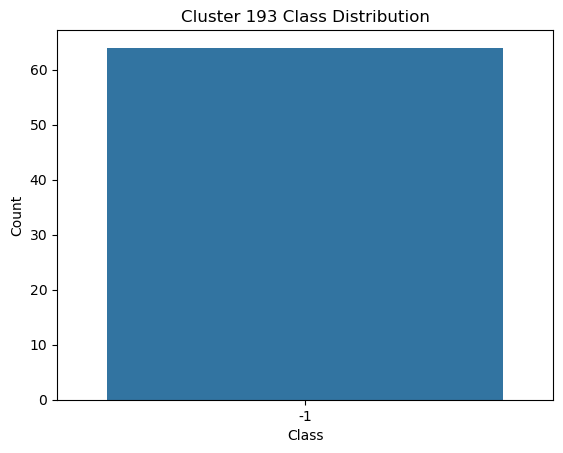

Total class 1: 0
Total class -1: 64


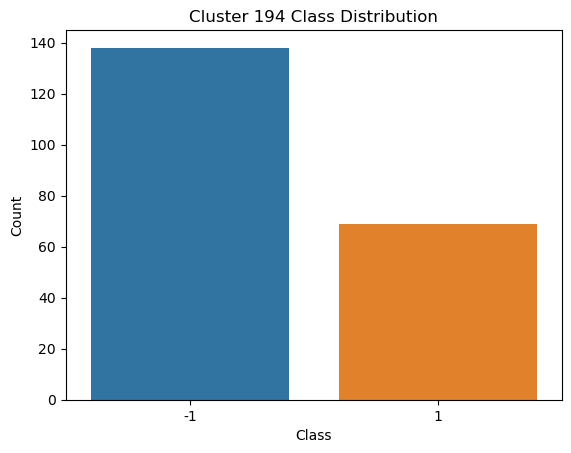

Total class 1: 69
Total class -1: 138


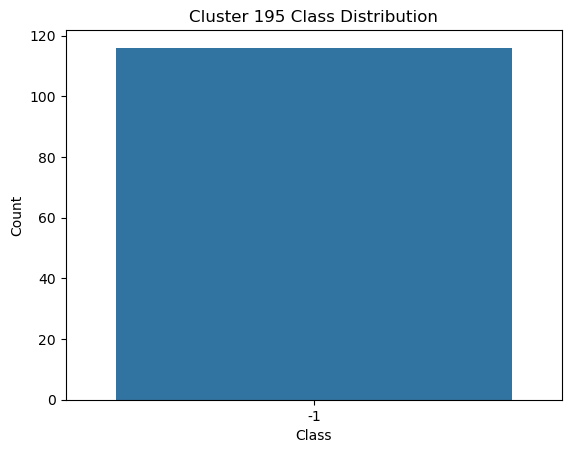

Total class 1: 0
Total class -1: 116


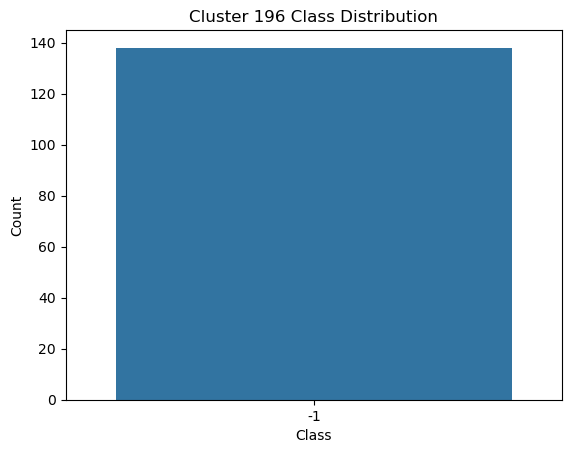

Total class 1: 0
Total class -1: 138


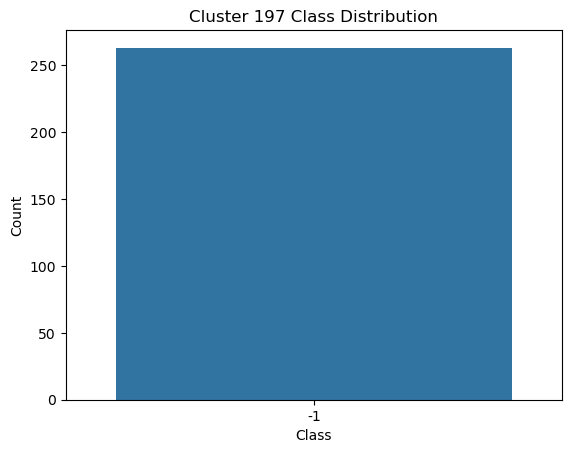

Total class 1: 0
Total class -1: 263


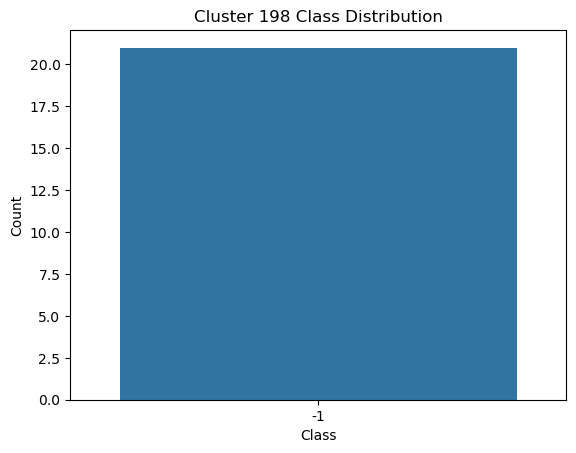

Total class 1: 0
Total class -1: 21


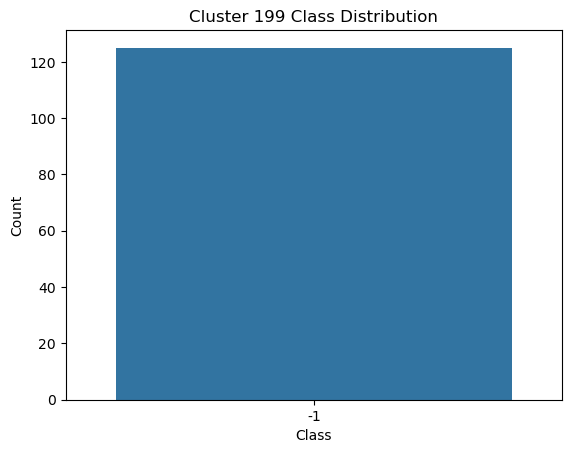

Total class 1: 0
Total class -1: 125


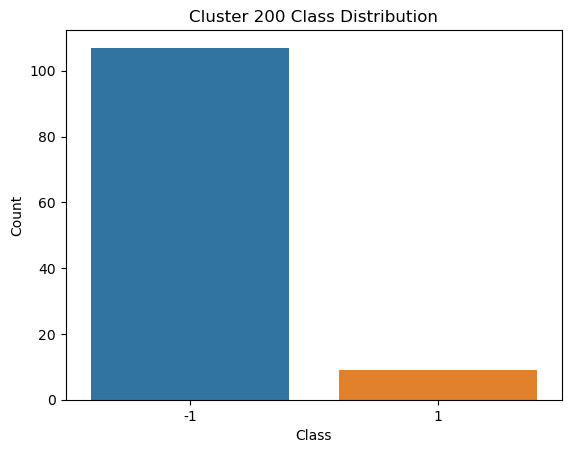

Total class 1: 9
Total class -1: 107


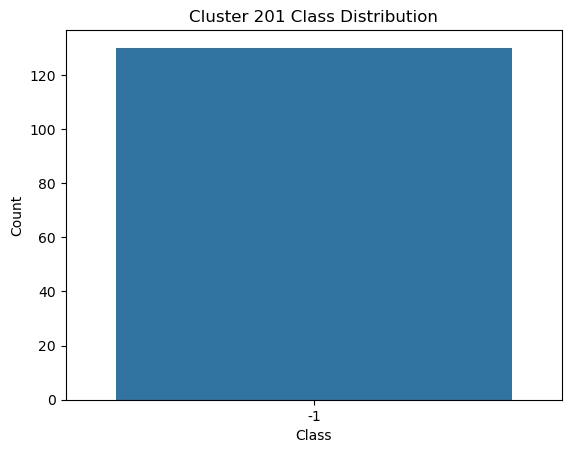

Total class 1: 0
Total class -1: 130


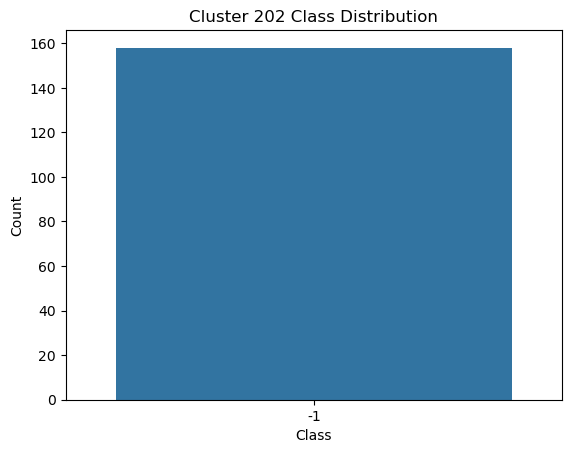

Total class 1: 0
Total class -1: 158


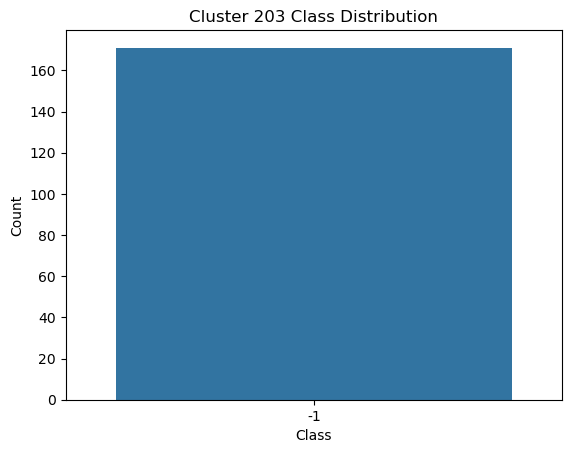

Total class 1: 0
Total class -1: 171


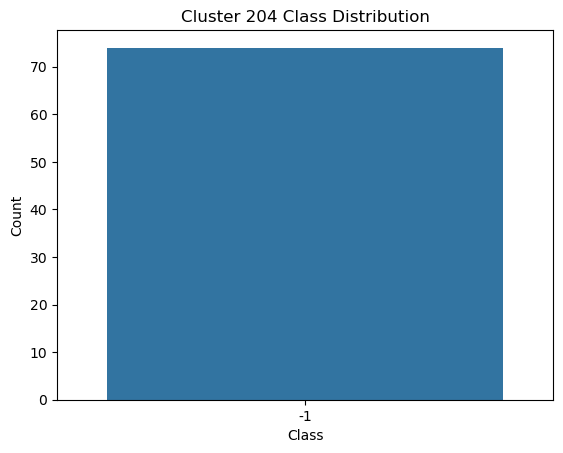

Total class 1: 0
Total class -1: 74


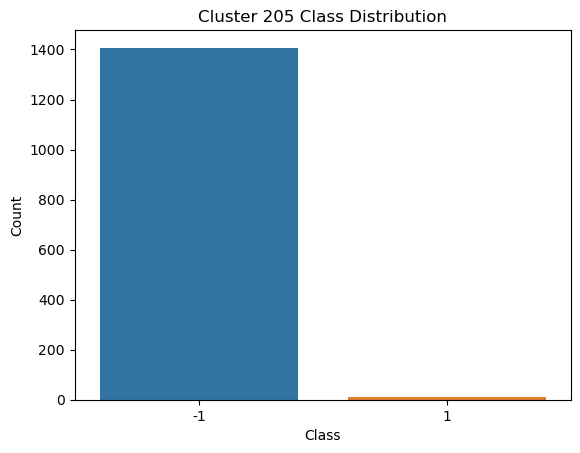

Total class 1: 11
Total class -1: 1407


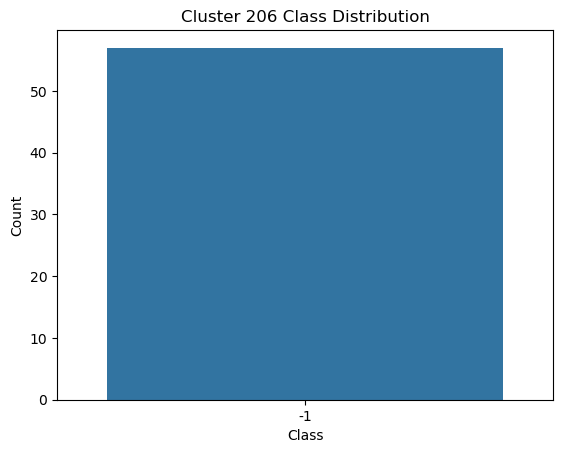

Total class 1: 0
Total class -1: 57


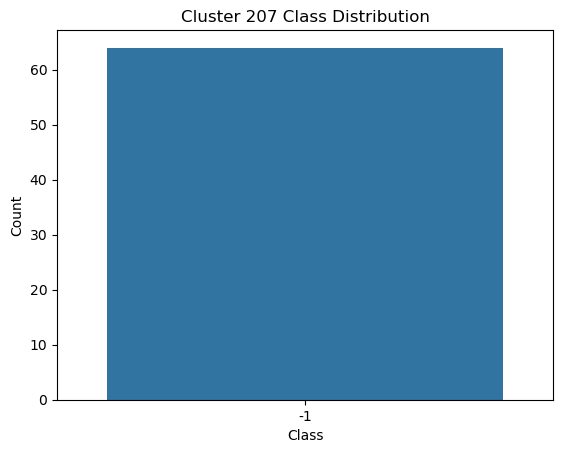

Total class 1: 0
Total class -1: 64


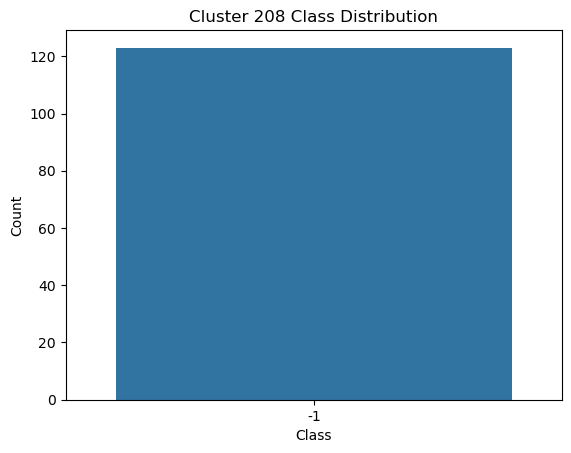

Total class 1: 0
Total class -1: 123


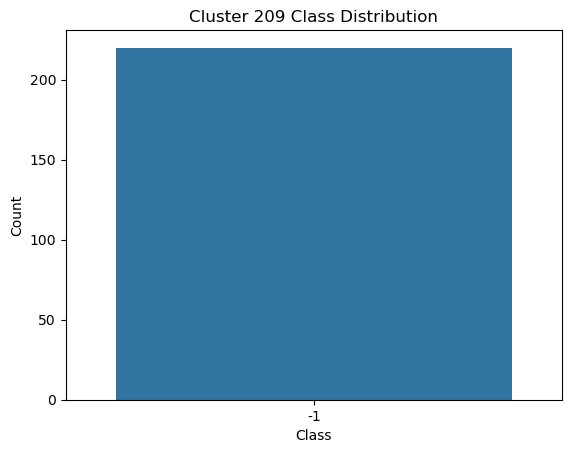

Total class 1: 0
Total class -1: 220


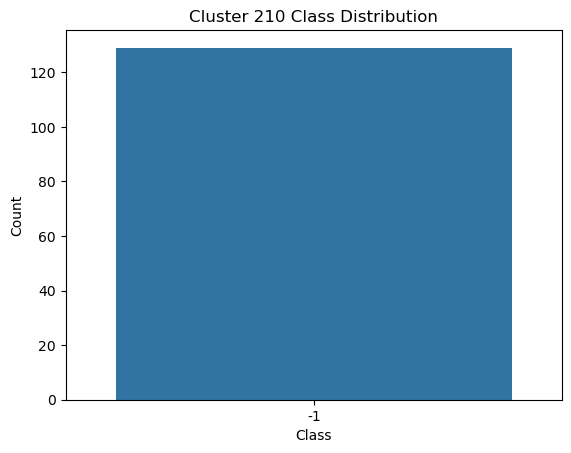

Total class 1: 0
Total class -1: 129


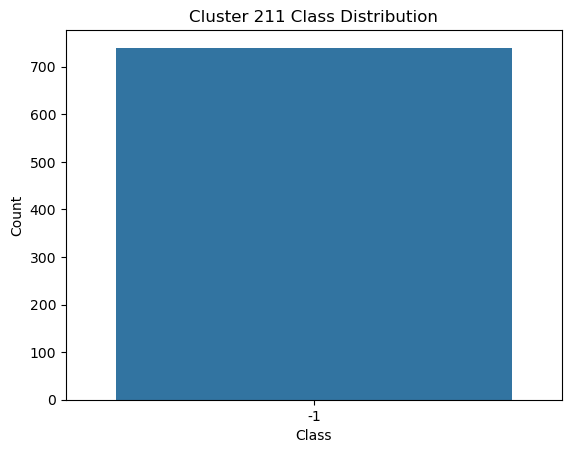

Total class 1: 0
Total class -1: 740


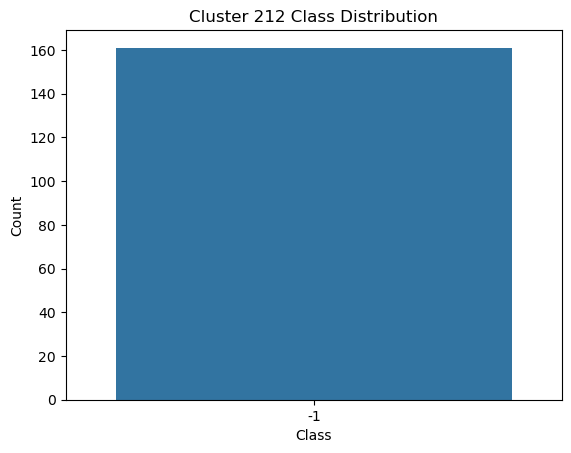

Total class 1: 0
Total class -1: 161


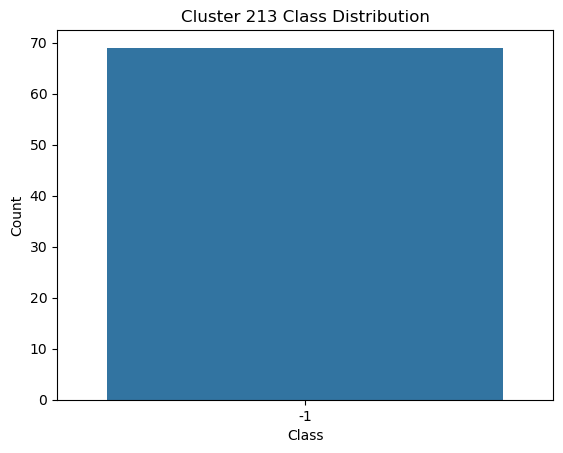

Total class 1: 0
Total class -1: 69


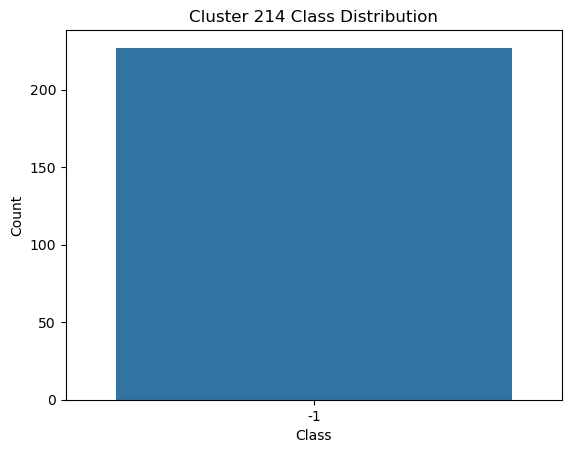

Total class 1: 0
Total class -1: 227


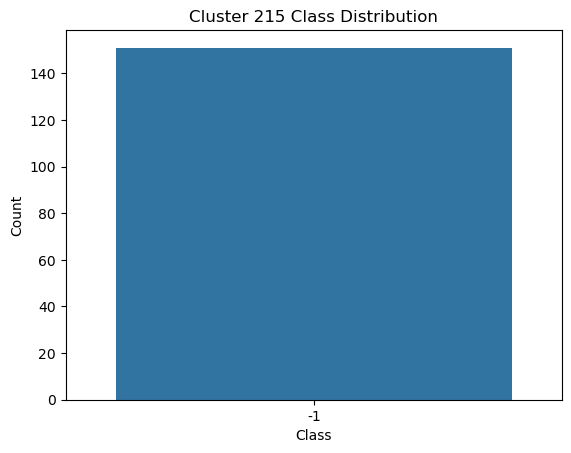

Total class 1: 0
Total class -1: 151


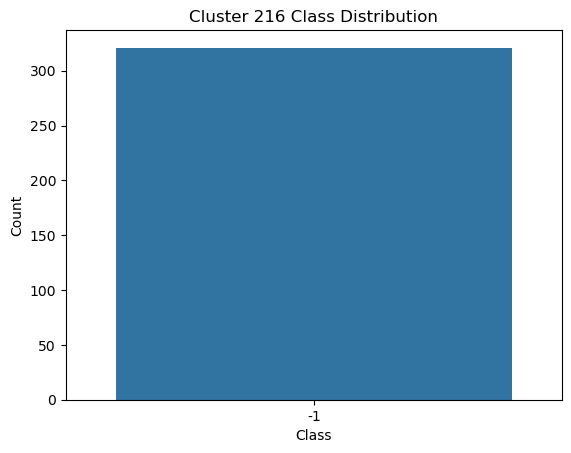

Total class 1: 0
Total class -1: 321


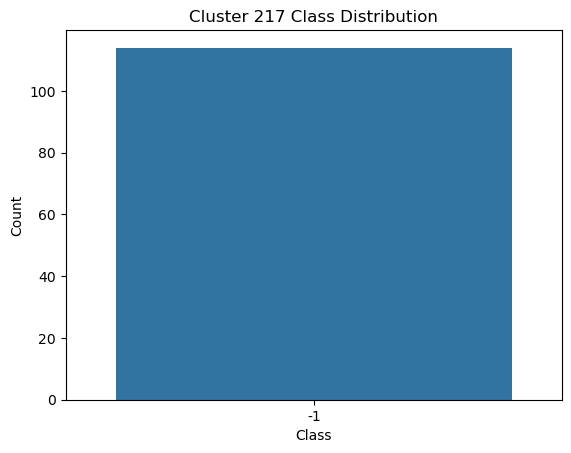

Total class 1: 0
Total class -1: 114


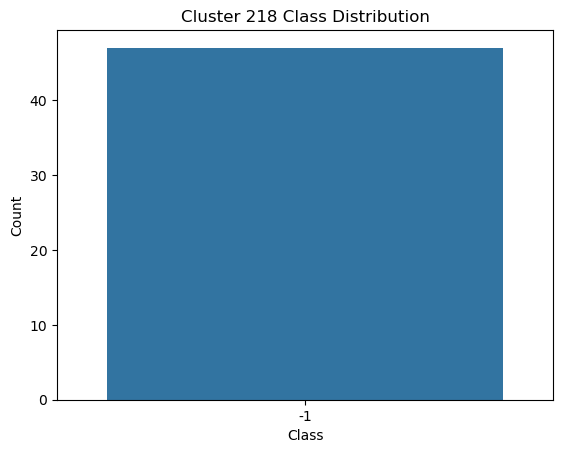

Total class 1: 0
Total class -1: 47


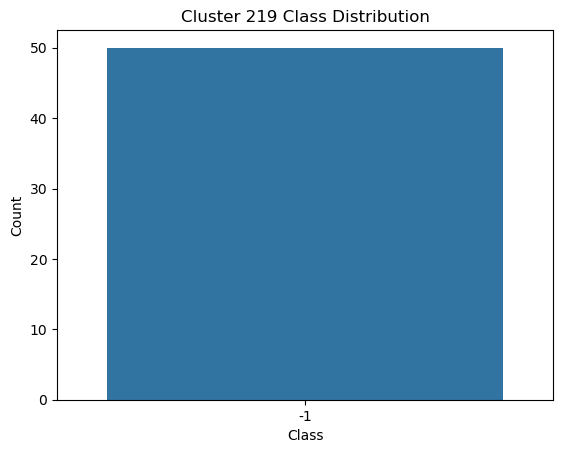

Total class 1: 0
Total class -1: 50


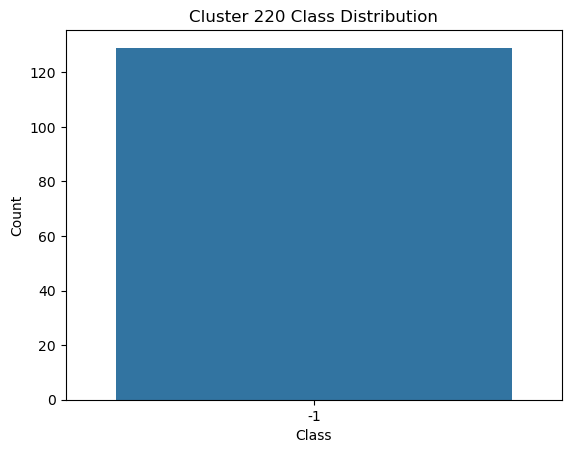

Total class 1: 0
Total class -1: 129


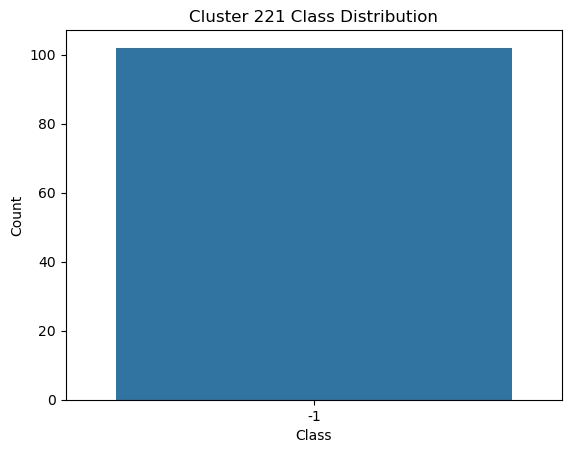

Total class 1: 0
Total class -1: 102


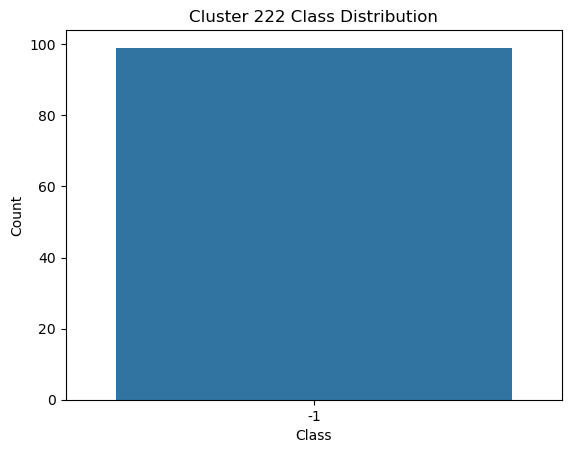

Total class 1: 0
Total class -1: 99


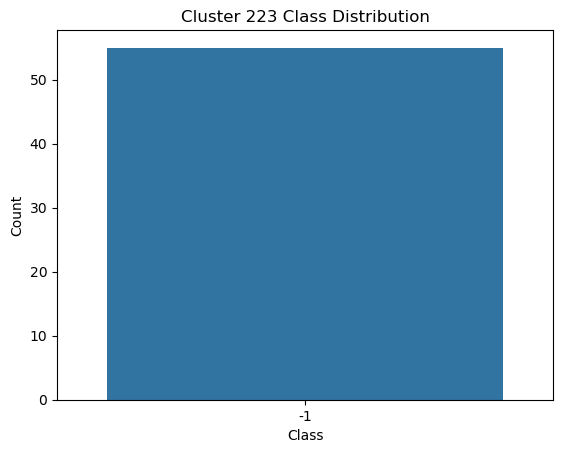

Total class 1: 0
Total class -1: 55


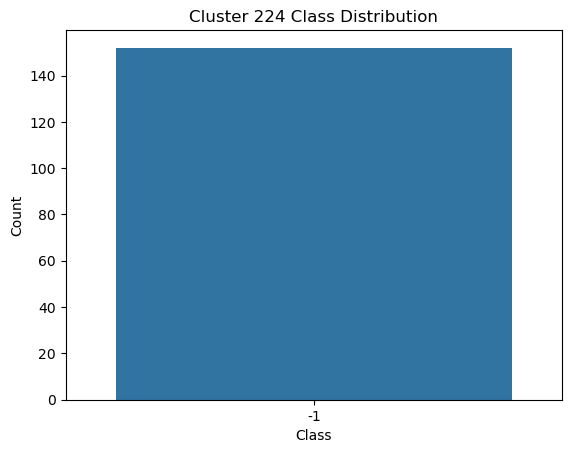

Total class 1: 0
Total class -1: 152


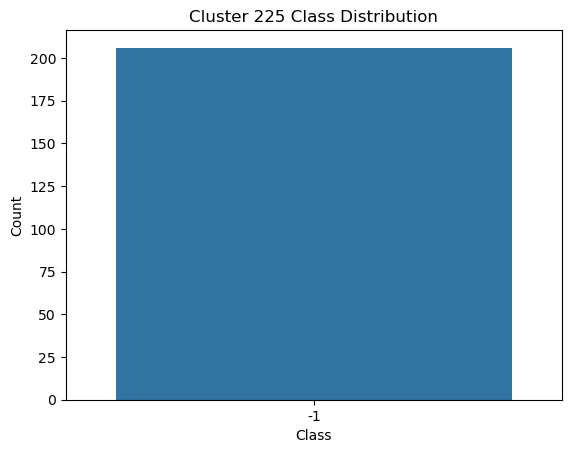

Total class 1: 0
Total class -1: 206


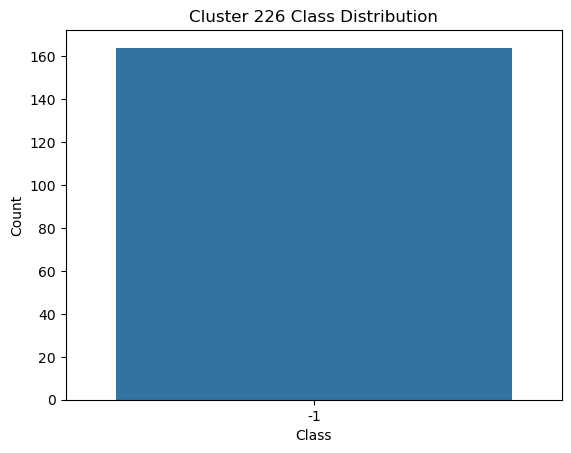

Total class 1: 0
Total class -1: 164


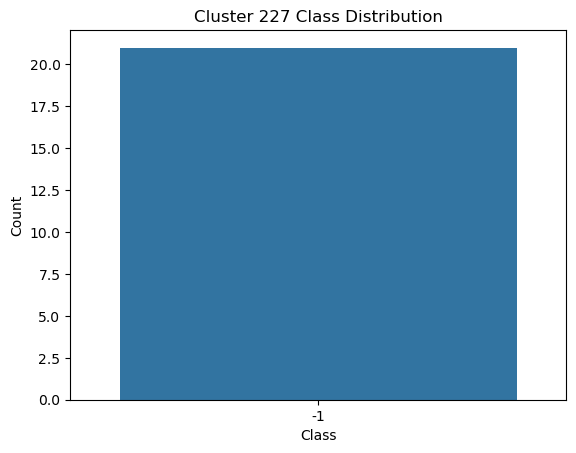

Total class 1: 0
Total class -1: 21


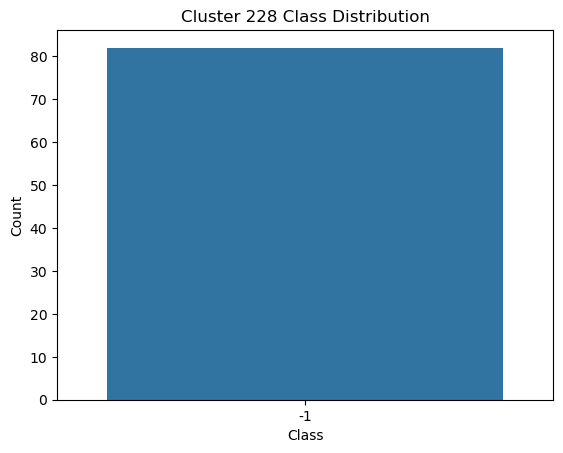

Total class 1: 0
Total class -1: 82


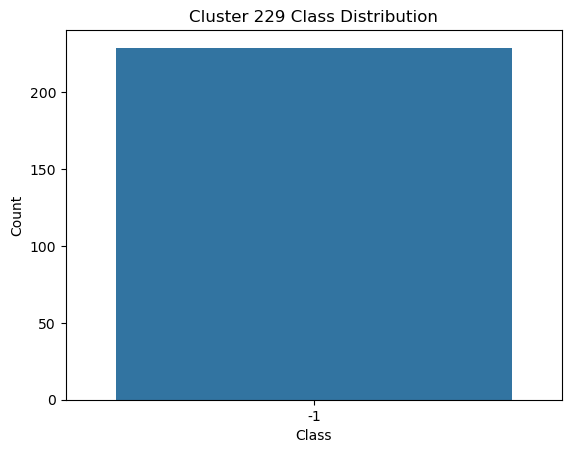

Total class 1: 0
Total class -1: 229


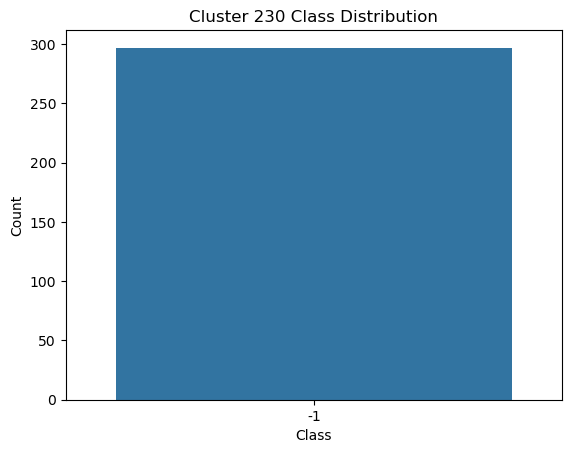

Total class 1: 0
Total class -1: 297


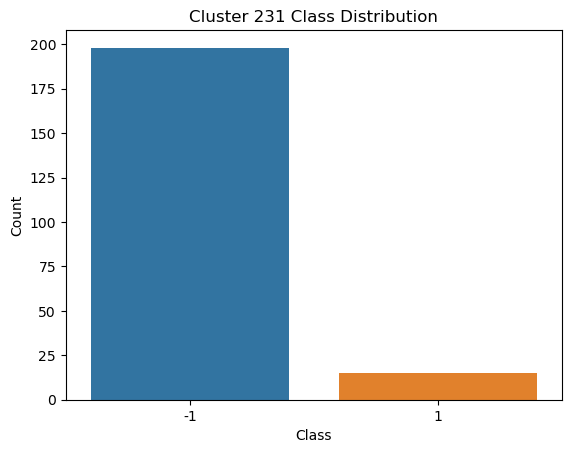

Total class 1: 15
Total class -1: 198


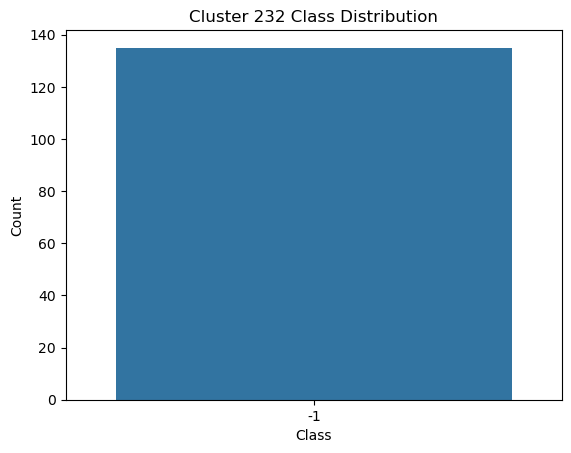

Total class 1: 0
Total class -1: 135


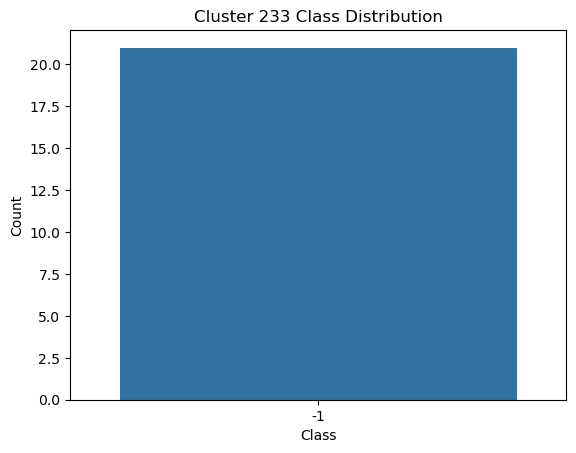

Total class 1: 0
Total class -1: 21


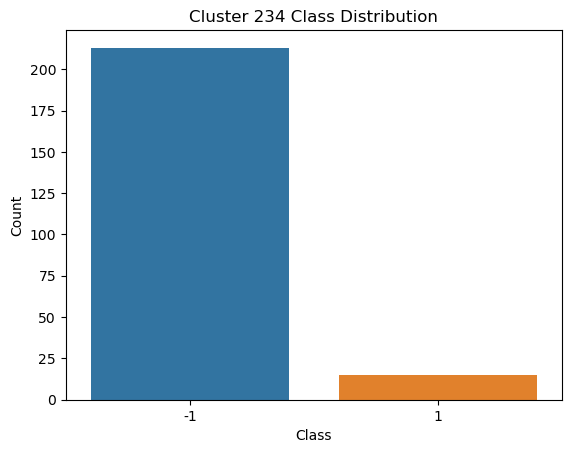

Total class 1: 15
Total class -1: 213


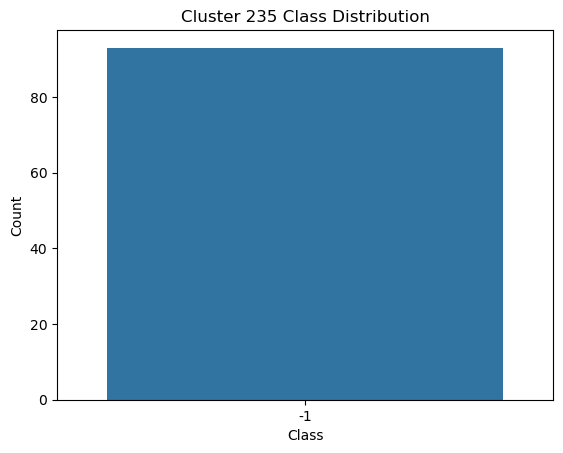

Total class 1: 0
Total class -1: 93


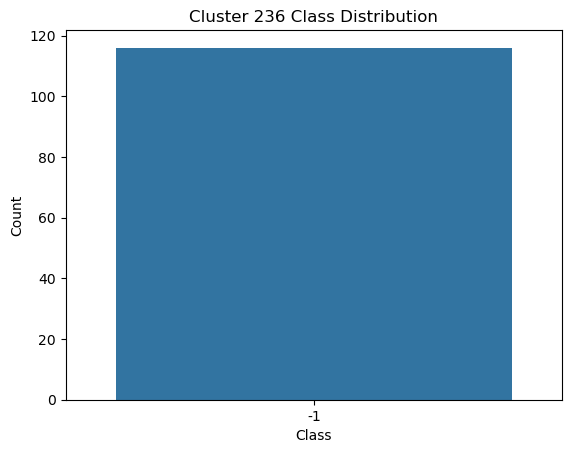

Total class 1: 0
Total class -1: 116


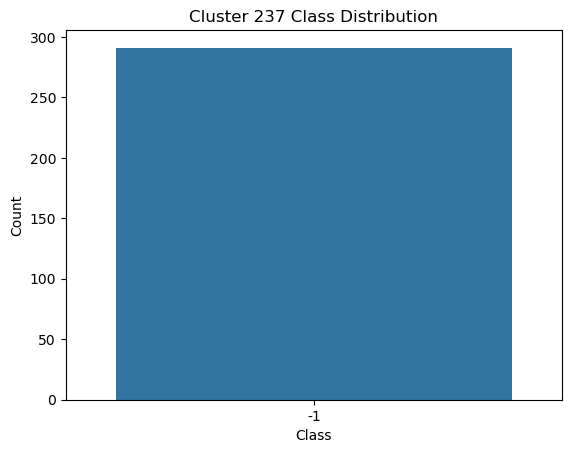

Total class 1: 0
Total class -1: 291


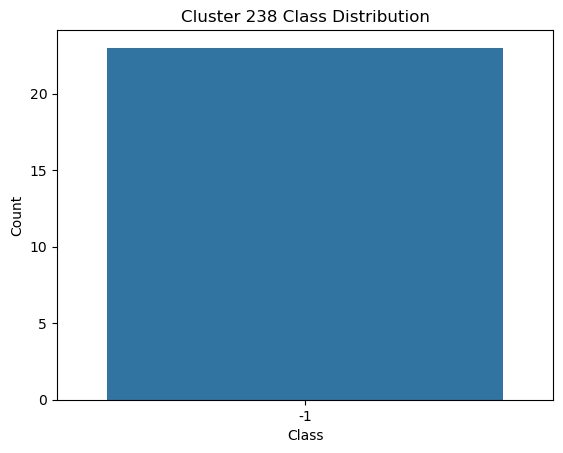

Total class 1: 0
Total class -1: 23


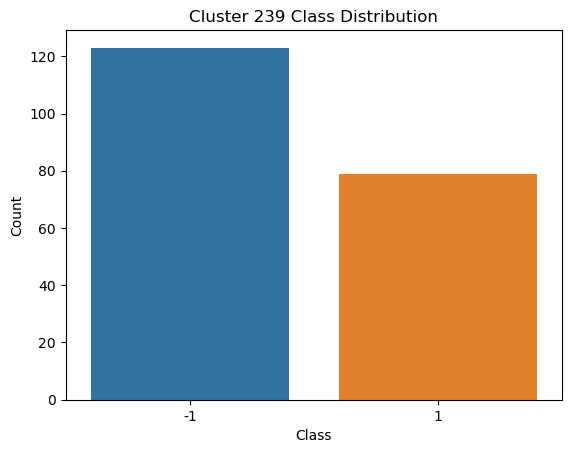

Total class 1: 79
Total class -1: 123


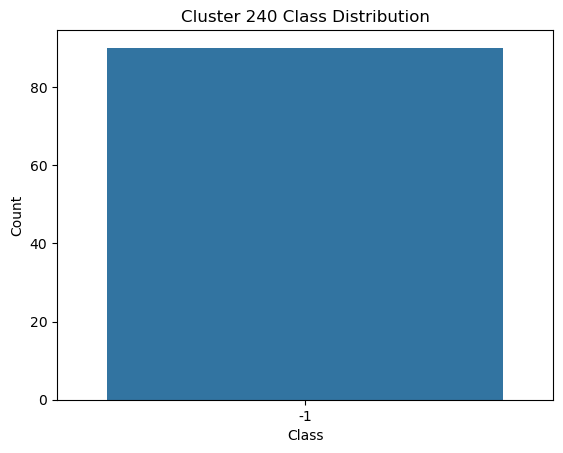

Total class 1: 0
Total class -1: 90


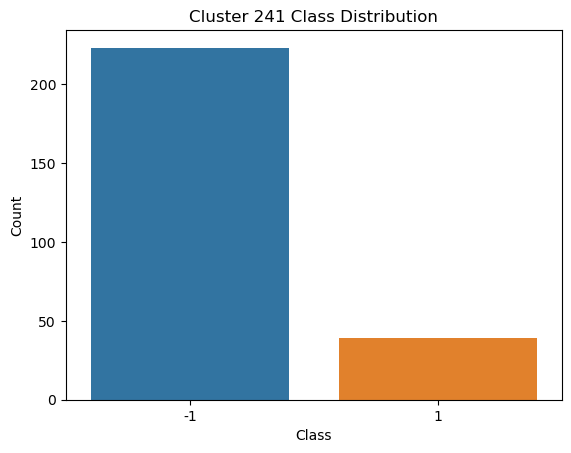

Total class 1: 39
Total class -1: 223


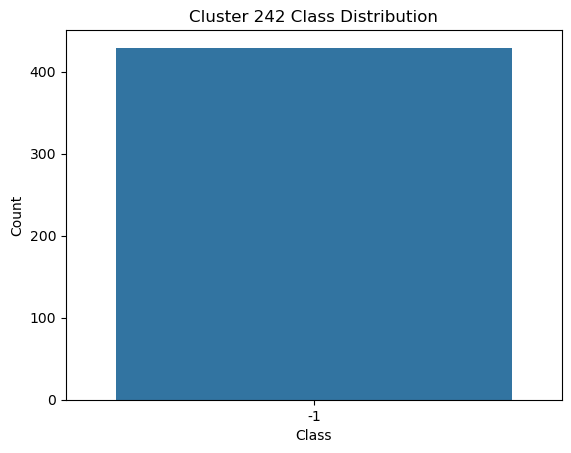

Total class 1: 0
Total class -1: 429


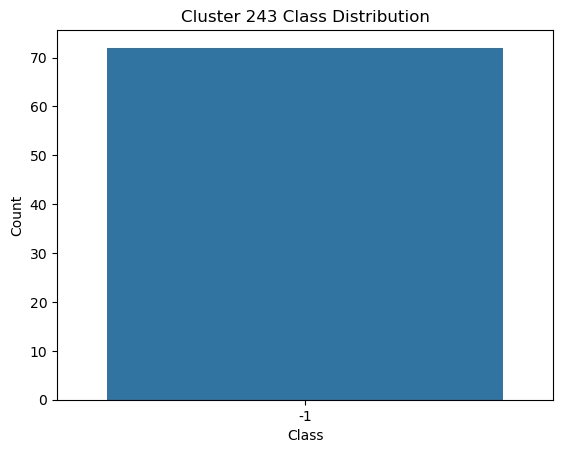

Total class 1: 0
Total class -1: 72


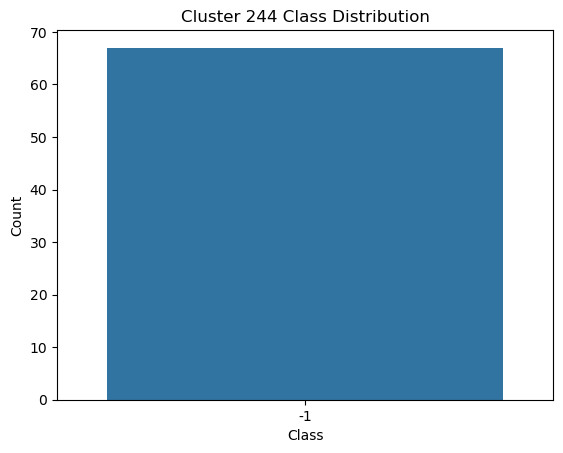

Total class 1: 0
Total class -1: 67


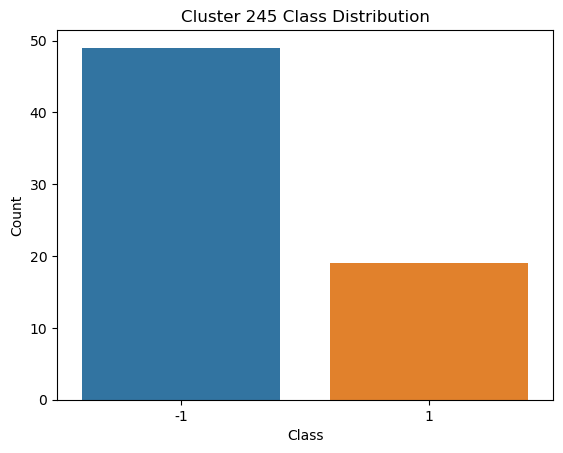

Total class 1: 19
Total class -1: 49


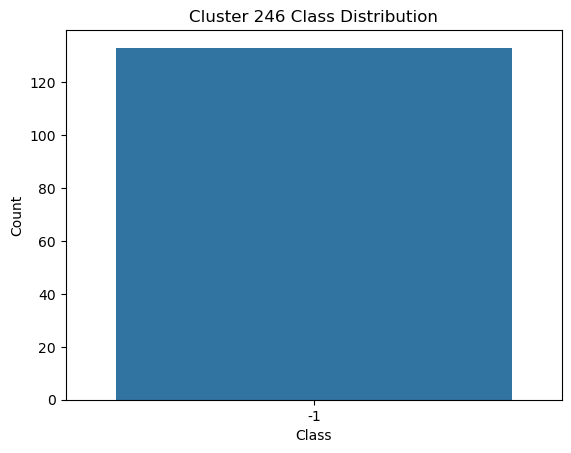

Total class 1: 0
Total class -1: 133


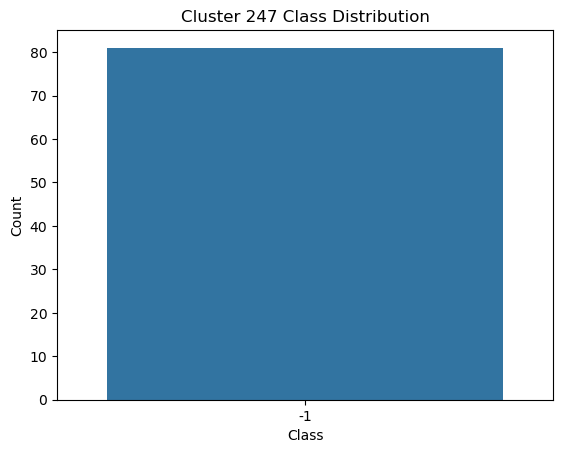

Total class 1: 0
Total class -1: 81


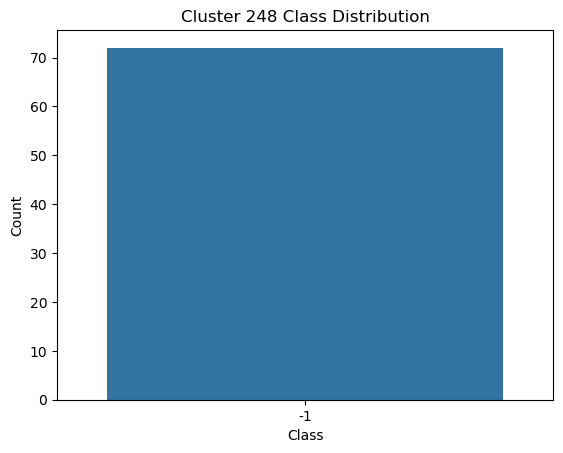

Total class 1: 0
Total class -1: 72


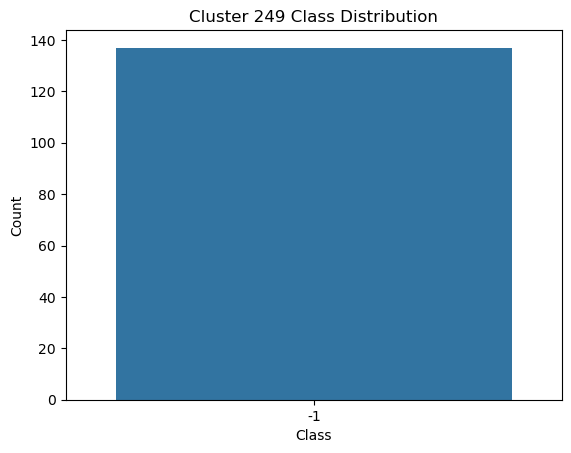

Total class 1: 0
Total class -1: 137


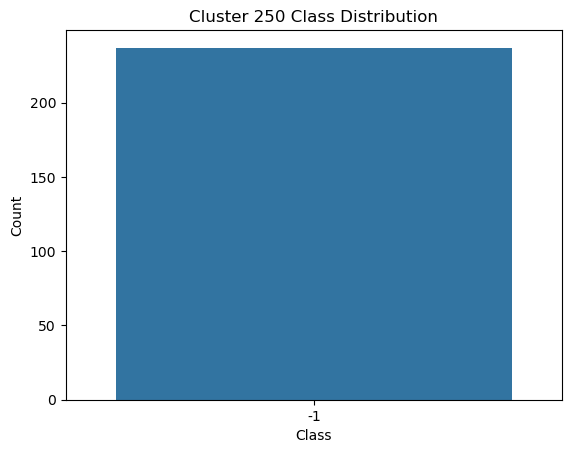

Total class 1: 0
Total class -1: 237


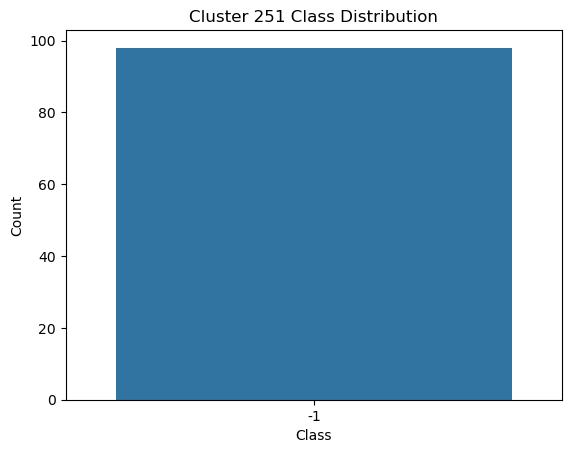

Total class 1: 0
Total class -1: 98


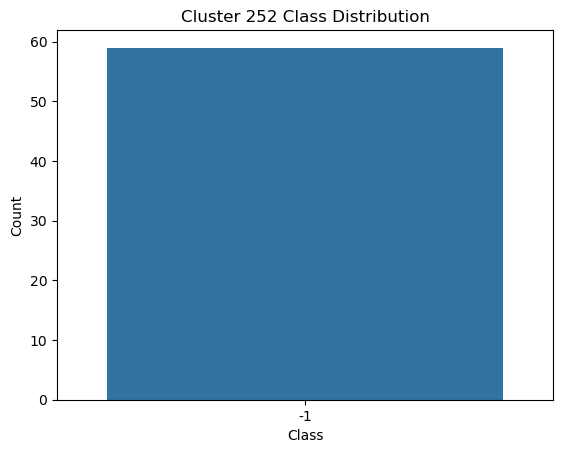

Total class 1: 0
Total class -1: 59


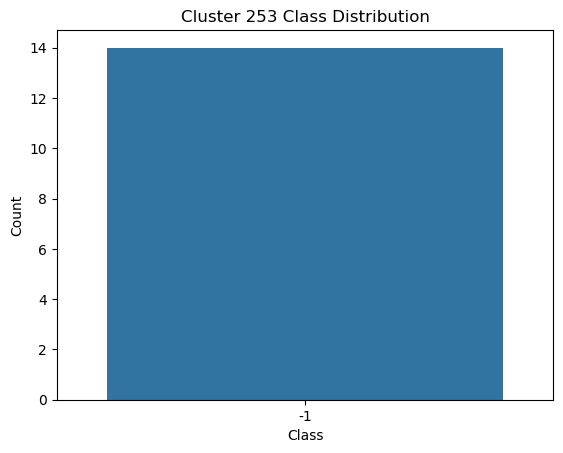

Total class 1: 0
Total class -1: 14


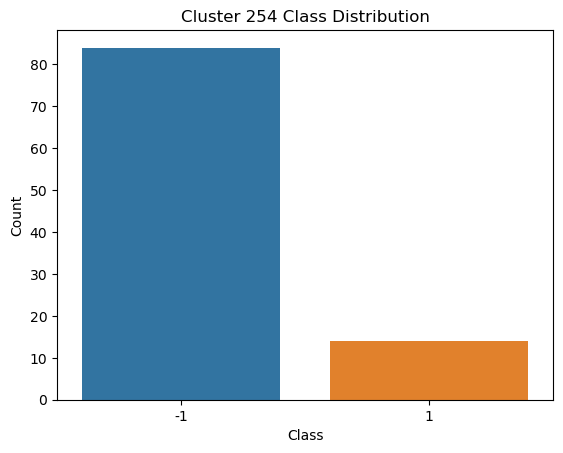

Total class 1: 14
Total class -1: 84


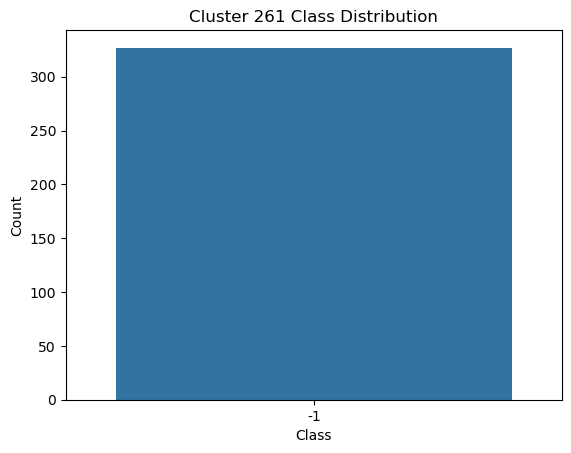

Total class 1: 0
Total class -1: 327


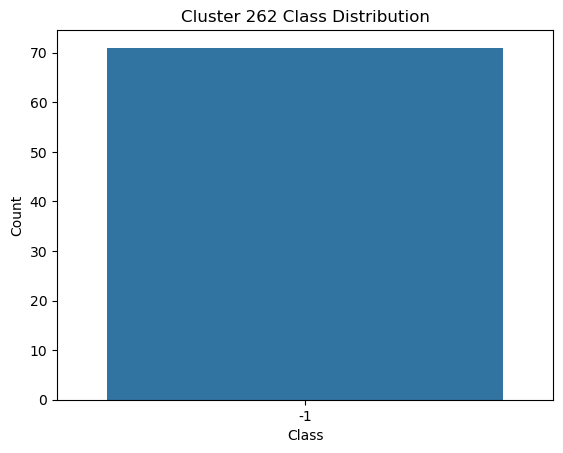

Total class 1: 0
Total class -1: 71


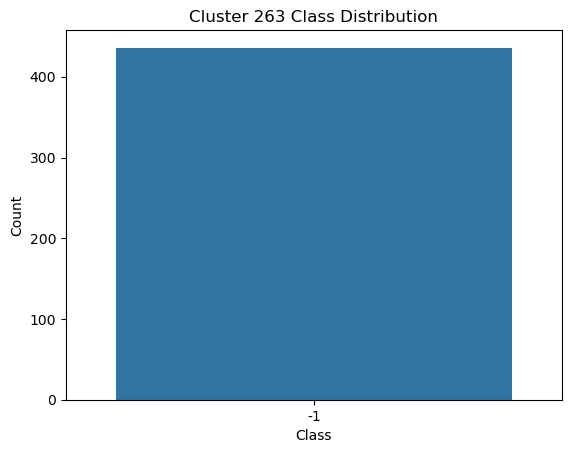

Total class 1: 0
Total class -1: 436


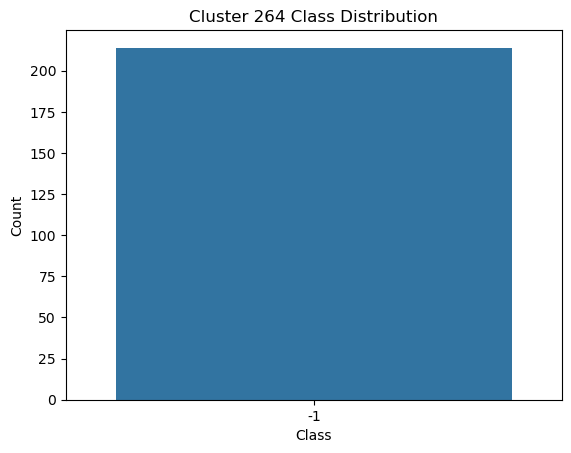

Total class 1: 0
Total class -1: 214


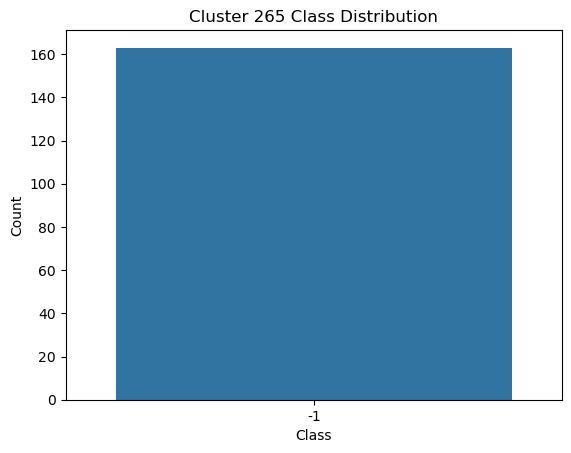

Total class 1: 0
Total class -1: 163


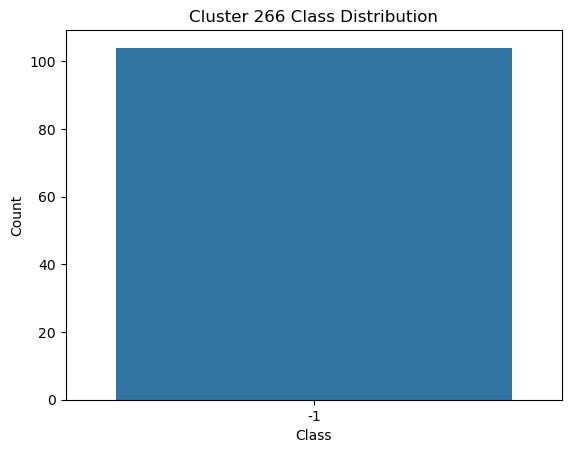

Total class 1: 0
Total class -1: 104


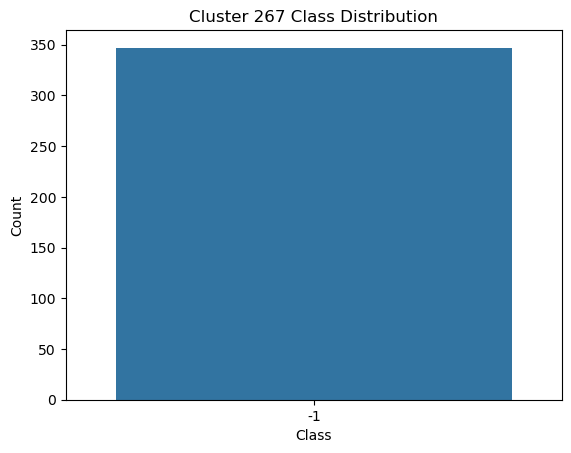

Total class 1: 0
Total class -1: 347


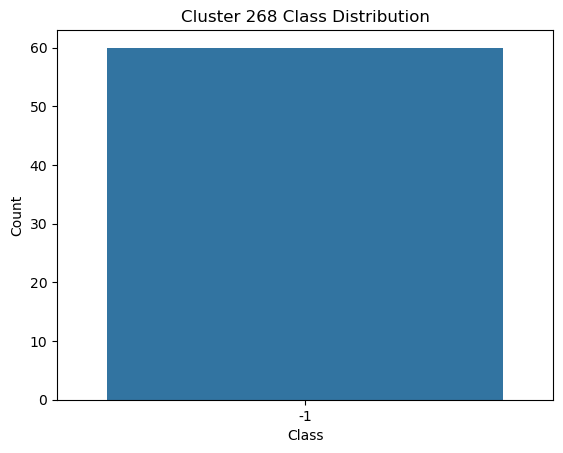

Total class 1: 0
Total class -1: 60


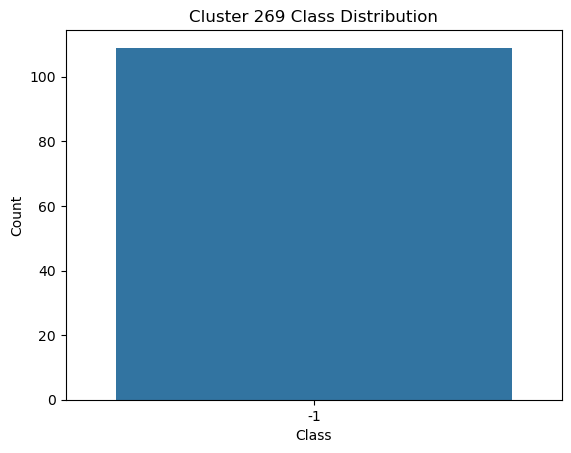

Total class 1: 0
Total class -1: 109


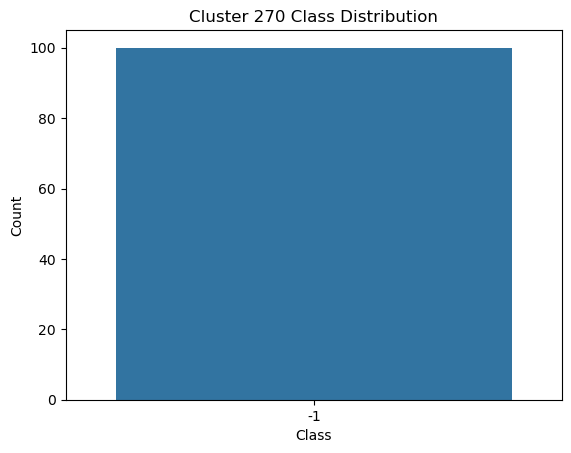

Total class 1: 0
Total class -1: 100


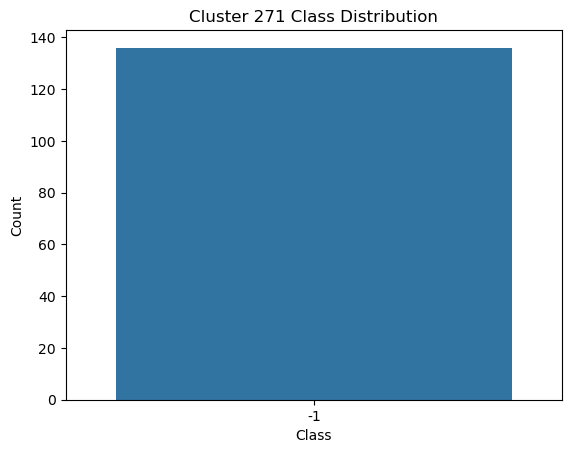

Total class 1: 0
Total class -1: 136


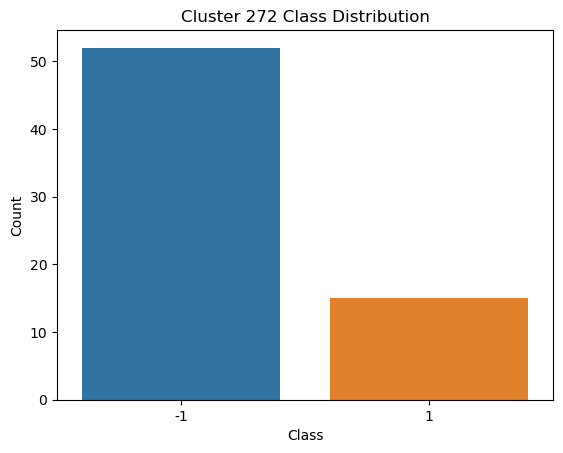

Total class 1: 15
Total class -1: 52


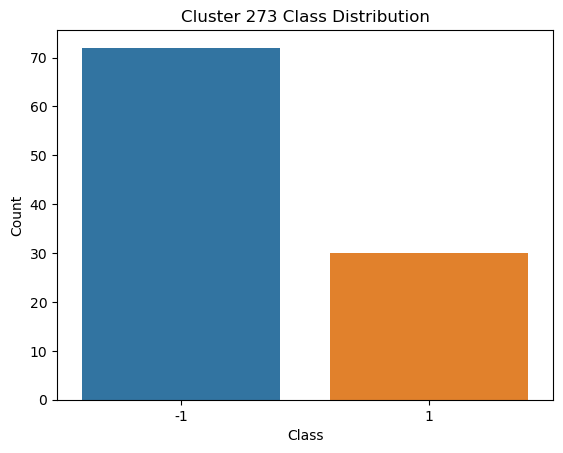

Total class 1: 30
Total class -1: 72


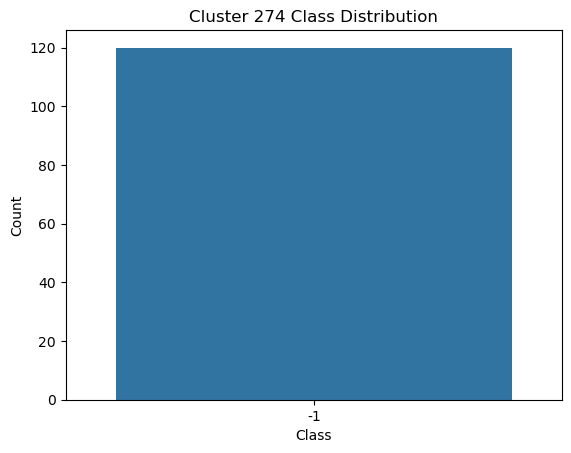

Total class 1: 0
Total class -1: 120


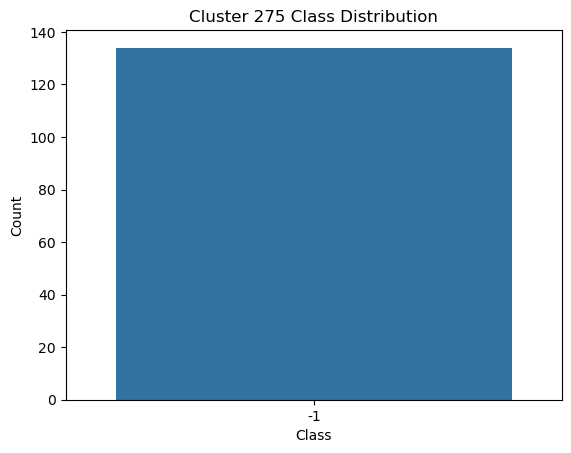

Total class 1: 0
Total class -1: 134


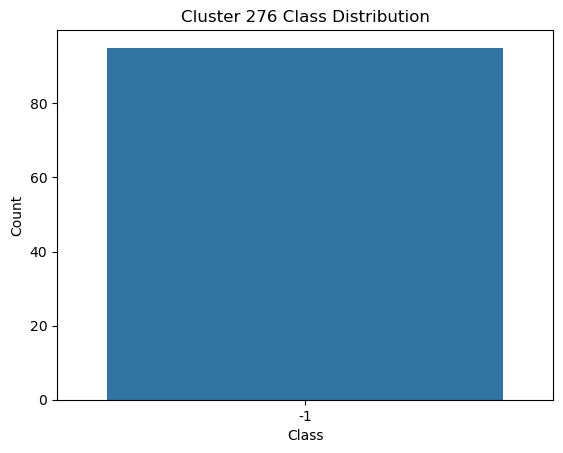

Total class 1: 0
Total class -1: 95


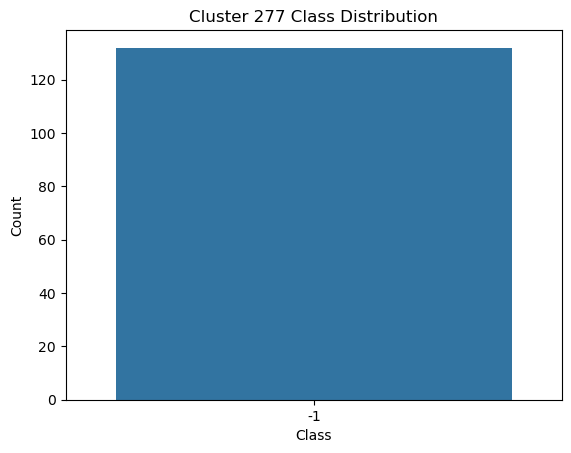

Total class 1: 0
Total class -1: 132


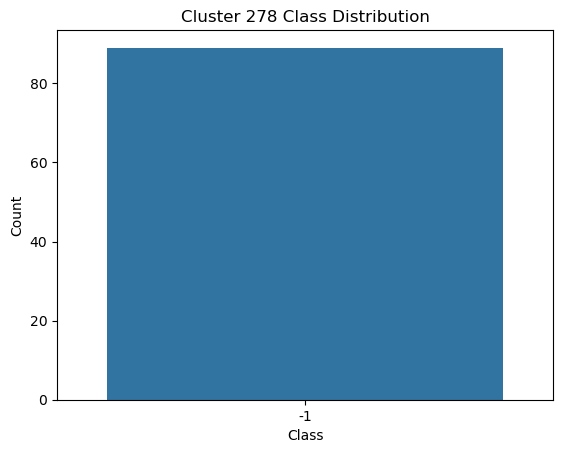

Total class 1: 0
Total class -1: 89


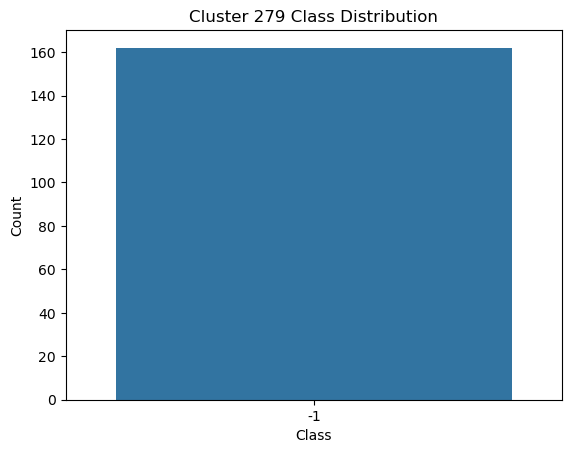

Total class 1: 0
Total class -1: 162


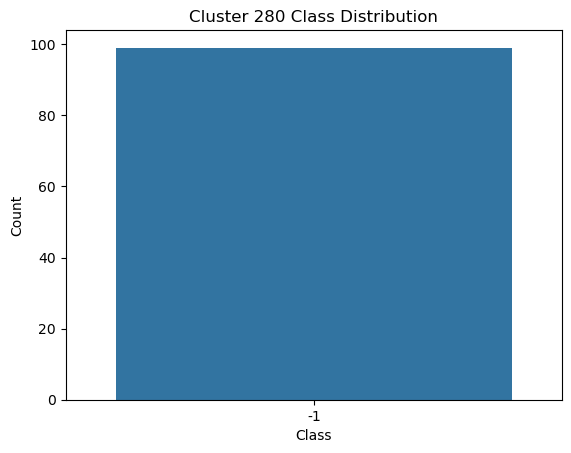

Total class 1: 0
Total class -1: 99


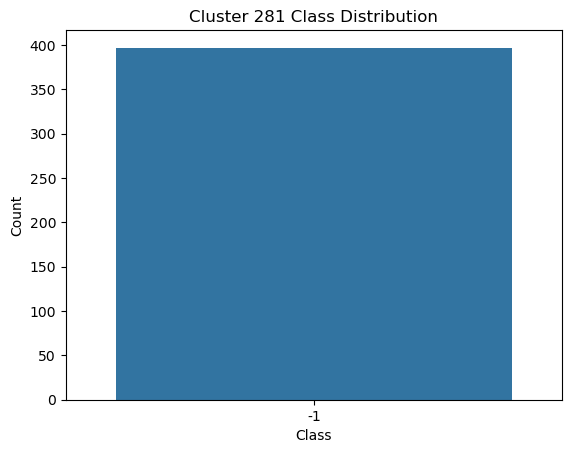

Total class 1: 0
Total class -1: 397


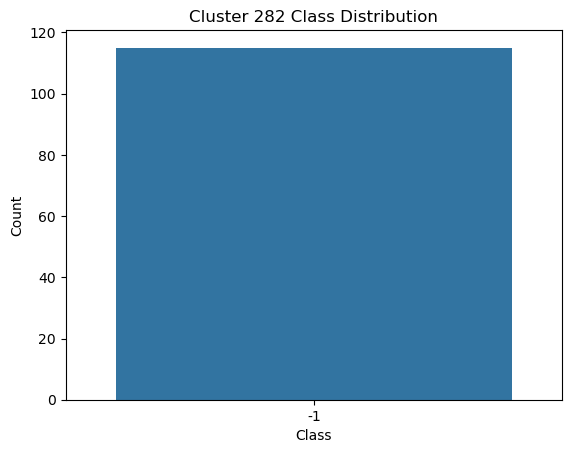

Total class 1: 0
Total class -1: 115


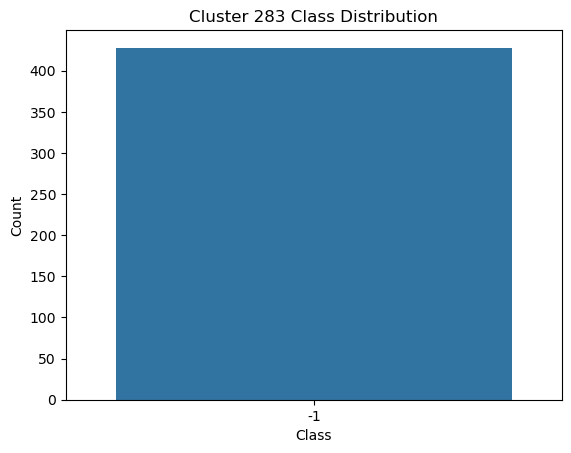

Total class 1: 0
Total class -1: 428


In [418]:
clusters = df_feat['Info_cluster'].unique()

for c in clusters:
    df_cluster = pd.DataFrame()
    df_cluster = df_feat[df_feat['Info_cluster'] == c]
    sns.countplot(data=df_cluster, x='Class')
    plt.title(f'Cluster {c} Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
    print('Total class 1:', df_cluster.Class.value_counts().get(1, 0))
    print('Total class -1:', df_cluster.Class.value_counts().get(-1, 0))

### EDA findings

The dataset consists of 1281 (1291-10) feature variables and 49606 entries.

All feaature variables are of __float64__ datatypes, meaning values are indeed numerical as expected.

Upon inspecting the class distribution, we can see a significant class imbalance.
 -  Total class __1__: 809.
 -  Total class __-1__: 48797.
 -  Roughly __1:60__.

By inspecting the class distribution with respect to __'Info_cluster'__, we can see that most clusters contain only __-1__ classes, while others contain both __-1__ and __1__ classes.  

Upon checking for missing values, we see that __'feat_esm1b_148'__ is missing in almost all entries (44655 entries). In further investigation, it appears that there is no clear correlation between the __'Class'__ label and the missing __'feat_esm1b_148'__ values.

After disregarding the __'feat_esm1b_148'__ column, we see that the count of missing values for every feature appears to be rather consistent. After further investigation, we can see that all entries with missing values (88 exactly), are all missing 1215 features exactly with 4 missing 1216 values.

Upon inspecting the feature ranges, we see that the main body of ranges lie between 1.5 to 3. Where outliers are clearly visible, this indicates feature scaling may be beneficial. 

No duplicated entries found.


## Data Pre-processing

### Addressing missing values

In [419]:
if 'feat_esm1b_148' in df_feat:
    df_feat = df_feat.drop(columns=['feat_esm1b_148'])
df_feat.shape

(49606, 1282)

In [420]:
df_feat = df_feat.dropna()
df_feat.shape

(49518, 1282)

### Train-Test-Split

In [518]:
df_train, df_test = split_per_info_cluster(df_feat)

In [519]:
if 'Info_cluster' in df_train:
    df_train = df_train.drop(columns=['Info_cluster'])
if 'Info_cluster' in df_test:
    df_test = df_test.drop(columns=['Info_cluster'])

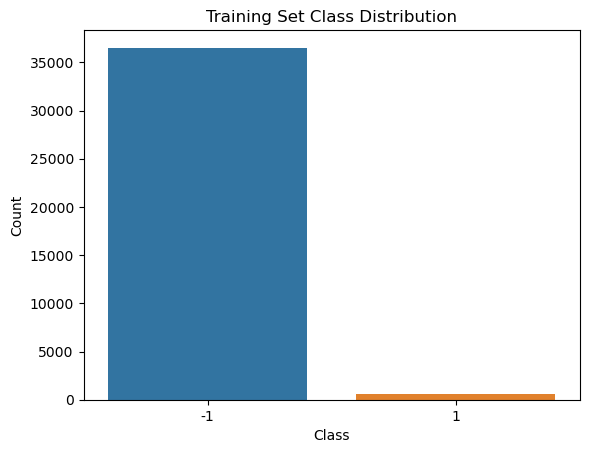

Total class 1: 567
Total class -1: 36514


In [520]:
sns.countplot(data=df_train, x='Class')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print('Total class 1:', df_train.Class.value_counts()[1])
print('Total class -1:', df_train.Class.value_counts()[-1])

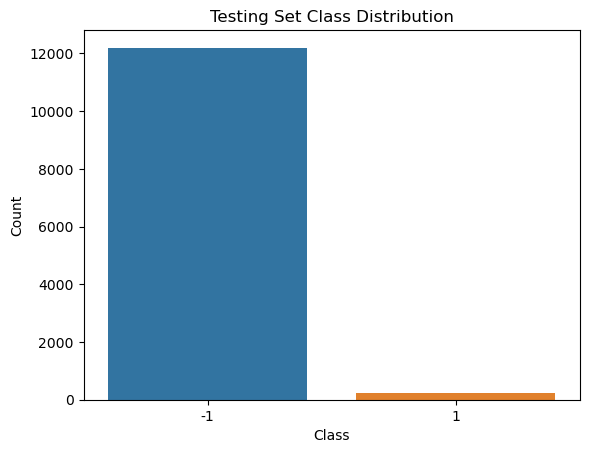

Total class 1: 241
Total class -1: 12196


In [521]:
sns.countplot(data=df_test, x='Class')
plt.title('Testing Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print('Total class 1:', df_test.Class.value_counts()[1])
print('Total class -1:', df_test.Class.value_counts()[-1])

### Outliers detection

In [522]:
df_train = df_train.sort_index()

isof = IsolationForest()
isof.fit(df_train.copy().drop(columns=['Class']))
os = isof.predict(df_train.copy().drop(columns=['Class']))

In [523]:
unique, counts = np.unique(os, return_counts=True)
print(f'Outliers: {counts[0]}')
print(f'Inliers : {counts[1]}')

Outliers: 1708
Inliers : 35373


In [524]:
df_train.copy().drop(columns=['Class']).skew().mean()

-0.008341851715623566

In [526]:
df_train['os'] = os

df_outliers = df_train[df_train['os'] == 1].copy().drop(columns=['os'])
os_class = df_outliers['Class']
df_outliers = df_outliers.drop(columns='Class')

lq = df_outliers.quantile(0.10)
uq = df_outliers.quantile(0.90)
df_outliers = df_outliers.clip(lower=lq, upper=uq, axis=1)

df_outliers['Class'] = os_class
df_train = df_train.drop(columns='os')

df_train.update(df_outliers)

In [528]:
df_train.copy().drop(columns=['Class']).skew().mean()

-0.007519739808310048

### Data scaling

In [549]:
def scale_data(data):
    data = data.drop(columns=['Class'])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(data)
    return scaled_features

In [560]:
scaled_features = scale_data(df_train)

df_train_scaled = df_train.copy().drop(columns='Class')
df_train_scaled[df_train_scaled.columns] = scaled_features
  
df_train_scaled['Class'] = df_train['Class'].copy()

df_train = df_train_scaled

C:\Users\david\AppData\Local\Temp\ipykernel_104672\4140794597.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train_scaled['Class'] = df_train['Class'].copy()


In [561]:
df_train

feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
0          0.545522      0.402177      0.538301      0.524075      0.667785   
1          0.540297      0.416998      0.509236      0.526619      0.680582   
2          0.500814      0.570806      0.572081      0.611310      0.680582   
3          0.545522      0.476341      0.559260      0.648583      0.680582   
4          0.455840      0.495210      0.499132      0.681535      0.680582   
...             ...           ...           ...           ...           ...   
49601      0.448699      0.598546      0.574175      0.681535      0.423993   
49602      0.472305      0.497355      0.616023      0.589323      0.659279   
49603      0.391728      0.528318      0.524237      0.604323      0.601214   
49604      0.414187      0.536657      0.612180      0.635984      0.423993   
49605      0.456526      0.380707      0.684948      0.658080      0.570775   

       feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  \
0          0.610255      0.569636      0.316577      0.521686      0.655063   
1          0.528767      0.569636      0.352979      0.524991      0.628704   
2          0.507347      0.569636      0.330992      0.673967      0.655063   
3          0.482253      0.569636      0.437118      0.521686      0.655063   
4          0.481687      0.569636      0.303840      0.584007      0.533125   
...             ...           ...           ...           ...           ...   
49601      0.580062      0.719407      0.434275      0.643583      0.627899   
49602      0.544349      0.756180      0.271886      0.723214      0.448960   
49603      0.586215      0.723791      0.290067      0.608408      0.530101   
49604      0.657867      0.684754      0.264918      0.601969      0.550621   
49605      0.523556      0.692153      0.287138      0.613028      0.397943   

       ...  feat_esm1b_1272  feat_esm1b_1273  feat_esm1b_1274  \
0      ...         0.470247         0.503347         0.143970   
1      ...         0.478708         0.454416         0.143970   
2      ...         0.505589         0.522845         0.143970   
3      ...         0.502289         0.369584         0.143970   
4      ...         0.482584         0.385664         0.143970   
...    ...              ...              ...              ...   
49601  ...         0.484382         0.360523         0.509281   
49602  ...         0.590351         0.443264         0.150197   
49603  ...         0.518196         0.420473         0.253179   
49604  ...         0.518449         0.432518         0.331943   
49605  ...         0.508665         0.448633         0.178302   

       feat_esm1b_1275  feat_esm1b_1276  feat_esm1b_1277  feat_esm1b_1278  \
0             0.308648         0.584518         0.437828         0.454665   
1             0.348289         0.577072         0.438282         0.480976   
2             0.384411         0.576392         0.645748         0.598379   
3             0.397272         0.451399         0.613760         0.321428   
4             0.335380         0.521617         0.428761         0.506412   
...                ...              ...              ...              ...   
49601         0.371804         0.435901         0.533833         0.502491   
49602         0.253699         0.452519         0.597675         0.449205   
49603         0.303283         0.470363         0.594348         0.358392   
49604         0.322697         0.597387         0.500150         0.416839   
49605         0.253699         0.453828         0.441496         0.321428   

       feat_esm1b_1279  feat_esm1b_1280  Class  
0             0.641361         0.542855      1  
1             0.660741         0.542855      1  
2             0.736576         0.419899      1  
3             0.692634         0.542855      1  
4             0.788110         0.542855      1  
...                ...              ...    ...  
49601         0.597426         0.423154     -1  
49602      

### Feature selection / reduction

In [565]:
y = df_train['Class']
X = df_train.copy().drop(columns=['Class'])

mi = mutual_info_classif(X, y)

In [586]:
mi_frame = pd.DataFrame({'Feature': X.columns, 'Score': mi})
mi_frame = mi_frame.sort_values(by=['Score'])

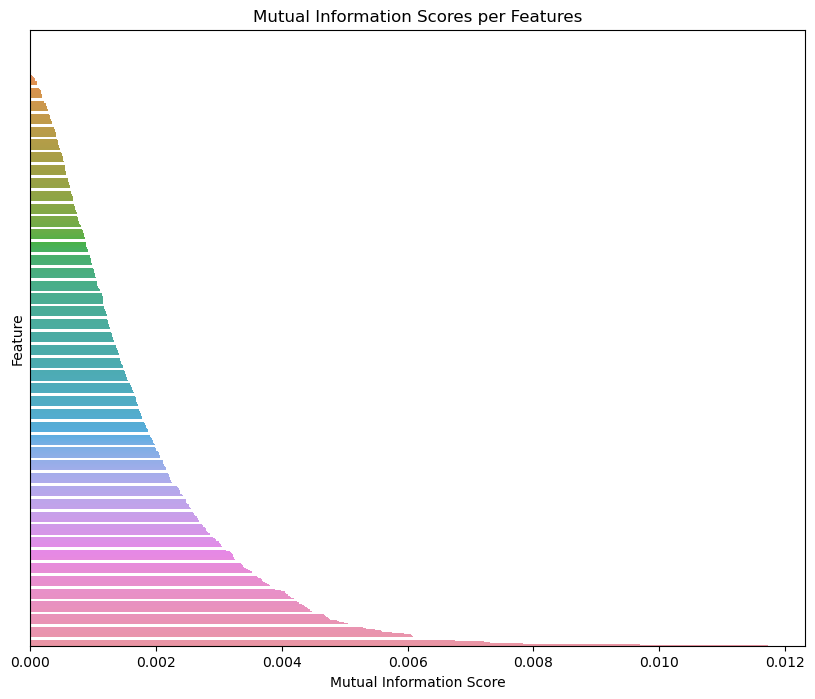

In [609]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=mi_frame, orient='h')
plt.xlabel('Mutual Information Score')
plt.yticks([])
plt.title('Mutual Information Scores per Features')
plt.show()

In [588]:
mi_frame

Feature     Score
395    feat_esm1b_396  0.000000
202    feat_esm1b_203  0.000000
850    feat_esm1b_851  0.000000
664    feat_esm1b_665  0.000000
657    feat_esm1b_658  0.000000
...               ...       ...
1118  feat_esm1b_1119  0.007829
1124  feat_esm1b_1125  0.007857
1133  feat_esm1b_1134  0.009698
788    feat_esm1b_789  0.010313
449    feat_esm1b_450  0.011726

[1280 rows x 2 columns]

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


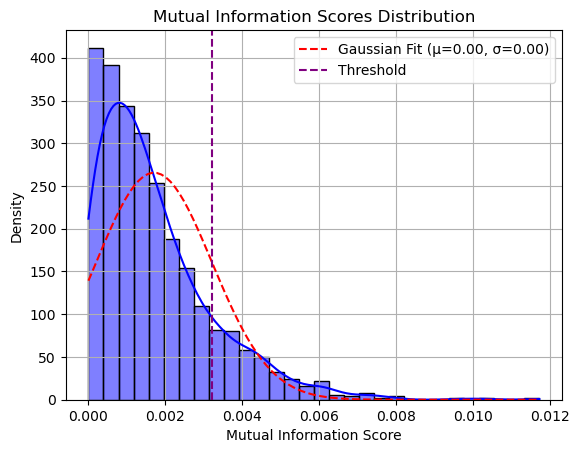

In [611]:
mu, std = norm.fit(mi)

threshold = mu + std

xmin, xmax = mi.min(), mi.max()
x_values = np.linspace(xmin, xmax, 100)
y_values = norm.pdf(x_values, mu, std)

sns.histplot(mi, kde=True, stat='density', color='blue', bins=30)

plt.plot(x_values, y_values, 'r--', label=f'Gaussian Fit (μ={mu:.2f}, σ={std:.2f})')

plt.axvline(x=threshold, color="purple", linestyle="--", label='Threshold')

plt.xlabel('Mutual Information Score')
plt.ylabel('Density')
plt.title('Mutual Information Scores Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [613]:
filtered_features = mi_frame[mi_frame['Score'] >= threshold]
filtered_features

Feature     Score
1216  feat_esm1b_1217  0.003217
1247  feat_esm1b_1248  0.003218
575    feat_esm1b_576  0.003220
549    feat_esm1b_550  0.003220
862    feat_esm1b_863  0.003222
...               ...       ...
1118  feat_esm1b_1119  0.007829
1124  feat_esm1b_1125  0.007857
1133  feat_esm1b_1134  0.009698
788    feat_esm1b_789  0.010313
449    feat_esm1b_450  0.011726

[192 rows x 2 columns]

In [627]:
remove_features = [col for col in list(df_train) if col not in list(filtered_features['Feature']) + ['Class']]
len(remove_features)
df_train_reduced = df_train.drop(columns=remove_features)

In [628]:
df_train_reduced

feat_esm1b_12  feat_esm1b_15  feat_esm1b_16  feat_esm1b_21  \
0           0.409822       0.491619       0.563423       0.503032   
1           0.377816       0.491619       0.638935       0.507170   
2           0.365051       0.498374       0.616989       0.442763   
3           0.316110       0.508333       0.675005       0.435785   
4           0.402217       0.581244       0.550501       0.352071   
...              ...            ...            ...            ...   
49601       0.301040       0.548292       0.397570       0.275874   
49602       0.387866       0.603855       0.457785       0.361059   
49603       0.448118       0.543224       0.500945       0.373588   
49604       0.362627       0.564082       0.434588       0.275874   
49605       0.410003       0.602171       0.495771       0.359702   

       feat_esm1b_22  feat_esm1b_28  feat_esm1b_38  feat_esm1b_40  \
0           0.592992       0.210511       0.476285       0.423247   
1           0.637016       0.210511       0.450374       0.423247   
2           0.636693       0.251152       0.438827       0.432741   
3           0.620507       0.210511       0.504201       0.423247   
4           0.688337       0.210511       0.582185       0.423247   
...              ...            ...            ...            ...   
49601       0.579344       0.515853       0.350138       0.445161   
49602       0.638450       0.291449       0.354803       0.448211   
49603       0.730335       0.211517       0.394328       0.627439   
49604       0.731428       0.297053       0.405717       0.572097   
49605       0.679025       0.223523       0.439339       0.423247   

       feat_esm1b_43  feat_esm1b_58  ...  feat_esm1b_1217  feat_esm1b_1219  \
0           0.390493       0.546948  ...         0.621619         0.368666   
1           0.407900       0.546948  ...         0.621619         0.383169   
2           0.475750       0.546948  ...         0.621619         0.304524   
3           0.493809       0.546948  ...         0.621619         0.293557   
4           0.456607       0.546948  ...         0.621619         0.401302   
...              ...            ...  ...              ...              ...   
49601       0.390493       0.323981  ...         0.621619         0.507545   
49602       0.552253       0.485760  ...         0.620232         0.314750   
49603       0.487035       0.339317  ...         0.427709         0.308165   
49604       0.526320       0.343519  ...         0.437449         0.437959   
49605       0.468576       0.539956  ...         0.543165         0.421226   

       feat_esm1b_1223  feat_esm1b_1231  feat_esm1b_1237  feat_esm1b_1240  \
0             0.558081         0.531658         0.432041         0.449176   
1             0.484514         0.531658         0.459926         0.481838   
2             0.478048         0.531658         0.367261         0.416065   
3             0.454833         0.529178         0.402657         0.406528   
4             0.492531         0.457281         0.403375         0.545800   
...                ...              ...              ...              ...   
49601         0.673171         0.531658         0.545624         0.411333   
49602         0.620470         0.355007         0.421576         0.436135   
49603         0.673171         0.417575         0.511500         0.546305   
49604         0.563661         0.438144         0.412204         0.514982   
49605         0.455932         0.249533         0.460980         0.565227   

       feat_esm1b_1248  feat_esm1b_1269  feat_esm1b_1276  Class  
0             0.445357         0.379713         0.584518      1  
1             0.476441         0.379713         0.577072      1  
2             0.625357         0.379713         0.576392      1  
3             0.568396         0.456691         0.451399      1  
4             0.559746         0.410300         0.521617      1  
...                ...              ...              ...    ...  
49601         0.511128   

### Data preprocessing log

#### Missing values addressed.

__'feat_esm1b_148'__ is removed from the dataset due to it being missing on almost all entries.

Entries with 1215 and 1216 missing values are also removed fron the dataset, due to their data being largely missing, it is reasonable to assume that they'd provide little to no useful information for the classification process.

After the __25:75__ train-test-split, training set has a class distribution of __1:60__, testing set has a class distribution of __1:62__.

#### Outliers addressed

After applying __'Isolation Forest'__, roughly __5%__ entries were identified as __outliers__. 

After applying quantile capping on the outliers, the overall data skewness improved by roughly __4%__.

#### Data scale addressed

Applied __'Min-Max Scaler'__ to __0-1__ range.

#### Feature selection

Applied __'Mutual information'__ on the features, results show a declining CDF normal distribution. 

Filtered features based on the distribution percentile, where features with MI scores greater than or equal to __mean+std__ are kept, leaving __15%__ features remaining. 

## Modelling

### Preliminary modelling

## Model Assessment